In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Bad key savefig.frameon in file c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log fi

In [2]:
scores = pd.read_csv("data/notes_pbf_T3_2021_DS_YOKO.csv")

In [3]:
scores.shape

(228, 283)

In [4]:
scores.head()

organisationunitid          organisationunitname organisationunitcode  \
0        MLOAJbNgr3a  CENTRE SANTE INTEGRE  de GAH              CSI GAH   
1        MLOAJbNgr3a  CENTRE SANTE INTEGRE  de GAH              CSI GAH   
2        MLOAJbNgr3a  CENTRE SANTE INTEGRE  de GAH              CSI GAH   
3        MLOAJbNgr3a  CENTRE SANTE INTEGRE  de GAH              CSI GAH   
4        MLOAJbNgr3a  CENTRE SANTE INTEGRE  de GAH              CSI GAH   

  organisationunitdescription periodid       periodname periodcode  \
0                         NaN   2021Q1  Jan to Mar 2021     2021Q1   
1                         NaN   2021Q2  Apr to Jun 2021     2021Q2   
2                         NaN   2021Q3  Jul to Sep 2021     2021Q3   
3                         NaN   2021Q4  Oct to Dec 2021     2021Q4   
4                         NaN   2020Q1  Jan to Mar 2020     2020Q1   

   perioddescription  \
0                NaN   
1                NaN   
2                NaN   
3                NaN   
4                NaN   

   QOC-PMA-1.1-Carte sanitaire de l’aire de santé disponible et affichée (format A3 au moins)  \
0                                                NaN                                            
1                                                NaN                                            
2                                                1.0                                            
3                                                NaN                                            
4                                                NaN                                            

   QOC-PMA-1.10-Disponibilité de radio ou téléphone portable  ...  \
0                                                NaN          ...   
1                                                NaN          ...   
2                                                1.0          ...   
3                                                NaN          ...   
4                                                NaN          ...   

   QoC-PMA-Points - Maternité  QoC-PMA-Points - Médicaments traceurs  \
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

   QoC-PMA-Points - Partie financière  QoC-PMA-Points - Petite chirurgie  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   QoC-PMA-Points - Plan d’action  QoC-PMA-Points - Plan d’action trimestriel  \
0                             NaN                                         NaN   
1                             NaN                                         NaN   
2                             NaN                                         NaN   
3                             NaN                                         NaN   
4                             NaN                                         NaN   

   QoC-PMA-Points - Planification Familiale  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   QoC-PMA-Points - Salle d’hospitalisation  QoC-PMA-Points - Tuberculose  \
0                                       NaN                           NaN   
1                                       NaN                           NaN   
2                                       NaN                           NaN   
3                  

In [5]:
from pbf_dict_columns import dict_cols

In [6]:
indicateurs = list(dict_cols.keys())

In [7]:
new_indicateurs = list(dict_cols.values())

In [8]:
def get_category(indicator):
    col = indicator.split('.')[0]
    if col == "QOC-PMA-1":
        return "Indicateurs généraux"
    elif col == "QOC-PMA-2":
        return "Business plan trimestriel"
    elif col == "QOC-PMA-3":
        return "Partie financière"
    elif col == "QOC-PMA-4":
        return "Hygiène et stérilisation"        
    elif col == "QOC-PMA-5":
        return "Consultation externe"
    elif col == "QOC-PMA-6":
        return "Planification familiale"  
    elif col == "QOC-PMA-7":
        return "Laboratoire"
    elif col == "QOC-PMA-8":
        return "Salle d'hospitalisation"
    elif col == "QOC-PMA-9":
        return "Gestion des médicaments"
    elif col == "QOC-PMA-10":
        return "Médicaments traceurs"
    elif col == "QOC-PMA-11":
        return "Maternité"
    elif col == "QOC-PMA-12":
        return "Petite chirurgie"
    elif col == "QOC-PMA-13":
        return "TB"
    elif col == "QOC-PMA-14":
        return "Vaccination"
    elif col == "QOC-PMA-15":
        return "CPN"
    elif col == "QOC-PMA-16":
        return "VIH"
    elif col == "QOC-PMA-17":
        return "PBF communautaire"
    elif col == "QOC-PMA-18":
        return "Malnutrition"
    elif col == "QOC-PMA-19":
        return "Etat civil"
    else:
        return "Infos_FOSA_periode"

In [9]:
dict_cat = {}
for c in indicateurs:
    if get_category(c):
        dict_cat[c] = get_category(c)

In [10]:
unique_categories = set(dict_cat.values())

In [11]:
unique_categories = list(unique_categories)

In [12]:
unique_categories

['Indicateurs généraux',
 'Laboratoire',
 'Business plan trimestriel',
 'Infos_FOSA_periode',
 'Planification familiale',
 'TB',
 "Salle d'hospitalisation",
 'Maternité',
 'Médicaments traceurs',
 'Vaccination',
 'Malnutrition',
 'Partie financière',
 'CPN',
 'Hygiène et stérilisation',
 'Petite chirurgie',
 'VIH',
 'Etat civil',
 'PBF communautaire',
 'Consultation externe',
 'Gestion des médicaments']

In [13]:
def get_category_indicator_list(cat):
    ind_cat_list = []
    for k, v in dict_cat.items():
        if v == cat:
            ind_cat_list.append(k)
    return ind_cat_list

In [14]:
indicateurs_cs_externe_list = get_category_indicator_list("Consultation externe")

In [15]:
indicateurs_pf_list = get_category_indicator_list('Planification familiale')

In [16]:
indicateurs_labo_list = get_category_indicator_list("Laboratoire")

In [17]:
indicateurs_hospi_list = get_category_indicator_list("Salle d'hospitalisation")

In [18]:
indicateurs_gest_med_list = get_category_indicator_list("Gestion des médicaments")

In [19]:
indicateurs_med_traceurs_list = get_category_indicator_list("Médicaments traceurs")

In [20]:
indicateurs_maternite_list = get_category_indicator_list("Maternité")

In [21]:
indicateurs_petite_chirurgie_list = get_category_indicator_list("Petite chirurgie")

In [22]:
indicateurs_TB_list = get_category_indicator_list("TB")

In [23]:
indicateurs_vaccinations_list = get_category_indicator_list("Vaccination")

In [24]:
indicateurs_cpn_list = get_category_indicator_list("CPN")

In [25]:
indicateurs_vih_list = get_category_indicator_list("VIH")

In [26]:
indicateurs_pbf_communautaire_list = get_category_indicator_list("PBF communautaire")

In [27]:
indicateurs_malnutrition_list = get_category_indicator_list("Malnutrition")

In [28]:
indicateurs_etat_civil_list = get_category_indicator_list("Etat civil")

In [29]:
indicateurs_generaux_list = get_category_indicator_list("Indicateurs généraux")

In [30]:
indicateurs_FOSA_periode_list = get_category_indicator_list("Infos_FOSA_periode")

In [31]:
indicateurs_business_plan_trimestriel_list = get_category_indicator_list("Business plan trimestriel")

In [32]:
indicateurs_partie_financière_list = get_category_indicator_list("Partie financière")

In [33]:
indicateurs_hygiene_sterilisation_list = get_category_indicator_list("Hygiène et stérilisation")

In [34]:
indicateurs_all_cat_list = indicateurs_business_plan_trimestriel_list + indicateurs_cpn_list + indicateurs_cs_externe_list + indicateurs_etat_civil_list + indicateurs_generaux_list + indicateurs_gest_med_list + indicateurs_hospi_list + indicateurs_hygiene_sterilisation_list + indicateurs_labo_list + indicateurs_malnutrition_list + indicateurs_maternite_list + indicateurs_med_traceurs_list + indicateurs_partie_financière_list + indicateurs_pbf_communautaire_list + indicateurs_petite_chirurgie_list + indicateurs_pf_list + indicateurs_vaccinations_list + indicateurs_vih_list

In [35]:
indicateurs_all_cat_list

['QOC-PMA-2.1-Business plan trimestriel de la FS disponible et accessible',
 'QOC-PMA-2.2-Plan d’action élaboré avec les acteurs clés',
 'QOC-PMA-2.3-Rapports mensuels d’analyse de réalisations du business plan',
 'QOC-PMA-2.4-Les cinq problèmes clés du Business Plan du trimestre dernier ont été réalisés à au moins 80%',
 'QOC-PMA-15.1-Plan de préparation à l’accouchement disponible et suivis',
 'QOC-PMA-15.2-Pèse personne bien réglé à zéro (pèse personne propre pour la CPN)',
 'QOC-PMA-15.3-Ruban PB disponible et en bon état (bonne lisibilité)',
 "QOC-PMA-15.4-Détermination de l'état nutritionnel de toute femme en CPN",
 'QOC-PMA-15.5-Fiche CPN (pour la FS) disponible et bien remplie',
 'QOC-PMA-15.6-Fiche et Registre CPN (pour la FS) montre l’administration de Fer Folate), TPI et VAT',
 'QOC-PMA-15.7-Carnet de la CPN (pour la maman) disponible',
 'QOC-PMA-15.8-Registre de la CPN disponible et bien rempli',
 'QOC-PMA-5.1-Bonnes conditions d’attente pour la Consultation Externe',
 'QOC

In [36]:
list_facilities = scores['organisationunitname'].unique()

In [37]:
list_facilities

array(['CENTRE SANTE INTEGRE  de GAH', 'CMA Ngambe Tikar',
       'CSI BENG-BENG', 'CSI Doume', 'CSI Kong', 'CSI Linte',
       'CSI Mangaï', 'CSI Mankim', 'CSI Minfoumbe', 'CSI Nditam',
       'CMA NDJOLE', 'Cabinet de soins Denise Ngambe Tikar',
       'Centre Santé les Premices', 'Centre de santé la Grâce de OUE',
       "Centre de santé privé  de l'eglise Lutherienne de Ngambe Tikar",
       'Centre de santé privé EEC Ngambe Tikar',
       'Centre de santé privé protestant Yoko', 'Family Health Care',
       'Infirmerie de la Prison Yoko'], dtype=object)

In [38]:
scores.drop(scores[scores['organisationunitname'] == "Centre de santé la Grâce de OUE"].index, inplace=True)
scores.drop(scores[scores['organisationunitname'] == "CMA NDJOLE"].index, inplace=True)

In [39]:
def get_dataframe(df, list_cat_ind, indicateurs_FOSA_periode_list):
    # Slicing dataframe with the desired column
    df_new = df[list_cat_ind + indicateurs_FOSA_periode_list]
    # Create 2 new columns from 1 other column by slicing the value differently 
    df_new['Trim'] = df_new['periodcode'].str[-1]
    df_new['Year'] = df_new['periodcode'].str[:4]
    # Change the column name and return a new dataframe
    df_new = df_new.rename(columns=dict_cols)
    return df_new

In [40]:
def get_dataframe_to_plot(dataframe):
    # drop 2 columns and set index with 3 columns
    score_df = dataframe.drop(['période', 'Trimestre'], axis=1).set_index(['FOSA', 'Trim', 'Year'])
    # get a series by summing each row of all columns
    score_series = score_df.sum(axis=1)
    # name this series as score
    score_series.name = "score"
    # transform series to dataframe
    score_df = score_series.to_frame()
    # reset index
    score_df = score_df.reset_index()
    # return dataframe
    return score_df

In [41]:
def add_max_score(score_max=None, **kws):
    if not score_max:
        return
    m = score_max
    ax = plt.gca()
    ax.axhline(m, color='green', ls='--')

In [42]:
scores_labo = get_dataframe(scores, indicateurs_labo_list, indicateurs_FOSA_periode_list)

In [43]:
scores_labo.head()

ATMS disponible  tests de grossesse labo  labo 7 sur 7  \
0              NaN                      NaN           NaN   
1              NaN                      NaN           NaN   
2              0.0                      1.0           0.0   
3              NaN                      NaN           NaN   
4              NaN                      NaN           NaN   

   registre labo bien rempli  liste examens affichés  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        1.0                     0.5   
3                        NaN                     NaN   
4                        NaN                     NaN   

   demonstrations des parasites disponibles  microscope fonctionnel  \
0                                       NaN                     NaN   
1                                       NaN                     NaN   
2                                       0.5                     2.0   
3                                       NaN                     NaN   
4                                       NaN                     NaN   

   centrifugeuse fonctionnelle  labo propre  \
0                          NaN          NaN   
1                          NaN          NaN   
2                          1.0          1.0   
3                          NaN          NaN   
4                          NaN          NaN   

   protocole de décontamination affiché                          FOSA  \
0                                   NaN  CENTRE SANTE INTEGRE  de GAH   
1                                   NaN  CENTRE SANTE INTEGRE  de GAH   
2                                   0.0  CENTRE SANTE INTEGRE  de GAH   
3                                   NaN  CENTRE SANTE INTEGRE  de GAH   
4                                   NaN  CENTRE SANTE INTEGRE  de GAH   

           période Trimestre Trim  Year  
0  Jan to Mar 2021    2021Q1    1  2021  
1  Apr to Jun 2021    2021Q2    2  2021  
2  Jul to Sep 2021    2021Q3    3  2021  
3  Oct to Dec 2021    2021Q4    4  2021  
4  Jan to Mar 2020    2020Q1    1  2020

In [44]:
scores_labo_to_print = get_dataframe_to_plot(scores_labo)

In [45]:
scores_labo_to_print

FOSA Trim  Year  score
0    CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1    CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2    CENTRE SANTE INTEGRE  de GAH    3  2021    7.0
3    CENTRE SANTE INTEGRE  de GAH    4  2021    0.0
4    CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                            ...  ...   ...    ...
199  Infirmerie de la Prison Yoko    4  2020    5.0
200  Infirmerie de la Prison Yoko    1  2019   10.0
201  Infirmerie de la Prison Yoko    2  2019    5.0
202  Infirmerie de la Prison Yoko    3  2019    4.0
203  Infirmerie de la Prison Yoko    4  2019    6.0

[204 rows x 4 columns]

In [46]:
def get_df_with_trim_and_year(df):
    df_new = df.copy()
    b1 = (df["Trim"] == "1") | (df["Trim"] == "2") | (df["Trim"] == "3")
    b2 = df["Year"] == "2021"
    return  df_new[b1 & b2]

In [47]:
scores_labo_to_print = get_df_with_trim_and_year(scores_labo_to_print)

In [48]:
scores_labo_to_print

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    7.0
12                                    CMA Ngambe Tikar    1  2021    9.0
13                                    CMA Ngambe Tikar    2  2021   10.0
14                                    CMA Ngambe Tikar    3  2021    9.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    4.0
36                                           CSI Doume    1  2021    1.0
37                                           CSI Doume    2  2021    5.0
38                                           CSI Doume    3  2021    3.0
48                                            CSI Kong    1  2021    3.5
49                                            CSI Kong    2  2021    7.0
50                                            CSI Kong    3  2021    9.5
60                                           CSI Linte    1  2021    6.0
61                                           CSI Linte    2  2021    4.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    3.5
73                                          CSI Mangaï    2  2021    7.0
74                                          CSI Mangaï    3  2021    3.0
84                                          CSI Mankim    1  2021    8.5
85                                          CSI Mankim    2  2021    5.0
86                                          CSI Mankim    3  2021    9.5
96                                       CSI Minfoumbe    1  2021    4.5
97                                       CSI Minfoumbe    2  2021    4.5
98                                       CSI Minfoumbe    3  2021    4.0
108                                         CSI Nditam    1  2021    5.0
109                                         CSI Nditam    2  2021    3.0
110                                         CSI Nditam    3  2021    3.5
120               Cabinet de soins Denise Ngambe Tikar    1  2021    8.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    6.5
122               Cabinet de soins Denise Ngambe Tikar    3  2021    3.0
132                          Centre Santé les Premices    1  2021    1.5
133                          Centre Santé les Premices    2  2021    2.0
134                          Centre Santé les Premices    3  2021    3.5
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   10.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   10.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021    9.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   10.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   10.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   10.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    9.0
170              Centre de santé privé protestant Yoko    3  2021    9.0
180                                 Family Health Care    1  2021   10.0
181                                 Family Health Care    2  2021    9.0
182                                 Family Health Care    3  2021    8.0
192                       Infirmerie de la Prison Yoko    1  2021    8.0
193                       Infirmerie de la Prison Yoko    2  2021    5.0
194                       Infirmerie de la Prison Yoko    3  2021    7.0

In [49]:
len(scores_labo_to_print)

51

In [50]:
scores_labo_to_print_2 = scores_labo_to_print.pivot(index="FOSA", columns="Trim", values="score")

In [51]:
scores_labo_to_print_2 = scores_labo_to_print_2.reset_index()

In [52]:
scores_labo_to_print_2

Trim                                               FOSA     1     2     3
0                          CENTRE SANTE INTEGRE  de GAH   0.0   0.0   7.0
1                                      CMA Ngambe Tikar   9.0  10.0   9.0
2                                         CSI BENG-BENG   0.0   0.0   4.0
3                                             CSI Doume   1.0   5.0   3.0
4                                              CSI Kong   3.5   7.0   9.5
5                                             CSI Linte   6.0   4.0   0.0
6                                            CSI Mangaï   3.5   7.0   3.0
7                                            CSI Mankim   8.5   5.0   9.5
8                                         CSI Minfoumbe   4.5   4.5   4.0
9                                            CSI Nditam   5.0   3.0   3.5
10                 Cabinet de soins Denise Ngambe Tikar   8.0   6.5   3.0
11                            Centre Santé les Premices   1.5   2.0   3.5
12    Centre de santé privé  de l'eglise Lutherienne...  10.0  10.0   9.0
13               Centre de santé privé EEC Ngambe Tikar  10.0  10.0  10.0
14                Centre de santé privé protestant Yoko   0.0   9.0   9.0
15                                   Family Health Care  10.0   9.0   8.0
16                         Infirmerie de la Prison Yoko   8.0   5.0   7.0

In [53]:
scores_labo_to_print_2.columns.name = None

In [54]:
scores_labo_to_print_2

FOSA     1     2     3
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0   7.0
1                                    CMA Ngambe Tikar   9.0  10.0   9.0
2                                       CSI BENG-BENG   0.0   0.0   4.0
3                                           CSI Doume   1.0   5.0   3.0
4                                            CSI Kong   3.5   7.0   9.5
5                                           CSI Linte   6.0   4.0   0.0
6                                          CSI Mangaï   3.5   7.0   3.0
7                                          CSI Mankim   8.5   5.0   9.5
8                                       CSI Minfoumbe   4.5   4.5   4.0
9                                          CSI Nditam   5.0   3.0   3.5
10               Cabinet de soins Denise Ngambe Tikar   8.0   6.5   3.0
11                          Centre Santé les Premices   1.5   2.0   3.5
12  Centre de santé privé  de l'eglise Lutherienne...  10.0  10.0   9.0
13             Centre de santé privé EEC Ngambe Tikar  10.0  10.0  10.0
14              Centre de santé privé protestant Yoko   0.0   9.0   9.0
15                                 Family Health Care  10.0   9.0   8.0
16                       Infirmerie de la Prison Yoko   8.0   5.0   7.0

In [55]:
scores_labo_to_print_2['moyenne'] = round((scores_labo_to_print_2['1'] + scores_labo_to_print_2['2'] + scores_labo_to_print_2['3'])/3, 2)

In [56]:
scores_labo_to_print_2['evolution_2_to_3'] = scores_labo_to_print_2['3'] - scores_labo_to_print_2['2']

In [57]:
scores_labo_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0   7.0   
1                                    CMA Ngambe Tikar   9.0  10.0   9.0   
2                                       CSI BENG-BENG   0.0   0.0   4.0   
3                                           CSI Doume   1.0   5.0   3.0   
4                                            CSI Kong   3.5   7.0   9.5   
5                                           CSI Linte   6.0   4.0   0.0   
6                                          CSI Mangaï   3.5   7.0   3.0   
7                                          CSI Mankim   8.5   5.0   9.5   
8                                       CSI Minfoumbe   4.5   4.5   4.0   
9                                          CSI Nditam   5.0   3.0   3.5   
10               Cabinet de soins Denise Ngambe Tikar   8.0   6.5   3.0   
11                          Centre Santé les Premices   1.5   2.0   3.5   
12  Centre de santé privé  de l'eglise Lutherienne...  10.0  10.0   9.0   
13             Centre de santé privé EEC Ngambe Tikar  10.0  10.0  10.0   
14              Centre de santé privé protestant Yoko   0.0   9.0   9.0   
15                                 Family Health Care  10.0   9.0   8.0   
16                       Infirmerie de la Prison Yoko   8.0   5.0   7.0   

    moyenne  evolution_2_to_3  
0      2.33               7.0  
1      9.33              -1.0  
2      1.33               4.0  
3      3.00              -2.0  
4      6.67               2.5  
5      3.33              -4.0  
6      4.50              -4.0  
7      7.67               4.5  
8      4.33              -0.5  
9      3.83               0.5  
10     5.83              -3.5  
11     2.33               1.5  
12     9.67              -1.0  
13    10.00               0.0  
14     6.00               0.0  
15     9.00              -1.0  
16     6.67               2.0

In [58]:
scores_labo_to_print_2 = scores_labo_to_print_2.set_index('FOSA')

In [59]:
scores_labo_to_print_2

1     2     3  moyenne  \
FOSA                                                                            
CENTRE SANTE INTEGRE  de GAH                         0.0   0.0   7.0     2.33   
CMA Ngambe Tikar                                     9.0  10.0   9.0     9.33   
CSI BENG-BENG                                        0.0   0.0   4.0     1.33   
CSI Doume                                            1.0   5.0   3.0     3.00   
CSI Kong                                             3.5   7.0   9.5     6.67   
CSI Linte                                            6.0   4.0   0.0     3.33   
CSI Mangaï                                           3.5   7.0   3.0     4.50   
CSI Mankim                                           8.5   5.0   9.5     7.67   
CSI Minfoumbe                                        4.5   4.5   4.0     4.33   
CSI Nditam                                           5.0   3.0   3.5     3.83   
Cabinet de soins Denise Ngambe Tikar                 8.0   6.5   3.0     5.83   
Centre Santé les Premices                            1.5   2.0   3.5     2.33   
Centre de santé privé  de l'eglise Lutherienne ...  10.0  10.0   9.0     9.67   
Centre de santé privé EEC Ngambe Tikar              10.0  10.0  10.0    10.00   
Centre de santé privé protestant Yoko                0.0   9.0   9.0     6.00   
Family Health Care                                  10.0   9.0   8.0     9.00   
Infirmerie de la Prison Yoko                         8.0   5.0   7.0     6.67   

                                                    evolution_2_to_3  
FOSA                                                                  
CENTRE SANTE INTEGRE  de GAH                                     7.0  
CMA Ngambe Tikar                                                -1.0  
CSI BENG-BENG                                                    4.0  
CSI Doume                                                       -2.0  
CSI Kong                                                         2.5  
CSI Linte                                                       -4.0  
CSI Mangaï                                                      -4.0  
CSI Mankim                                                       4.5  
CSI Minfoumbe                                                   -0.5  
CSI Nditam                                                       0.5  
Cabinet de soins Denise Ngambe Tikar                            -3.5  
Centre Santé les Premices                                        1.5  
Centre de santé privé  de l'eglise Lutherienne ...              -1.0  
Centre de santé privé EEC Ngambe Tikar                           0.0  
Centre de santé privé protestant Yoko                            0.0  
Family Health Care                                              -1.0  
Infirmerie de la Prison Yoko                                     2.0

In [60]:
scores_labo_to_print_2.sort_values(by="evolution_2_to_3", ascending=False)

1     2     3  moyenne  \
FOSA                                                                            
CENTRE SANTE INTEGRE  de GAH                         0.0   0.0   7.0     2.33   
CSI Mankim                                           8.5   5.0   9.5     7.67   
CSI BENG-BENG                                        0.0   0.0   4.0     1.33   
CSI Kong                                             3.5   7.0   9.5     6.67   
Infirmerie de la Prison Yoko                         8.0   5.0   7.0     6.67   
Centre Santé les Premices                            1.5   2.0   3.5     2.33   
CSI Nditam                                           5.0   3.0   3.5     3.83   
Centre de santé privé EEC Ngambe Tikar              10.0  10.0  10.0    10.00   
Centre de santé privé protestant Yoko                0.0   9.0   9.0     6.00   
CSI Minfoumbe                                        4.5   4.5   4.0     4.33   
CMA Ngambe Tikar                                     9.0  10.0   9.0     9.33   
Centre de santé privé  de l'eglise Lutherienne ...  10.0  10.0   9.0     9.67   
Family Health Care                                  10.0   9.0   8.0     9.00   
CSI Doume                                            1.0   5.0   3.0     3.00   
Cabinet de soins Denise Ngambe Tikar                 8.0   6.5   3.0     5.83   
CSI Linte                                            6.0   4.0   0.0     3.33   
CSI Mangaï                                           3.5   7.0   3.0     4.50   

                                                    evolution_2_to_3  
FOSA                                                                  
CENTRE SANTE INTEGRE  de GAH                                     7.0  
CSI Mankim                                                       4.5  
CSI BENG-BENG                                                    4.0  
CSI Kong                                                         2.5  
Infirmerie de la Prison Yoko                                     2.0  
Centre Santé les Premices                                        1.5  
CSI Nditam                                                       0.5  
Centre de santé privé EEC Ngambe Tikar                           0.0  
Centre de santé privé protestant Yoko                            0.0  
CSI Minfoumbe                                                   -0.5  
CMA Ngambe Tikar                                                -1.0  
Centre de santé privé  de l'eglise Lutherienne ...              -1.0  
Family Health Care                                              -1.0  
CSI Doume                                                       -2.0  
Cabinet de soins Denise Ngambe Tikar                            -3.5  
CSI Linte                                                       -4.0  
CSI Mangaï                                                      -4.0

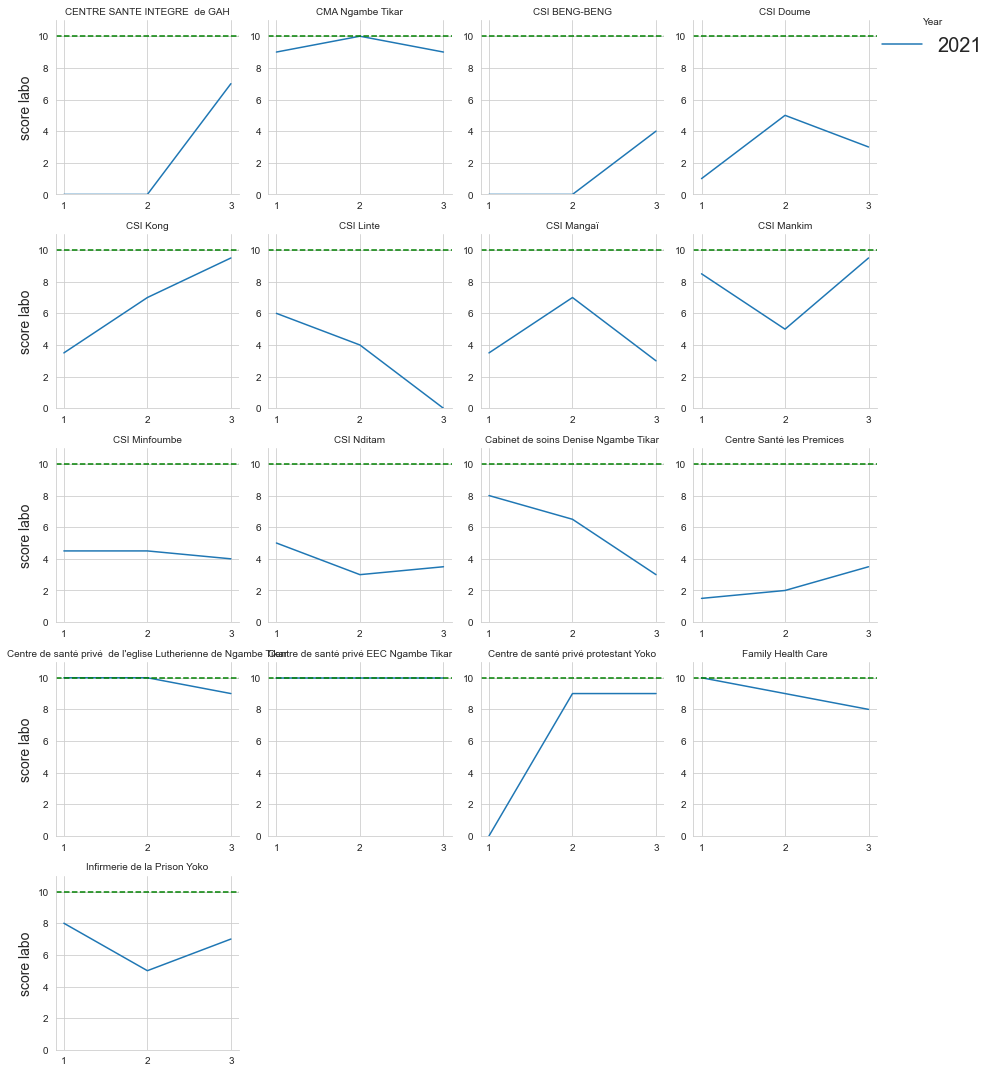

In [61]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_labo_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,11], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=10)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score labo', fontsize=14);
g.savefig("images/Performance_evolution/labo")

In [62]:
scores_vaccination = get_dataframe(scores, indicateurs_vaccinations_list, indicateurs_FOSA_periode_list)
scores_vaccination_to_print  = get_dataframe_to_plot(scores_vaccination)
scores_vaccination_to_print  = get_df_with_trim_and_year(scores_vaccination_to_print )
scores_vaccination_to_print 

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   15.0
12                                    CMA Ngambe Tikar    1  2021   15.0
13                                    CMA Ngambe Tikar    2  2021   15.0
14                                    CMA Ngambe Tikar    3  2021   17.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   13.0
36                                           CSI Doume    1  2021   17.0
37                                           CSI Doume    2  2021   17.0
38                                           CSI Doume    3  2021   21.0
48                                            CSI Kong    1  2021    8.0
49                                            CSI Kong    2  2021   13.0
50                                            CSI Kong    3  2021   20.0
60                                           CSI Linte    1  2021   24.0
61                                           CSI Linte    2  2021   12.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   20.0
73                                          CSI Mangaï    2  2021   24.0
74                                          CSI Mangaï    3  2021   20.0
84                                          CSI Mankim    1  2021   11.0
85                                          CSI Mankim    2  2021    8.0
86                                          CSI Mankim    3  2021   18.0
96                                       CSI Minfoumbe    1  2021   15.0
97                                       CSI Minfoumbe    2  2021   15.0
98                                       CSI Minfoumbe    3  2021   12.0
108                                         CSI Nditam    1  2021   19.0
109                                         CSI Nditam    2  2021   16.0
110                                         CSI Nditam    3  2021   21.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    6.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   16.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    9.0
132                          Centre Santé les Premices    1  2021   15.0
133                          Centre Santé les Premices    2  2021   22.0
134                          Centre Santé les Premices    3  2021   24.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021    8.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021    9.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021    9.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021    7.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   10.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   10.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   10.0
170              Centre de santé privé protestant Yoko    3  2021   10.0
180                                 Family Health Care    1  2021   17.0
181                                 Family Health Care    2  2021   15.0
182                                 Family Health Care    3  2021   10.0
192                       Infirmerie de la Prison Yoko    1  2021    9.0
193                       Infirmerie de la Prison Yoko    2  2021    5.0
194                       Infirmerie de la Prison Yoko    3  2021    0.0

In [63]:
scores_vaccination_to_print_2 = scores_vaccination_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_vaccination_to_print_2 = scores_vaccination_to_print_2.reset_index()
scores_vaccination_to_print_2.columns.name = None
scores_vaccination_to_print_2['moyenne'] = round((scores_vaccination_to_print_2['1'] + scores_vaccination_to_print_2['2'] + scores_vaccination_to_print_2['3'])/3, 2)
scores_vaccination_to_print_2['evolution_2_to_3'] = scores_vaccination_to_print_2['3'] - scores_vaccination_to_print_2['2']
scores_vaccination_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  15.0   
1                                    CMA Ngambe Tikar  15.0  15.0  17.0   
2                                       CSI BENG-BENG   0.0   0.0  13.0   
3                                           CSI Doume  17.0  17.0  21.0   
4                                            CSI Kong   8.0  13.0  20.0   
5                                           CSI Linte  24.0  12.0   0.0   
6                                          CSI Mangaï  20.0  24.0  20.0   
7                                          CSI Mankim  11.0   8.0  18.0   
8                                       CSI Minfoumbe  15.0  15.0  12.0   
9                                          CSI Nditam  19.0  16.0  21.0   
10               Cabinet de soins Denise Ngambe Tikar   6.0  16.0   9.0   
11                          Centre Santé les Premices  15.0  22.0  24.0   
12  Centre de santé privé  de l'eglise Lutherienne...   8.0   9.0   9.0   
13             Centre de santé privé EEC Ngambe Tikar   7.0  10.0  10.0   
14              Centre de santé privé protestant Yoko   0.0  10.0  10.0   
15                                 Family Health Care  17.0  15.0  10.0   
16                       Infirmerie de la Prison Yoko   9.0   5.0   0.0   

    moyenne  evolution_2_to_3  
0      5.00              15.0  
1     15.67               2.0  
2      4.33              13.0  
3     18.33               4.0  
4     13.67               7.0  
5     12.00             -12.0  
6     21.33              -4.0  
7     12.33              10.0  
8     14.00              -3.0  
9     18.67               5.0  
10    10.33              -7.0  
11    20.33               2.0  
12     8.67               0.0  
13     9.00               0.0  
14     6.67               0.0  
15    14.00              -5.0  
16     4.67              -5.0

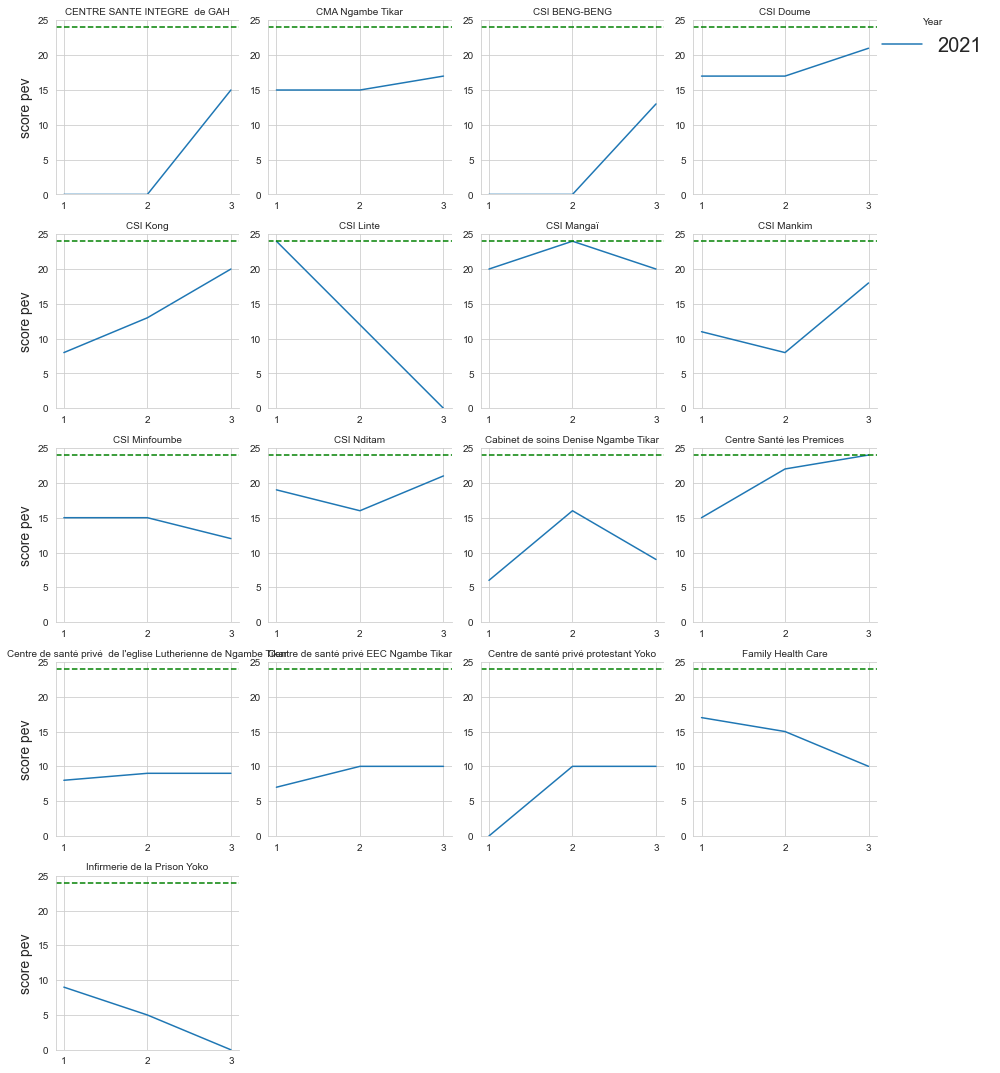

In [64]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_vaccination_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,25], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=24)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score pev', fontsize=14);
g.savefig("images/Performance_evolution/vaccination")

In [65]:
scores_indicateurs_generaux  = get_dataframe(scores, indicateurs_generaux_list, indicateurs_FOSA_periode_list)
scores_indicateurs_generaux_to_print   = get_dataframe_to_plot(scores_indicateurs_generaux)
scores_indicateurs_generaux_to_print   = get_df_with_trim_and_year(scores_indicateurs_generaux_to_print )
scores_indicateurs_generaux_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   10.0
12                                    CMA Ngambe Tikar    1  2021   10.0
13                                    CMA Ngambe Tikar    2  2021   14.0
14                                    CMA Ngambe Tikar    3  2021   14.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    5.0
36                                           CSI Doume    1  2021   11.0
37                                           CSI Doume    2  2021   11.0
38                                           CSI Doume    3  2021   18.0
48                                            CSI Kong    1  2021    5.0
49                                            CSI Kong    2  2021   14.0
50                                            CSI Kong    3  2021   14.0
60                                           CSI Linte    1  2021   11.0
61                                           CSI Linte    2  2021    5.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   12.0
73                                          CSI Mangaï    2  2021   11.0
74                                          CSI Mangaï    3  2021   18.0
84                                          CSI Mankim    1  2021    9.0
85                                          CSI Mankim    2  2021   15.0
86                                          CSI Mankim    3  2021   16.0
96                                       CSI Minfoumbe    1  2021   13.0
97                                       CSI Minfoumbe    2  2021   13.0
98                                       CSI Minfoumbe    3  2021   16.0
108                                         CSI Nditam    1  2021   14.0
109                                         CSI Nditam    2  2021   14.0
110                                         CSI Nditam    3  2021   17.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   13.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   11.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021   13.0
132                          Centre Santé les Premices    1  2021   16.0
133                          Centre Santé les Premices    2  2021   15.0
134                          Centre Santé les Premices    3  2021   18.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   15.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   15.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   11.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   14.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   13.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   13.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   13.0
170              Centre de santé privé protestant Yoko    3  2021   13.0
180                                 Family Health Care    1  2021    7.0
181                                 Family Health Care    2  2021   10.0
182                                 Family Health Care    3  2021   11.0
192                       Infirmerie de la Prison Yoko    1  2021   11.0
193                       Infirmerie de la Prison Yoko    2  2021   11.0
194                       Infirmerie de la Prison Yoko    3  2021   16.0

In [66]:
scores_indicateurs_generaux_to_print_2 = scores_indicateurs_generaux_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_indicateurs_generaux_to_print_2 = scores_indicateurs_generaux_to_print_2.reset_index()
scores_indicateurs_generaux_to_print_2.columns.name = None
scores_indicateurs_generaux_to_print_2['moyenne'] = round((scores_indicateurs_generaux_to_print_2['1'] + scores_indicateurs_generaux_to_print_2['2'] + scores_indicateurs_generaux_to_print_2['3'])/3, 2)
scores_indicateurs_generaux_to_print_2['evolution_2_to_3'] = scores_indicateurs_generaux_to_print_2['3'] - scores_indicateurs_generaux_to_print_2['2']
scores_indicateurs_generaux_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  10.0   
1                                    CMA Ngambe Tikar  10.0  14.0  14.0   
2                                       CSI BENG-BENG   0.0   0.0   5.0   
3                                           CSI Doume  11.0  11.0  18.0   
4                                            CSI Kong   5.0  14.0  14.0   
5                                           CSI Linte  11.0   5.0   0.0   
6                                          CSI Mangaï  12.0  11.0  18.0   
7                                          CSI Mankim   9.0  15.0  16.0   
8                                       CSI Minfoumbe  13.0  13.0  16.0   
9                                          CSI Nditam  14.0  14.0  17.0   
10               Cabinet de soins Denise Ngambe Tikar  13.0  11.0  13.0   
11                          Centre Santé les Premices  16.0  15.0  18.0   
12  Centre de santé privé  de l'eglise Lutherienne...  15.0  15.0  11.0   
13             Centre de santé privé EEC Ngambe Tikar  14.0  13.0  13.0   
14              Centre de santé privé protestant Yoko   0.0  13.0  13.0   
15                                 Family Health Care   7.0  10.0  11.0   
16                       Infirmerie de la Prison Yoko  11.0  11.0  16.0   

    moyenne  evolution_2_to_3  
0      3.33              10.0  
1     12.67               0.0  
2      1.67               5.0  
3     13.33               7.0  
4     11.00               0.0  
5      5.33              -5.0  
6     13.67               7.0  
7     13.33               1.0  
8     14.00               3.0  
9     15.00               3.0  
10    12.33               2.0  
11    16.33               3.0  
12    13.67              -4.0  
13    13.33               0.0  
14     8.67               0.0  
15     9.33               1.0  
16    12.67               5.0

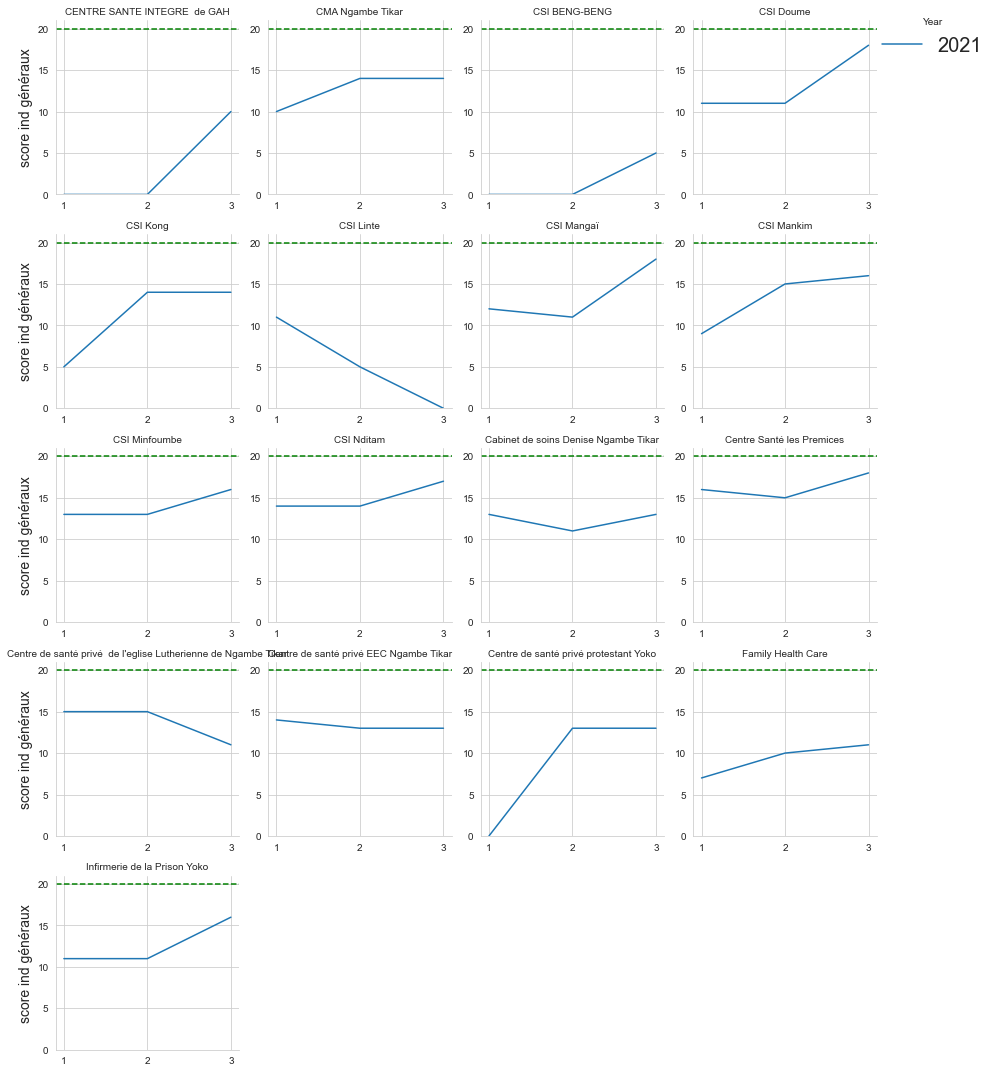

In [67]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_indicateurs_generaux_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,21], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=20)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score ind généraux', fontsize=14);
g.savefig("images/Performance_evolution/ind_generaux")

In [68]:
scores_petite_chirurgie  = get_dataframe(scores, indicateurs_petite_chirurgie_list, indicateurs_FOSA_periode_list)
scores_petite_chirurgie_to_print = get_dataframe_to_plot(scores_petite_chirurgie)
scores_petite_chirurgie_to_print = get_df_with_trim_and_year(scores_petite_chirurgie_to_print )
scores_petite_chirurgie_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    5.0
12                                    CMA Ngambe Tikar    1  2021    5.0
13                                    CMA Ngambe Tikar    2  2021    5.0
14                                    CMA Ngambe Tikar    3  2021    5.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    3.0
36                                           CSI Doume    1  2021    5.0
37                                           CSI Doume    2  2021    5.0
38                                           CSI Doume    3  2021    2.5
48                                            CSI Kong    1  2021    5.0
49                                            CSI Kong    2  2021    4.5
50                                            CSI Kong    3  2021    5.0
60                                           CSI Linte    1  2021    5.0
61                                           CSI Linte    2  2021    3.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    5.0
73                                          CSI Mangaï    2  2021    5.0
74                                          CSI Mangaï    3  2021    5.0
84                                          CSI Mankim    1  2021    5.0
85                                          CSI Mankim    2  2021    5.0
86                                          CSI Mankim    3  2021    5.0
96                                       CSI Minfoumbe    1  2021    5.0
97                                       CSI Minfoumbe    2  2021    5.0
98                                       CSI Minfoumbe    3  2021    5.0
108                                         CSI Nditam    1  2021    2.5
109                                         CSI Nditam    2  2021    5.0
110                                         CSI Nditam    3  2021    5.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    4.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    4.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    2.5
132                          Centre Santé les Premices    1  2021    5.0
133                          Centre Santé les Premices    2  2021    3.0
134                          Centre Santé les Premices    3  2021    2.5
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021    5.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021    5.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021    5.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021    5.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021    5.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021    5.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    3.0
170              Centre de santé privé protestant Yoko    3  2021    3.0
180                                 Family Health Care    1  2021    5.0
181                                 Family Health Care    2  2021    5.0
182                                 Family Health Care    3  2021    5.0
192                       Infirmerie de la Prison Yoko    1  2021    5.0
193                       Infirmerie de la Prison Yoko    2  2021    4.0
194                       Infirmerie de la Prison Yoko    3  2021    5.0

In [69]:
scores_petite_chirurgie_to_print_2 = scores_petite_chirurgie_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_petite_chirurgie_to_print_2 = scores_petite_chirurgie_to_print_2.reset_index()
scores_petite_chirurgie_to_print_2.columns.name = None
scores_petite_chirurgie_to_print_2['moyenne'] = round((scores_petite_chirurgie_to_print_2['1'] + scores_petite_chirurgie_to_print_2['2'] + scores_petite_chirurgie_to_print_2['3'])/3, 2)
scores_petite_chirurgie_to_print_2['evolution_2_to_3'] = scores_petite_chirurgie_to_print_2['3'] - scores_petite_chirurgie_to_print_2['2']
scores_petite_chirurgie_to_print_2

FOSA    1    2    3  moyenne  \
0                        CENTRE SANTE INTEGRE  de GAH  0.0  0.0  5.0     1.67   
1                                    CMA Ngambe Tikar  5.0  5.0  5.0     5.00   
2                                       CSI BENG-BENG  0.0  0.0  3.0     1.00   
3                                           CSI Doume  5.0  5.0  2.5     4.17   
4                                            CSI Kong  5.0  4.5  5.0     4.83   
5                                           CSI Linte  5.0  3.0  0.0     2.67   
6                                          CSI Mangaï  5.0  5.0  5.0     5.00   
7                                          CSI Mankim  5.0  5.0  5.0     5.00   
8                                       CSI Minfoumbe  5.0  5.0  5.0     5.00   
9                                          CSI Nditam  2.5  5.0  5.0     4.17   
10               Cabinet de soins Denise Ngambe Tikar  4.0  4.0  2.5     3.50   
11                          Centre Santé les Premices  5.0  3.0  2.5     3.50   
12  Centre de santé privé  de l'eglise Lutherienne...  5.0  5.0  5.0     5.00   
13             Centre de santé privé EEC Ngambe Tikar  5.0  5.0  5.0     5.00   
14              Centre de santé privé protestant Yoko  0.0  3.0  3.0     2.00   
15                                 Family Health Care  5.0  5.0  5.0     5.00   
16                       Infirmerie de la Prison Yoko  5.0  4.0  5.0     4.67   

    evolution_2_to_3  
0                5.0  
1                0.0  
2                3.0  
3               -2.5  
4                0.5  
5               -3.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0  
10              -1.5  
11              -0.5  
12               0.0  
13               0.0  
14               0.0  
15               0.0  
16               1.0

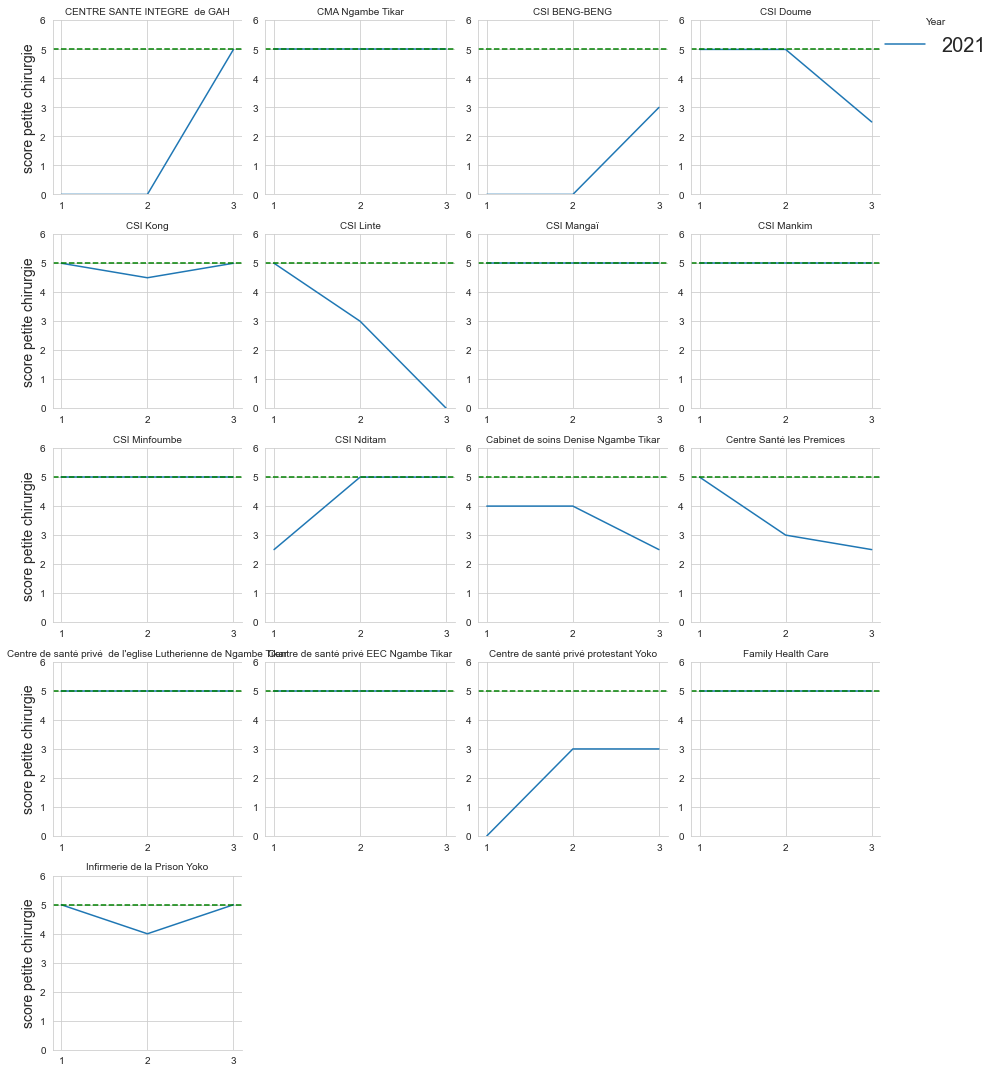

In [70]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_petite_chirurgie_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,6], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=5)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score petite chirurgie', fontsize=14);
g.savefig("images/Performance_evolution/petite_chirurgie")

In [71]:
scores_malnutrition = get_dataframe(scores, indicateurs_malnutrition_list, indicateurs_FOSA_periode_list)
scores_malnutrition_to_print = get_dataframe_to_plot(scores_malnutrition)
scores_malnutrition_to_print = get_df_with_trim_and_year(scores_malnutrition_to_print )
scores_malnutrition_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    0.0
12                                    CMA Ngambe Tikar    1  2021   12.0
13                                    CMA Ngambe Tikar    2  2021    8.0
14                                    CMA Ngambe Tikar    3  2021    7.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    7.0
36                                           CSI Doume    1  2021    2.0
37                                           CSI Doume    2  2021    9.0
38                                           CSI Doume    3  2021    0.0
48                                            CSI Kong    1  2021    2.0
49                                            CSI Kong    2  2021    2.0
50                                            CSI Kong    3  2021    0.0
60                                           CSI Linte    1  2021    2.0
61                                           CSI Linte    2  2021    7.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    2.0
73                                          CSI Mangaï    2  2021    2.0
74                                          CSI Mangaï    3  2021    0.0
84                                          CSI Mankim    1  2021    2.0
85                                          CSI Mankim    2  2021    2.0
86                                          CSI Mankim    3  2021    0.0
96                                       CSI Minfoumbe    1  2021    2.0
97                                       CSI Minfoumbe    2  2021    2.0
98                                       CSI Minfoumbe    3  2021    0.0
108                                         CSI Nditam    1  2021   12.0
109                                         CSI Nditam    2  2021    4.0
110                                         CSI Nditam    3  2021    0.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    2.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    2.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    5.0
132                          Centre Santé les Premices    1  2021    2.0
133                          Centre Santé les Premices    2  2021    5.0
134                          Centre Santé les Premices    3  2021    0.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021    0.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021    0.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021    0.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021    0.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021    4.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021    5.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    0.0
170              Centre de santé privé protestant Yoko    3  2021    0.0
180                                 Family Health Care    1  2021    2.0
181                                 Family Health Care    2  2021    0.0
182                                 Family Health Care    3  2021    0.0
192                       Infirmerie de la Prison Yoko    1  2021    4.0
193                       Infirmerie de la Prison Yoko    2  2021    4.0
194                       Infirmerie de la Prison Yoko    3  2021    0.0

In [72]:
scores_malnutrition_to_print_2 = scores_malnutrition_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_malnutrition_to_print_2 = scores_malnutrition_to_print_2.reset_index()
scores_malnutrition_to_print_2.columns.name = None
scores_malnutrition_to_print_2['moyenne'] = round((scores_malnutrition_to_print_2['1'] + scores_malnutrition_to_print_2['2'] + scores_malnutrition_to_print_2['3'])/3, 2)
scores_malnutrition_to_print_2['evolution_2_to_3'] = scores_malnutrition_to_print_2['3'] - scores_malnutrition_to_print_2['2']
scores_malnutrition_to_print_2

FOSA     1    2    3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0  0.0  0.0   
1                                    CMA Ngambe Tikar  12.0  8.0  7.0   
2                                       CSI BENG-BENG   0.0  0.0  7.0   
3                                           CSI Doume   2.0  9.0  0.0   
4                                            CSI Kong   2.0  2.0  0.0   
5                                           CSI Linte   2.0  7.0  0.0   
6                                          CSI Mangaï   2.0  2.0  0.0   
7                                          CSI Mankim   2.0  2.0  0.0   
8                                       CSI Minfoumbe   2.0  2.0  0.0   
9                                          CSI Nditam  12.0  4.0  0.0   
10               Cabinet de soins Denise Ngambe Tikar   2.0  2.0  5.0   
11                          Centre Santé les Premices   2.0  5.0  0.0   
12  Centre de santé privé  de l'eglise Lutherienne...   0.0  0.0  0.0   
13             Centre de santé privé EEC Ngambe Tikar   0.0  4.0  5.0   
14              Centre de santé privé protestant Yoko   0.0  0.0  0.0   
15                                 Family Health Care   2.0  0.0  0.0   
16                       Infirmerie de la Prison Yoko   4.0  4.0  0.0   

    moyenne  evolution_2_to_3  
0      0.00               0.0  
1      9.00              -1.0  
2      2.33               7.0  
3      3.67              -9.0  
4      1.33              -2.0  
5      3.00              -7.0  
6      1.33              -2.0  
7      1.33              -2.0  
8      1.33              -2.0  
9      5.33              -4.0  
10     3.00               3.0  
11     2.33              -5.0  
12     0.00               0.0  
13     3.00               1.0  
14     0.00               0.0  
15     0.67               0.0  
16     2.67              -4.0

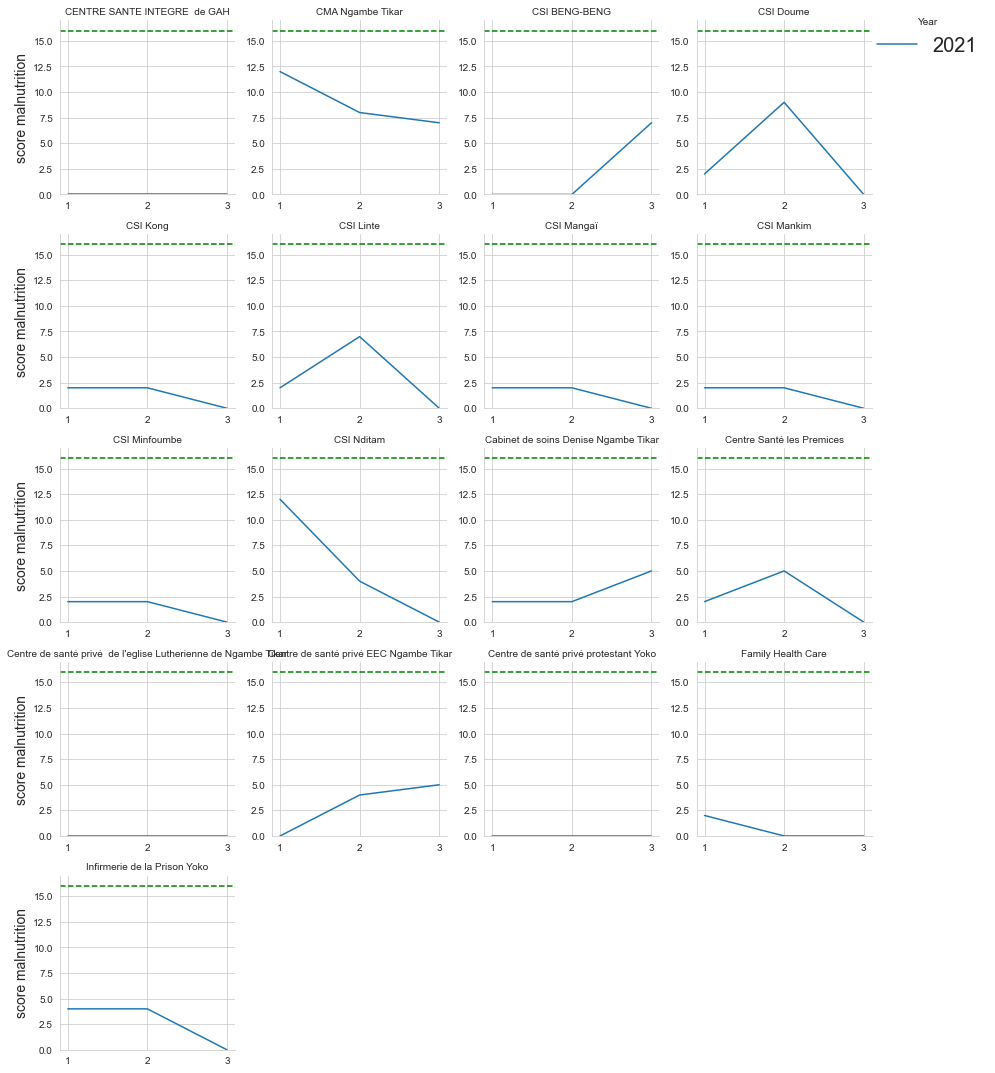

In [73]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_malnutrition_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,17], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=16)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score malnutrition', fontsize=14);
g.savefig("images/Performance_evolution/malnutrition")

In [74]:
scores_finances = get_dataframe(scores, indicateurs_partie_financière_list, indicateurs_FOSA_periode_list)
scores_finances_to_print = get_dataframe_to_plot(scores_finances)
scores_finances_to_print = get_df_with_trim_and_year(scores_finances_to_print )
scores_finances_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    2.0
12                                    CMA Ngambe Tikar    1  2021    4.0
13                                    CMA Ngambe Tikar    2  2021    4.0
14                                    CMA Ngambe Tikar    3  2021    4.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    2.0
36                                           CSI Doume    1  2021    8.0
37                                           CSI Doume    2  2021    8.0
38                                           CSI Doume    3  2021    8.0
48                                            CSI Kong    1  2021    0.0
49                                            CSI Kong    2  2021    4.0
50                                            CSI Kong    3  2021    8.0
60                                           CSI Linte    1  2021    2.0
61                                           CSI Linte    2  2021    2.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    4.0
73                                          CSI Mangaï    2  2021    8.0
74                                          CSI Mangaï    3  2021    8.0
84                                          CSI Mankim    1  2021    4.0
85                                          CSI Mankim    2  2021    0.0
86                                          CSI Mankim    3  2021    8.0
96                                       CSI Minfoumbe    1  2021    4.0
97                                       CSI Minfoumbe    2  2021    4.0
98                                       CSI Minfoumbe    3  2021    4.0
108                                         CSI Nditam    1  2021    4.0
109                                         CSI Nditam    2  2021    4.0
110                                         CSI Nditam    3  2021    8.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    4.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    4.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    2.0
132                          Centre Santé les Premices    1  2021    8.0
133                          Centre Santé les Premices    2  2021    8.0
134                          Centre Santé les Premices    3  2021    8.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021    8.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021    8.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021    4.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021    8.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021    6.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021    6.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    8.0
170              Centre de santé privé protestant Yoko    3  2021    8.0
180                                 Family Health Care    1  2021    4.0
181                                 Family Health Care    2  2021    8.0
182                                 Family Health Care    3  2021    4.0
192                       Infirmerie de la Prison Yoko    1  2021    8.0
193                       Infirmerie de la Prison Yoko    2  2021    4.0
194                       Infirmerie de la Prison Yoko    3  2021    4.0

In [75]:
scores_finances_to_print_2 = scores_finances_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_finances_to_print_2 = scores_finances_to_print_2.reset_index()
scores_finances_to_print_2.columns.name = None
scores_finances_to_print_2['moyenne'] = round((scores_finances_to_print_2['1'] + scores_finances_to_print_2['2'] + scores_finances_to_print_2['3'])/3, 2)
scores_finances_to_print_2['evolution_2_to_3'] = scores_finances_to_print_2['3'] - scores_finances_to_print_2['2']
scores_finances_to_print_2

FOSA    1    2    3  moyenne  \
0                        CENTRE SANTE INTEGRE  de GAH  0.0  0.0  2.0     0.67   
1                                    CMA Ngambe Tikar  4.0  4.0  4.0     4.00   
2                                       CSI BENG-BENG  0.0  0.0  2.0     0.67   
3                                           CSI Doume  8.0  8.0  8.0     8.00   
4                                            CSI Kong  0.0  4.0  8.0     4.00   
5                                           CSI Linte  2.0  2.0  0.0     1.33   
6                                          CSI Mangaï  4.0  8.0  8.0     6.67   
7                                          CSI Mankim  4.0  0.0  8.0     4.00   
8                                       CSI Minfoumbe  4.0  4.0  4.0     4.00   
9                                          CSI Nditam  4.0  4.0  8.0     5.33   
10               Cabinet de soins Denise Ngambe Tikar  4.0  4.0  2.0     3.33   
11                          Centre Santé les Premices  8.0  8.0  8.0     8.00   
12  Centre de santé privé  de l'eglise Lutherienne...  8.0  8.0  4.0     6.67   
13             Centre de santé privé EEC Ngambe Tikar  8.0  6.0  6.0     6.67   
14              Centre de santé privé protestant Yoko  0.0  8.0  8.0     5.33   
15                                 Family Health Care  4.0  8.0  4.0     5.33   
16                       Infirmerie de la Prison Yoko  8.0  4.0  4.0     5.33   

    evolution_2_to_3  
0                2.0  
1                0.0  
2                2.0  
3                0.0  
4                4.0  
5               -2.0  
6                0.0  
7                8.0  
8                0.0  
9                4.0  
10              -2.0  
11               0.0  
12              -4.0  
13               0.0  
14               0.0  
15              -4.0  
16               0.0

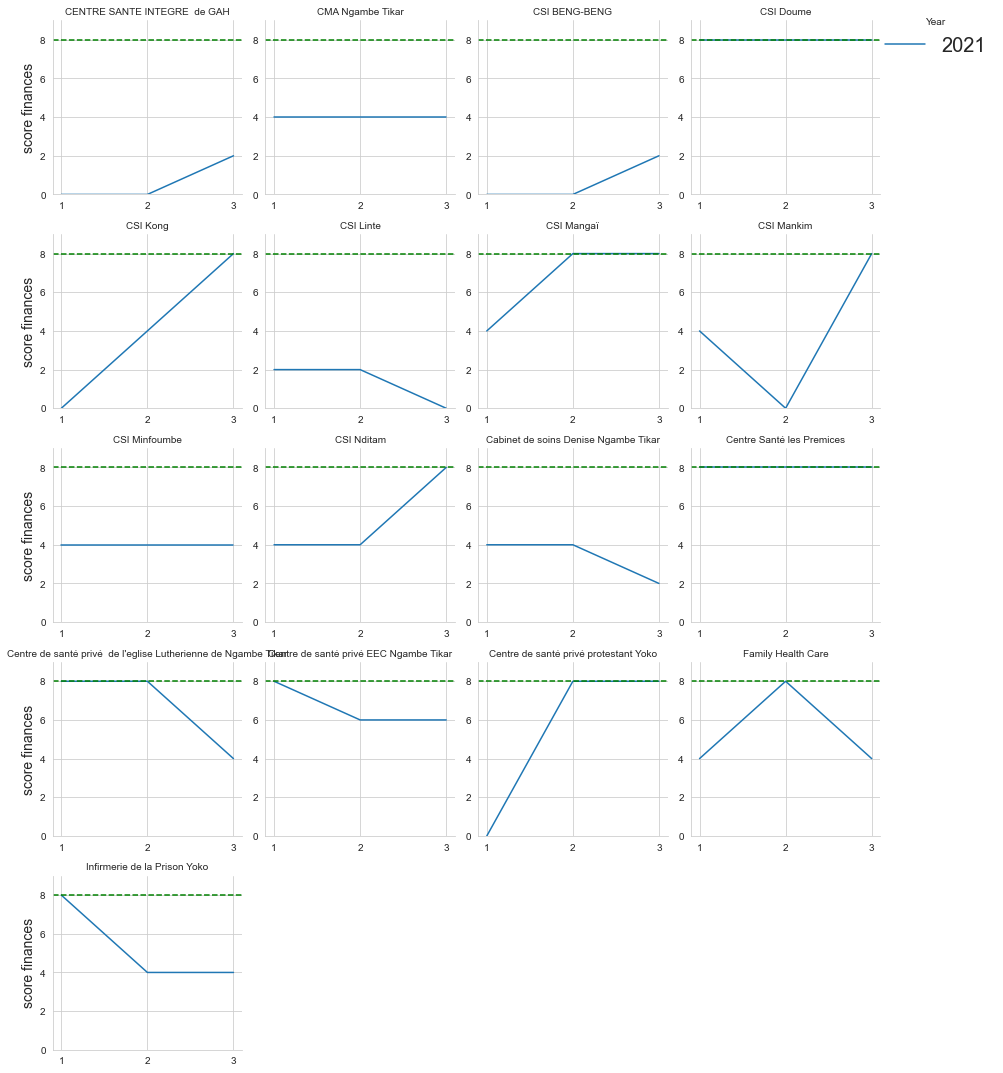

In [76]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_finances_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,9], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=8)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score finances', fontsize=14);
g.savefig("images/Performance_evolution/finance")

In [77]:
scores_business_plan = get_dataframe(scores, indicateurs_business_plan_trimestriel_list, indicateurs_FOSA_periode_list)
scores_business_plan_to_print = get_dataframe_to_plot(scores_business_plan)
scores_business_plan_to_print = get_df_with_trim_and_year(scores_business_plan_to_print )
scores_business_plan_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    8.0
12                                    CMA Ngambe Tikar    1  2021    6.0
13                                    CMA Ngambe Tikar    2  2021    8.0
14                                    CMA Ngambe Tikar    3  2021    8.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    4.0
36                                           CSI Doume    1  2021    2.0
37                                           CSI Doume    2  2021    2.0
38                                           CSI Doume    3  2021    8.0
48                                            CSI Kong    1  2021    2.0
49                                            CSI Kong    2  2021    2.0
50                                            CSI Kong    3  2021    6.0
60                                           CSI Linte    1  2021    8.0
61                                           CSI Linte    2  2021    4.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    2.0
73                                          CSI Mangaï    2  2021    2.0
74                                          CSI Mangaï    3  2021   10.0
84                                          CSI Mankim    1  2021    2.0
85                                          CSI Mankim    2  2021    8.0
86                                          CSI Mankim    3  2021    6.0
96                                       CSI Minfoumbe    1  2021    2.0
97                                       CSI Minfoumbe    2  2021    2.0
98                                       CSI Minfoumbe    3  2021    6.0
108                                         CSI Nditam    1  2021    6.0
109                                         CSI Nditam    2  2021    6.0
110                                         CSI Nditam    3  2021   10.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    6.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    6.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    4.0
132                          Centre Santé les Premices    1  2021    6.0
133                          Centre Santé les Premices    2  2021    6.0
134                          Centre Santé les Premices    3  2021   10.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021    4.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021    4.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   10.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021    8.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021    8.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021    8.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    2.0
170              Centre de santé privé protestant Yoko    3  2021    2.0
180                                 Family Health Care    1  2021    6.0
181                                 Family Health Care    2  2021    8.0
182                                 Family Health Care    3  2021    4.0
192                       Infirmerie de la Prison Yoko    1  2021    2.0
193                       Infirmerie de la Prison Yoko    2  2021    2.0
194                       Infirmerie de la Prison Yoko    3  2021    8.0

In [78]:
scores_business_plan_to_print_2 = scores_business_plan_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_business_plan_to_print_2 = scores_business_plan_to_print_2.reset_index()
scores_business_plan_to_print_2.columns.name = None
scores_business_plan_to_print_2['moyenne'] = round((scores_business_plan_to_print_2['1'] + scores_business_plan_to_print_2['2'] + scores_business_plan_to_print_2['3'])/3, 2)
scores_business_plan_to_print_2['evolution_2_to_3'] = scores_business_plan_to_print_2['3'] - scores_business_plan_to_print_2['2']
scores_business_plan_to_print_2

FOSA    1    2     3  \
0                        CENTRE SANTE INTEGRE  de GAH  0.0  0.0   8.0   
1                                    CMA Ngambe Tikar  6.0  8.0   8.0   
2                                       CSI BENG-BENG  0.0  0.0   4.0   
3                                           CSI Doume  2.0  2.0   8.0   
4                                            CSI Kong  2.0  2.0   6.0   
5                                           CSI Linte  8.0  4.0   0.0   
6                                          CSI Mangaï  2.0  2.0  10.0   
7                                          CSI Mankim  2.0  8.0   6.0   
8                                       CSI Minfoumbe  2.0  2.0   6.0   
9                                          CSI Nditam  6.0  6.0  10.0   
10               Cabinet de soins Denise Ngambe Tikar  6.0  6.0   4.0   
11                          Centre Santé les Premices  6.0  6.0  10.0   
12  Centre de santé privé  de l'eglise Lutherienne...  4.0  4.0  10.0   
13             Centre de santé privé EEC Ngambe Tikar  8.0  8.0   8.0   
14              Centre de santé privé protestant Yoko  0.0  2.0   2.0   
15                                 Family Health Care  6.0  8.0   4.0   
16                       Infirmerie de la Prison Yoko  2.0  2.0   8.0   

    moyenne  evolution_2_to_3  
0      2.67               8.0  
1      7.33               0.0  
2      1.33               4.0  
3      4.00               6.0  
4      3.33               4.0  
5      4.00              -4.0  
6      4.67               8.0  
7      5.33              -2.0  
8      3.33               4.0  
9      7.33               4.0  
10     5.33              -2.0  
11     7.33               4.0  
12     6.00               6.0  
13     8.00               0.0  
14     1.33               0.0  
15     6.00              -4.0  
16     4.00               6.0

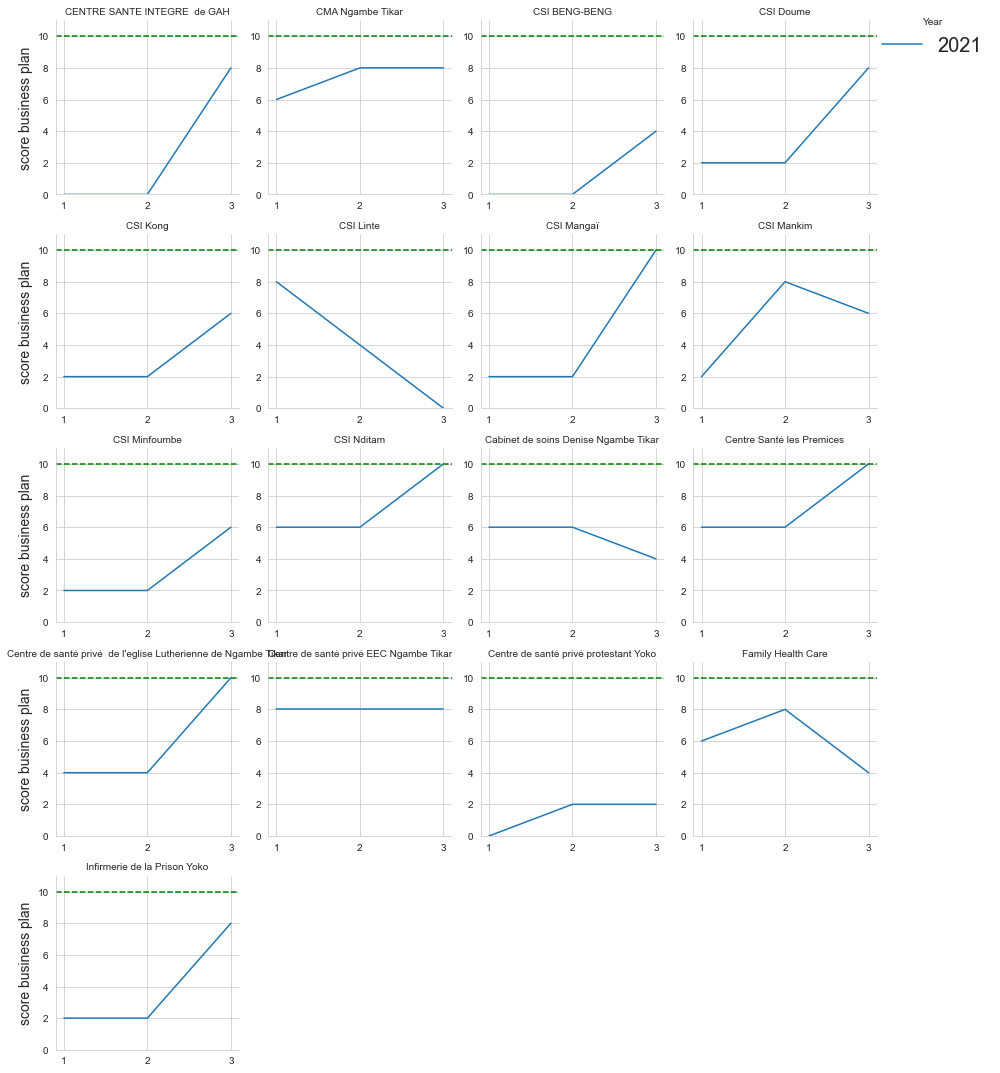

In [79]:
#plt.style.use('seaborn-whitegrid')
#sns.set_style('whitegrid')
g = sns.FacetGrid(scores_business_plan_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,11], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=10)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score business plan', fontsize=14);
g.savefig("images/Performance_evolution/business_plan")

In [80]:
scores_hygiene = get_dataframe(scores, indicateurs_hygiene_sterilisation_list, indicateurs_FOSA_periode_list)
scores_hygiene_to_print = get_dataframe_to_plot(scores_hygiene)
scores_hygiene_to_print = get_df_with_trim_and_year(scores_hygiene_to_print )
scores_hygiene_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   15.0
12                                    CMA Ngambe Tikar    1  2021   11.0
13                                    CMA Ngambe Tikar    2  2021   15.0
14                                    CMA Ngambe Tikar    3  2021   15.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   13.0
36                                           CSI Doume    1  2021    4.0
37                                           CSI Doume    2  2021    4.0
38                                           CSI Doume    3  2021   10.0
48                                            CSI Kong    1  2021    8.0
49                                            CSI Kong    2  2021   13.0
50                                            CSI Kong    3  2021   11.0
60                                           CSI Linte    1  2021   16.0
61                                           CSI Linte    2  2021    6.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   13.0
73                                          CSI Mangaï    2  2021    9.0
74                                          CSI Mangaï    3  2021    8.0
84                                          CSI Mankim    1  2021   12.0
85                                          CSI Mankim    2  2021    9.0
86                                          CSI Mankim    3  2021   12.0
96                                       CSI Minfoumbe    1  2021   14.0
97                                       CSI Minfoumbe    2  2021   12.0
98                                       CSI Minfoumbe    3  2021    9.0
108                                         CSI Nditam    1  2021   18.0
109                                         CSI Nditam    2  2021    8.0
110                                         CSI Nditam    3  2021    9.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   11.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   11.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021   12.0
132                          Centre Santé les Premices    1  2021    8.0
133                          Centre Santé les Premices    2  2021    8.0
134                          Centre Santé les Premices    3  2021    8.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   15.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   15.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   15.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   15.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   13.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   13.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   18.0
170              Centre de santé privé protestant Yoko    3  2021   17.0
180                                 Family Health Care    1  2021   12.0
181                                 Family Health Care    2  2021   15.0
182                                 Family Health Care    3  2021   12.0
192                       Infirmerie de la Prison Yoko    1  2021   11.0
193                       Infirmerie de la Prison Yoko    2  2021   12.0
194                       Infirmerie de la Prison Yoko    3  2021    0.0

In [81]:
scores_hygiene_to_print_2 = scores_hygiene_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_hygiene_to_print_2 = scores_hygiene_to_print_2.reset_index()
scores_hygiene_to_print_2.columns.name = None
scores_hygiene_to_print_2['moyenne'] = round((scores_hygiene_to_print_2['1'] + scores_hygiene_to_print_2['2'] + scores_hygiene_to_print_2['3'])/3, 2)
scores_hygiene_to_print_2['evolution_2_to_3'] = scores_hygiene_to_print_2['3'] - scores_hygiene_to_print_2['2']
scores_hygiene_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  15.0   
1                                    CMA Ngambe Tikar  11.0  15.0  15.0   
2                                       CSI BENG-BENG   0.0   0.0  13.0   
3                                           CSI Doume   4.0   4.0  10.0   
4                                            CSI Kong   8.0  13.0  11.0   
5                                           CSI Linte  16.0   6.0   0.0   
6                                          CSI Mangaï  13.0   9.0   8.0   
7                                          CSI Mankim  12.0   9.0  12.0   
8                                       CSI Minfoumbe  14.0  12.0   9.0   
9                                          CSI Nditam  18.0   8.0   9.0   
10               Cabinet de soins Denise Ngambe Tikar  11.0  11.0  12.0   
11                          Centre Santé les Premices   8.0   8.0   8.0   
12  Centre de santé privé  de l'eglise Lutherienne...  15.0  15.0  15.0   
13             Centre de santé privé EEC Ngambe Tikar  15.0  13.0  13.0   
14              Centre de santé privé protestant Yoko   0.0  18.0  17.0   
15                                 Family Health Care  12.0  15.0  12.0   
16                       Infirmerie de la Prison Yoko  11.0  12.0   0.0   

    moyenne  evolution_2_to_3  
0      5.00              15.0  
1     13.67               0.0  
2      4.33              13.0  
3      6.00               6.0  
4     10.67              -2.0  
5      7.33              -6.0  
6     10.00              -1.0  
7     11.00               3.0  
8     11.67              -3.0  
9     11.67               1.0  
10    11.33               1.0  
11     8.00               0.0  
12    15.00               0.0  
13    13.67               0.0  
14    11.67              -1.0  
15    13.00              -3.0  
16     7.67             -12.0

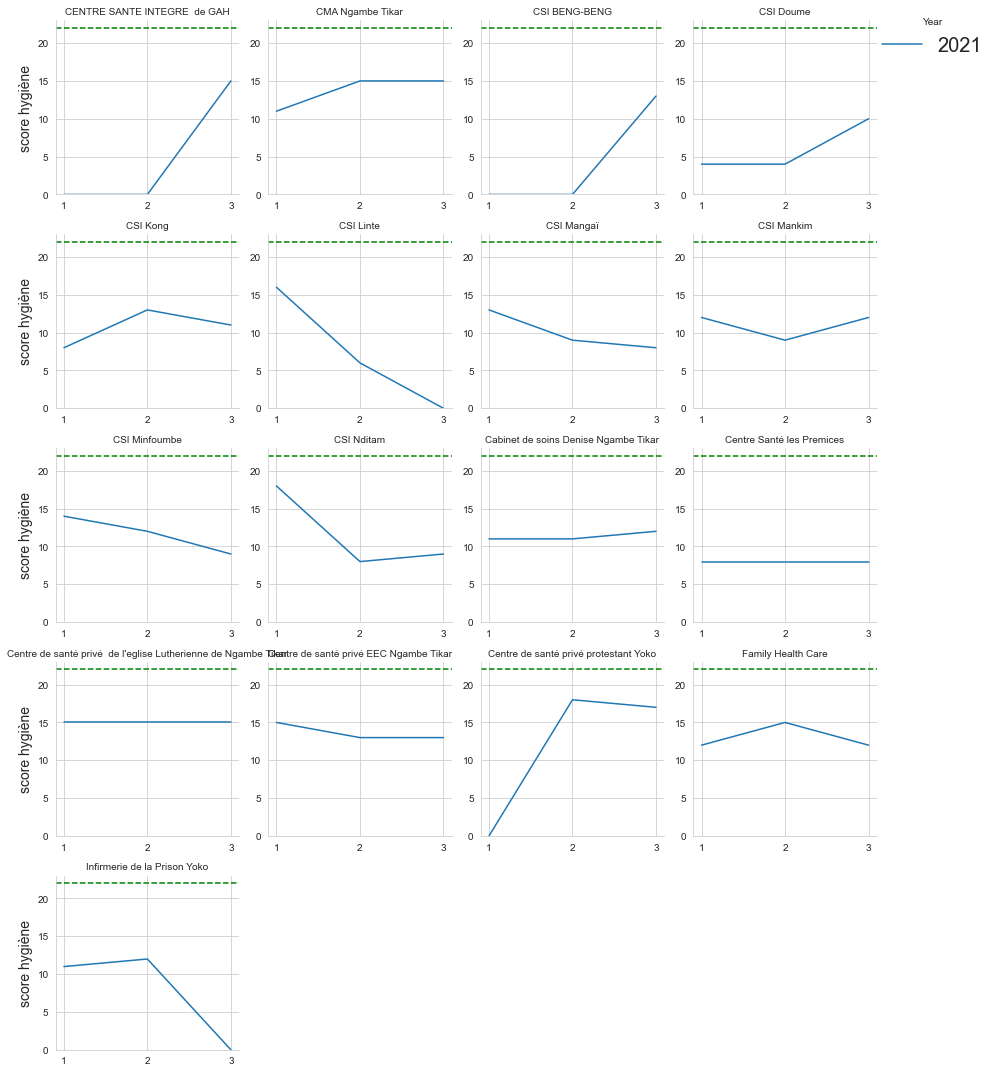

In [82]:
g = sns.FacetGrid(scores_hygiene_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,23], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=22)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score hygiène', fontsize=14);
g.savefig("images/Performance_evolution/hygiene")

In [83]:
scores_consultation_externe = get_dataframe(scores, indicateurs_cs_externe_list, indicateurs_FOSA_periode_list)
scores_consultation_externe_to_print = get_dataframe_to_plot(scores_consultation_externe)
scores_consultation_externe_to_print = get_df_with_trim_and_year(scores_consultation_externe_to_print )
scores_consultation_externe_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   29.0
12                                    CMA Ngambe Tikar    1  2021   36.0
13                                    CMA Ngambe Tikar    2  2021   36.0
14                                    CMA Ngambe Tikar    3  2021   36.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   30.0
36                                           CSI Doume    1  2021   22.0
37                                           CSI Doume    2  2021   22.0
38                                           CSI Doume    3  2021   28.0
48                                            CSI Kong    1  2021   26.0
49                                            CSI Kong    2  2021   27.0
50                                            CSI Kong    3  2021   26.0
60                                           CSI Linte    1  2021   30.0
61                                           CSI Linte    2  2021   15.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   29.0
73                                          CSI Mangaï    2  2021   30.0
74                                          CSI Mangaï    3  2021   28.0
84                                          CSI Mankim    1  2021   27.0
85                                          CSI Mankim    2  2021   31.0
86                                          CSI Mankim    3  2021   32.0
96                                       CSI Minfoumbe    1  2021   29.0
97                                       CSI Minfoumbe    2  2021   31.0
98                                       CSI Minfoumbe    3  2021   28.0
108                                         CSI Nditam    1  2021   32.0
109                                         CSI Nditam    2  2021   31.0
110                                         CSI Nditam    3  2021   27.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   28.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   25.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021   22.0
132                          Centre Santé les Premices    1  2021   31.0
133                          Centre Santé les Premices    2  2021   30.0
134                          Centre Santé les Premices    3  2021   34.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   38.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   35.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   33.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   38.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   36.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   36.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   30.0
170              Centre de santé privé protestant Yoko    3  2021   31.0
180                                 Family Health Care    1  2021   33.0
181                                 Family Health Care    2  2021   32.0
182                                 Family Health Care    3  2021   25.0
192                       Infirmerie de la Prison Yoko    1  2021   27.0
193                       Infirmerie de la Prison Yoko    2  2021   25.0
194                       Infirmerie de la Prison Yoko    3  2021   17.0

In [84]:
scores_consultation_externe_to_print_2 = scores_consultation_externe_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_consultation_externe_to_print_2 = scores_consultation_externe_to_print_2.reset_index()
scores_consultation_externe_to_print_2.columns.name = None
scores_consultation_externe_to_print_2['moyenne'] = round((scores_consultation_externe_to_print_2['1'] + scores_consultation_externe_to_print_2['2'] + scores_consultation_externe_to_print_2['3'])/3, 2)
scores_consultation_externe_to_print_2['evolution_2_to_3'] = scores_consultation_externe_to_print_2['3'] - scores_consultation_externe_to_print_2['2']
scores_consultation_externe_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  29.0   
1                                    CMA Ngambe Tikar  36.0  36.0  36.0   
2                                       CSI BENG-BENG   0.0   0.0  30.0   
3                                           CSI Doume  22.0  22.0  28.0   
4                                            CSI Kong  26.0  27.0  26.0   
5                                           CSI Linte  30.0  15.0   0.0   
6                                          CSI Mangaï  29.0  30.0  28.0   
7                                          CSI Mankim  27.0  31.0  32.0   
8                                       CSI Minfoumbe  29.0  31.0  28.0   
9                                          CSI Nditam  32.0  31.0  27.0   
10               Cabinet de soins Denise Ngambe Tikar  28.0  25.0  22.0   
11                          Centre Santé les Premices  31.0  30.0  34.0   
12  Centre de santé privé  de l'eglise Lutherienne...  38.0  35.0  33.0   
13             Centre de santé privé EEC Ngambe Tikar  38.0  36.0  36.0   
14              Centre de santé privé protestant Yoko   0.0  30.0  31.0   
15                                 Family Health Care  33.0  32.0  25.0   
16                       Infirmerie de la Prison Yoko  27.0  25.0  17.0   

    moyenne  evolution_2_to_3  
0      9.67              29.0  
1     36.00               0.0  
2     10.00              30.0  
3     24.00               6.0  
4     26.33              -1.0  
5     15.00             -15.0  
6     29.00              -2.0  
7     30.00               1.0  
8     29.33              -3.0  
9     30.00              -4.0  
10    25.00              -3.0  
11    31.67               4.0  
12    35.33              -2.0  
13    36.67               0.0  
14    20.33               1.0  
15    30.00              -7.0  
16    23.00              -8.0

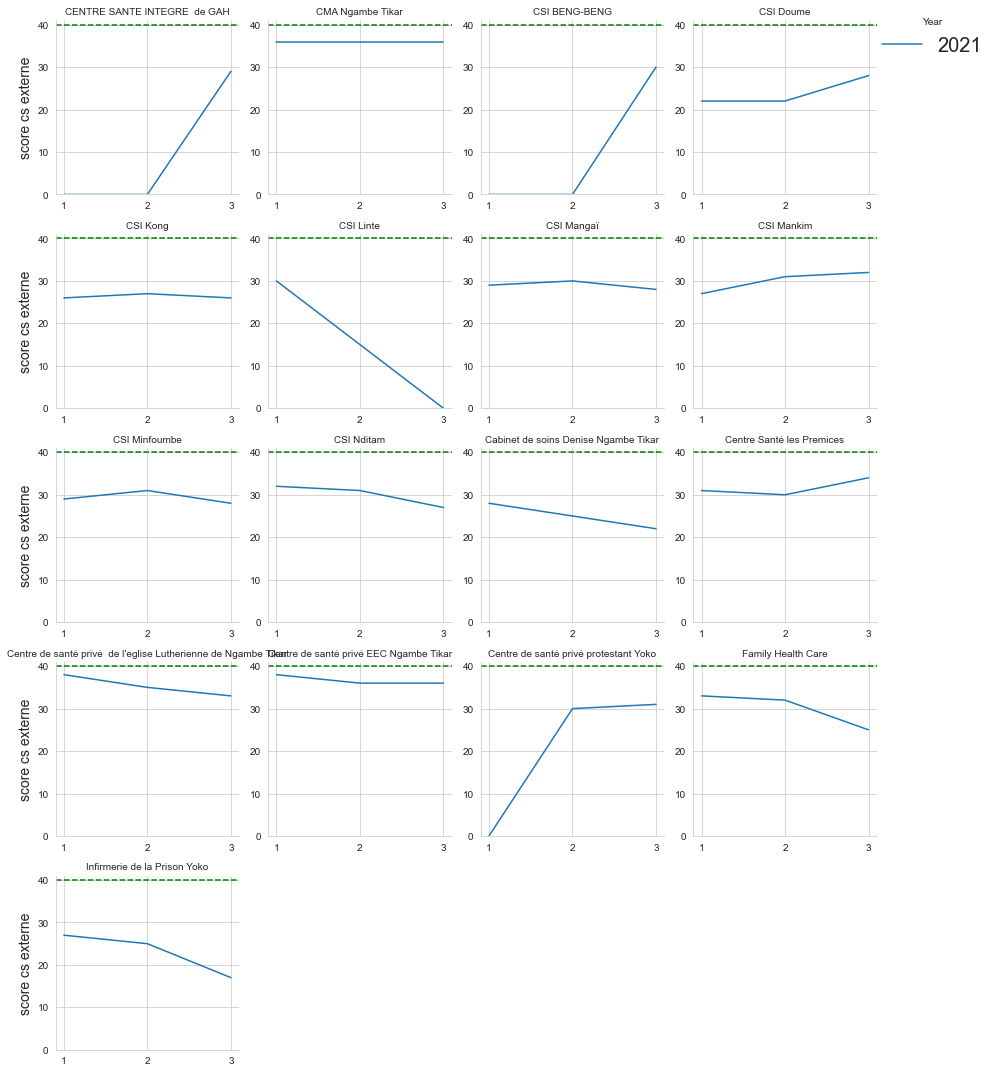

In [85]:
g = sns.FacetGrid(scores_consultation_externe_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,41], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=40)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score cs externe', fontsize=14);
g.savefig("images/Performance_evolution/cs_externe")

In [86]:
scores_planning_familial = get_dataframe(scores, indicateurs_pf_list, indicateurs_FOSA_periode_list)
scores_planning_familial_to_print = get_dataframe_to_plot(scores_planning_familial)
scores_planning_familial_to_print = get_df_with_trim_and_year(scores_planning_familial_to_print )
scores_planning_familial_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   18.0
12                                    CMA Ngambe Tikar    1  2021   20.0
13                                    CMA Ngambe Tikar    2  2021   21.0
14                                    CMA Ngambe Tikar    3  2021   13.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   15.0
36                                           CSI Doume    1  2021   15.0
37                                           CSI Doume    2  2021   12.0
38                                           CSI Doume    3  2021   15.0
48                                            CSI Kong    1  2021   13.0
49                                            CSI Kong    2  2021   14.0
50                                            CSI Kong    3  2021   17.0
60                                           CSI Linte    1  2021   17.0
61                                           CSI Linte    2  2021    6.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   15.0
73                                          CSI Mangaï    2  2021   16.0
74                                          CSI Mangaï    3  2021   12.0
84                                          CSI Mankim    1  2021   11.0
85                                          CSI Mankim    2  2021   12.0
86                                          CSI Mankim    3  2021    8.0
96                                       CSI Minfoumbe    1  2021   12.0
97                                       CSI Minfoumbe    2  2021   12.0
98                                       CSI Minfoumbe    3  2021   16.0
108                                         CSI Nditam    1  2021   18.0
109                                         CSI Nditam    2  2021   16.0
110                                         CSI Nditam    3  2021   15.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   12.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    8.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021   14.0
132                          Centre Santé les Premices    1  2021   17.0
133                          Centre Santé les Premices    2  2021   19.0
134                          Centre Santé les Premices    3  2021   20.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   20.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   20.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   20.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   20.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   14.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   14.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   17.0
170              Centre de santé privé protestant Yoko    3  2021   17.0
180                                 Family Health Care    1  2021   17.0
181                                 Family Health Care    2  2021   20.0
182                                 Family Health Care    3  2021   17.0
192                       Infirmerie de la Prison Yoko    1  2021   15.0
193                       Infirmerie de la Prison Yoko    2  2021   15.0
194                       Infirmerie de la Prison Yoko    3  2021   19.0

In [87]:
scores_planning_familial_to_print_2 = scores_planning_familial_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_planning_familial_to_print_2 = scores_planning_familial_to_print_2.reset_index()
scores_planning_familial_to_print_2.columns.name = None
scores_planning_familial_to_print_2['moyenne'] = round((scores_planning_familial_to_print_2['1'] + scores_planning_familial_to_print_2['2'] + scores_planning_familial_to_print_2['3'])/3, 2)
scores_planning_familial_to_print_2['evolution_2_to_3'] = scores_planning_familial_to_print_2['3'] - scores_planning_familial_to_print_2['2']
scores_planning_familial_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  18.0   
1                                    CMA Ngambe Tikar  20.0  21.0  13.0   
2                                       CSI BENG-BENG   0.0   0.0  15.0   
3                                           CSI Doume  15.0  12.0  15.0   
4                                            CSI Kong  13.0  14.0  17.0   
5                                           CSI Linte  17.0   6.0   0.0   
6                                          CSI Mangaï  15.0  16.0  12.0   
7                                          CSI Mankim  11.0  12.0   8.0   
8                                       CSI Minfoumbe  12.0  12.0  16.0   
9                                          CSI Nditam  18.0  16.0  15.0   
10               Cabinet de soins Denise Ngambe Tikar  12.0   8.0  14.0   
11                          Centre Santé les Premices  17.0  19.0  20.0   
12  Centre de santé privé  de l'eglise Lutherienne...  20.0  20.0  20.0   
13             Centre de santé privé EEC Ngambe Tikar  20.0  14.0  14.0   
14              Centre de santé privé protestant Yoko   0.0  17.0  17.0   
15                                 Family Health Care  17.0  20.0  17.0   
16                       Infirmerie de la Prison Yoko  15.0  15.0  19.0   

    moyenne  evolution_2_to_3  
0      6.00              18.0  
1     18.00              -8.0  
2      5.00              15.0  
3     14.00               3.0  
4     14.67               3.0  
5      7.67              -6.0  
6     14.33              -4.0  
7     10.33              -4.0  
8     13.33               4.0  
9     16.33              -1.0  
10    11.33               6.0  
11    18.67               1.0  
12    20.00               0.0  
13    16.00               0.0  
14    11.33               0.0  
15    18.00              -3.0  
16    16.33               4.0

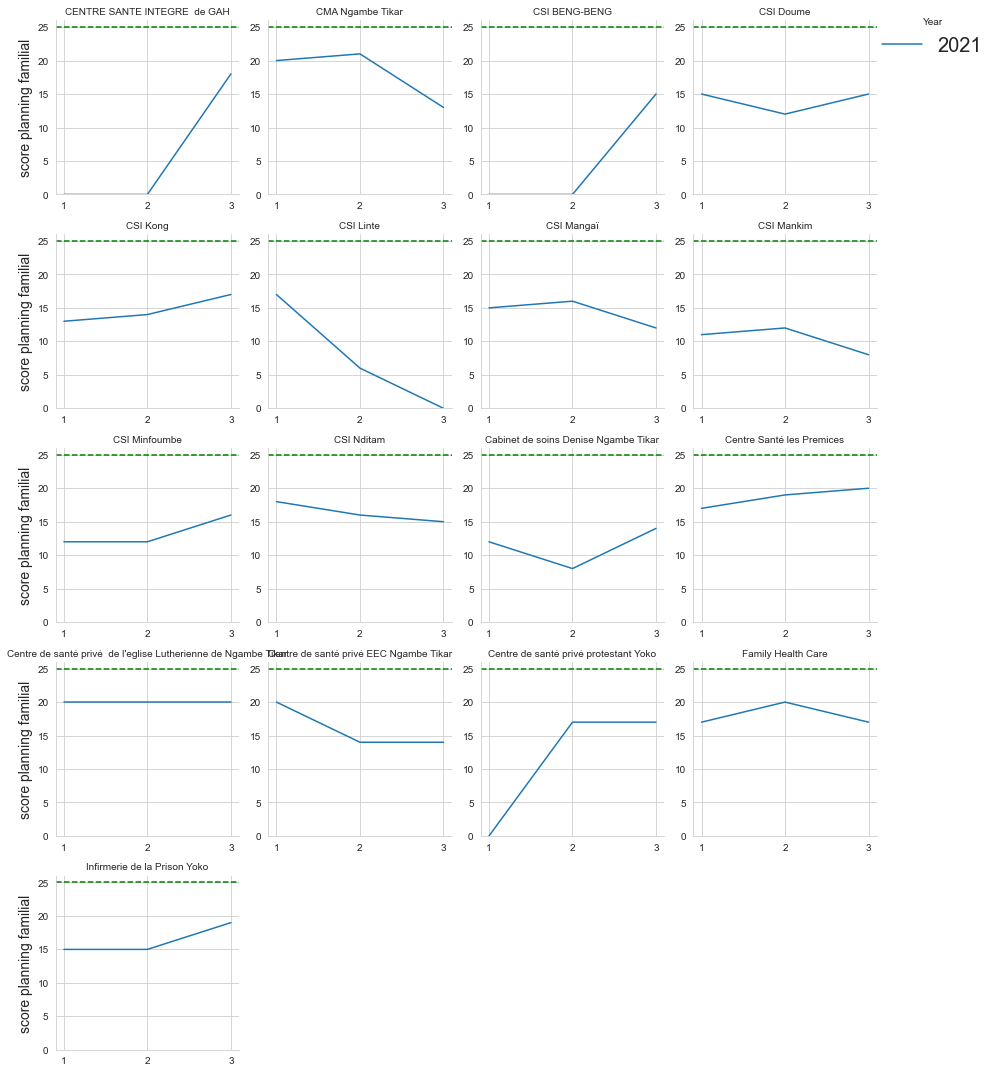

In [88]:
g = sns.FacetGrid(scores_planning_familial_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,26], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=25)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score planning familial', fontsize=14);
g.savefig("images/Performance_evolution/planning_familial")

In [89]:
scores_hospitalisation = get_dataframe(scores, indicateurs_hospi_list, indicateurs_FOSA_periode_list)
scores_hospitalisation_to_print = get_dataframe_to_plot(scores_hospitalisation)
scores_hospitalisation_to_print = get_df_with_trim_and_year(scores_hospitalisation_to_print )
scores_hospitalisation_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    7.0
12                                    CMA Ngambe Tikar    1  2021    7.0
13                                    CMA Ngambe Tikar    2  2021   10.0
14                                    CMA Ngambe Tikar    3  2021    8.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    6.0
36                                           CSI Doume    1  2021    3.0
37                                           CSI Doume    2  2021    4.0
38                                           CSI Doume    3  2021    7.0
48                                            CSI Kong    1  2021    3.0
49                                            CSI Kong    2  2021   10.0
50                                            CSI Kong    3  2021    7.0
60                                           CSI Linte    1  2021    6.0
61                                           CSI Linte    2  2021    5.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    7.0
73                                          CSI Mangaï    2  2021   10.0
74                                          CSI Mangaï    3  2021    7.0
84                                          CSI Mankim    1  2021    5.0
85                                          CSI Mankim    2  2021   10.0
86                                          CSI Mankim    3  2021    3.0
96                                       CSI Minfoumbe    1  2021    7.0
97                                       CSI Minfoumbe    2  2021    7.0
98                                       CSI Minfoumbe    3  2021    7.0
108                                         CSI Nditam    1  2021    7.0
109                                         CSI Nditam    2  2021    7.0
110                                         CSI Nditam    3  2021    5.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   10.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    6.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    9.0
132                          Centre Santé les Premices    1  2021   10.0
133                          Centre Santé les Premices    2  2021   10.0
134                          Centre Santé les Premices    3  2021   10.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   10.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   10.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   10.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   10.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   10.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   10.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    5.0
170              Centre de santé privé protestant Yoko    3  2021    5.0
180                                 Family Health Care    1  2021    5.0
181                                 Family Health Care    2  2021    7.0
182                                 Family Health Care    3  2021    5.0
192                       Infirmerie de la Prison Yoko    1  2021    5.0
193                       Infirmerie de la Prison Yoko    2  2021    3.0
194                       Infirmerie de la Prison Yoko    3  2021   10.0

In [90]:
scores_hospitalisation_to_print_2 = scores_hospitalisation_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_hospitalisation_to_print_2 = scores_hospitalisation_to_print_2.reset_index()
scores_hospitalisation_to_print_2.columns.name = None
scores_hospitalisation_to_print_2['moyenne'] = round((scores_hospitalisation_to_print_2['1'] + scores_hospitalisation_to_print_2['2'] + scores_hospitalisation_to_print_2['3'])/3, 2)
scores_hospitalisation_to_print_2['evolution_2_to_3'] = scores_hospitalisation_to_print_2['3'] - scores_hospitalisation_to_print_2['2']
scores_hospitalisation_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0   7.0   
1                                    CMA Ngambe Tikar   7.0  10.0   8.0   
2                                       CSI BENG-BENG   0.0   0.0   6.0   
3                                           CSI Doume   3.0   4.0   7.0   
4                                            CSI Kong   3.0  10.0   7.0   
5                                           CSI Linte   6.0   5.0   0.0   
6                                          CSI Mangaï   7.0  10.0   7.0   
7                                          CSI Mankim   5.0  10.0   3.0   
8                                       CSI Minfoumbe   7.0   7.0   7.0   
9                                          CSI Nditam   7.0   7.0   5.0   
10               Cabinet de soins Denise Ngambe Tikar  10.0   6.0   9.0   
11                          Centre Santé les Premices  10.0  10.0  10.0   
12  Centre de santé privé  de l'eglise Lutherienne...  10.0  10.0  10.0   
13             Centre de santé privé EEC Ngambe Tikar  10.0  10.0  10.0   
14              Centre de santé privé protestant Yoko   0.0   5.0   5.0   
15                                 Family Health Care   5.0   7.0   5.0   
16                       Infirmerie de la Prison Yoko   5.0   3.0  10.0   

    moyenne  evolution_2_to_3  
0      2.33               7.0  
1      8.33              -2.0  
2      2.00               6.0  
3      4.67               3.0  
4      6.67              -3.0  
5      3.67              -5.0  
6      8.00              -3.0  
7      6.00              -7.0  
8      7.00               0.0  
9      6.33              -2.0  
10     8.33               3.0  
11    10.00               0.0  
12    10.00               0.0  
13    10.00               0.0  
14     3.33               0.0  
15     5.67              -2.0  
16     6.00               7.0

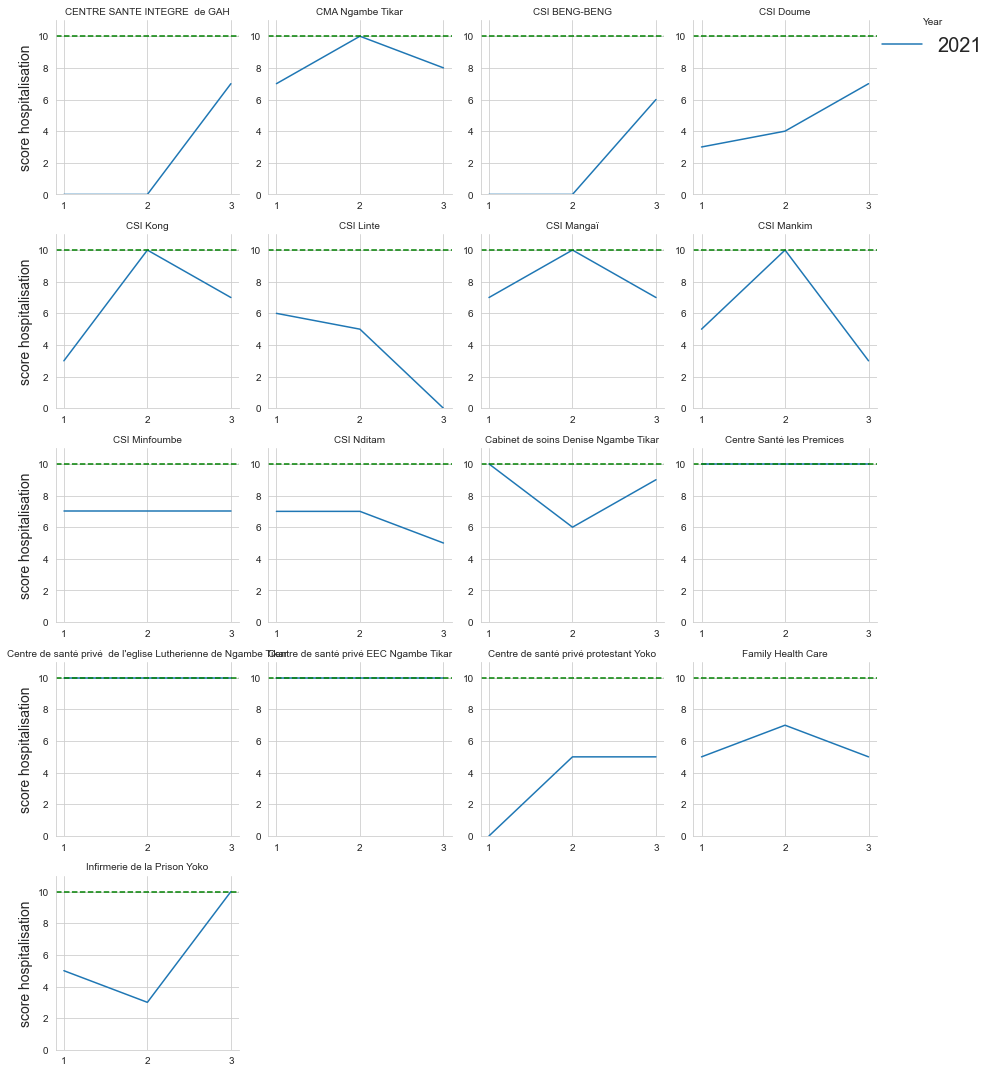

In [91]:
g = sns.FacetGrid(scores_hospitalisation_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,11], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=10)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score hospitalisation', fontsize=14);
g.savefig("images/Performance_evolution/hospitalisation")

In [92]:
scores_gest_med = get_dataframe(scores, indicateurs_gest_med_list, indicateurs_FOSA_periode_list)
scores_gest_med_to_print = get_dataframe_to_plot(scores_gest_med)
scores_gest_med_to_print = get_df_with_trim_and_year(scores_gest_med_to_print )
scores_gest_med_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   13.0
12                                    CMA Ngambe Tikar    1  2021   13.0
13                                    CMA Ngambe Tikar    2  2021   15.0
14                                    CMA Ngambe Tikar    3  2021   11.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   12.0
36                                           CSI Doume    1  2021   13.0
37                                           CSI Doume    2  2021    8.0
38                                           CSI Doume    3  2021   15.0
48                                            CSI Kong    1  2021   11.0
49                                            CSI Kong    2  2021   12.0
50                                            CSI Kong    3  2021   14.0
60                                           CSI Linte    1  2021   11.0
61                                           CSI Linte    2  2021    3.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   13.0
73                                          CSI Mangaï    2  2021   13.0
74                                          CSI Mangaï    3  2021   11.0
84                                          CSI Mankim    1  2021   13.0
85                                          CSI Mankim    2  2021   10.0
86                                          CSI Mankim    3  2021   12.0
96                                       CSI Minfoumbe    1  2021   13.0
97                                       CSI Minfoumbe    2  2021   13.0
98                                       CSI Minfoumbe    3  2021   12.0
108                                         CSI Nditam    1  2021   11.0
109                                         CSI Nditam    2  2021    6.0
110                                         CSI Nditam    3  2021   13.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   10.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   13.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021   10.0
132                          Centre Santé les Premices    1  2021   13.0
133                          Centre Santé les Premices    2  2021   13.0
134                          Centre Santé les Premices    3  2021   12.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   15.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   15.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   15.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   15.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   15.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   15.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   12.0
170              Centre de santé privé protestant Yoko    3  2021   12.0
180                                 Family Health Care    1  2021   13.0
181                                 Family Health Care    2  2021   13.0
182                                 Family Health Care    3  2021   12.0
192                       Infirmerie de la Prison Yoko    1  2021   13.0
193                       Infirmerie de la Prison Yoko    2  2021   13.0
194                       Infirmerie de la Prison Yoko    3  2021   15.0

In [93]:
scores_gest_med_to_print_2 = scores_gest_med_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_gest_med_to_print_2 = scores_gest_med_to_print_2.reset_index()
scores_gest_med_to_print_2.columns.name = None
scores_gest_med_to_print_2['moyenne'] = round((scores_gest_med_to_print_2['1'] + scores_gest_med_to_print_2['2'] + scores_gest_med_to_print_2['3'])/3, 2)
scores_gest_med_to_print_2['evolution_2_to_3'] = scores_gest_med_to_print_2['3'] - scores_gest_med_to_print_2['2']
scores_gest_med_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  13.0   
1                                    CMA Ngambe Tikar  13.0  15.0  11.0   
2                                       CSI BENG-BENG   0.0   0.0  12.0   
3                                           CSI Doume  13.0   8.0  15.0   
4                                            CSI Kong  11.0  12.0  14.0   
5                                           CSI Linte  11.0   3.0   0.0   
6                                          CSI Mangaï  13.0  13.0  11.0   
7                                          CSI Mankim  13.0  10.0  12.0   
8                                       CSI Minfoumbe  13.0  13.0  12.0   
9                                          CSI Nditam  11.0   6.0  13.0   
10               Cabinet de soins Denise Ngambe Tikar  10.0  13.0  10.0   
11                          Centre Santé les Premices  13.0  13.0  12.0   
12  Centre de santé privé  de l'eglise Lutherienne...  15.0  15.0  15.0   
13             Centre de santé privé EEC Ngambe Tikar  15.0  15.0  15.0   
14              Centre de santé privé protestant Yoko   0.0  12.0  12.0   
15                                 Family Health Care  13.0  13.0  12.0   
16                       Infirmerie de la Prison Yoko  13.0  13.0  15.0   

    moyenne  evolution_2_to_3  
0      4.33              13.0  
1     13.00              -4.0  
2      4.00              12.0  
3     12.00               7.0  
4     12.33               2.0  
5      4.67              -3.0  
6     12.33              -2.0  
7     11.67               2.0  
8     12.67              -1.0  
9     10.00               7.0  
10    11.00              -3.0  
11    12.67              -1.0  
12    15.00               0.0  
13    15.00               0.0  
14     8.00               0.0  
15    12.67              -1.0  
16    13.67               2.0

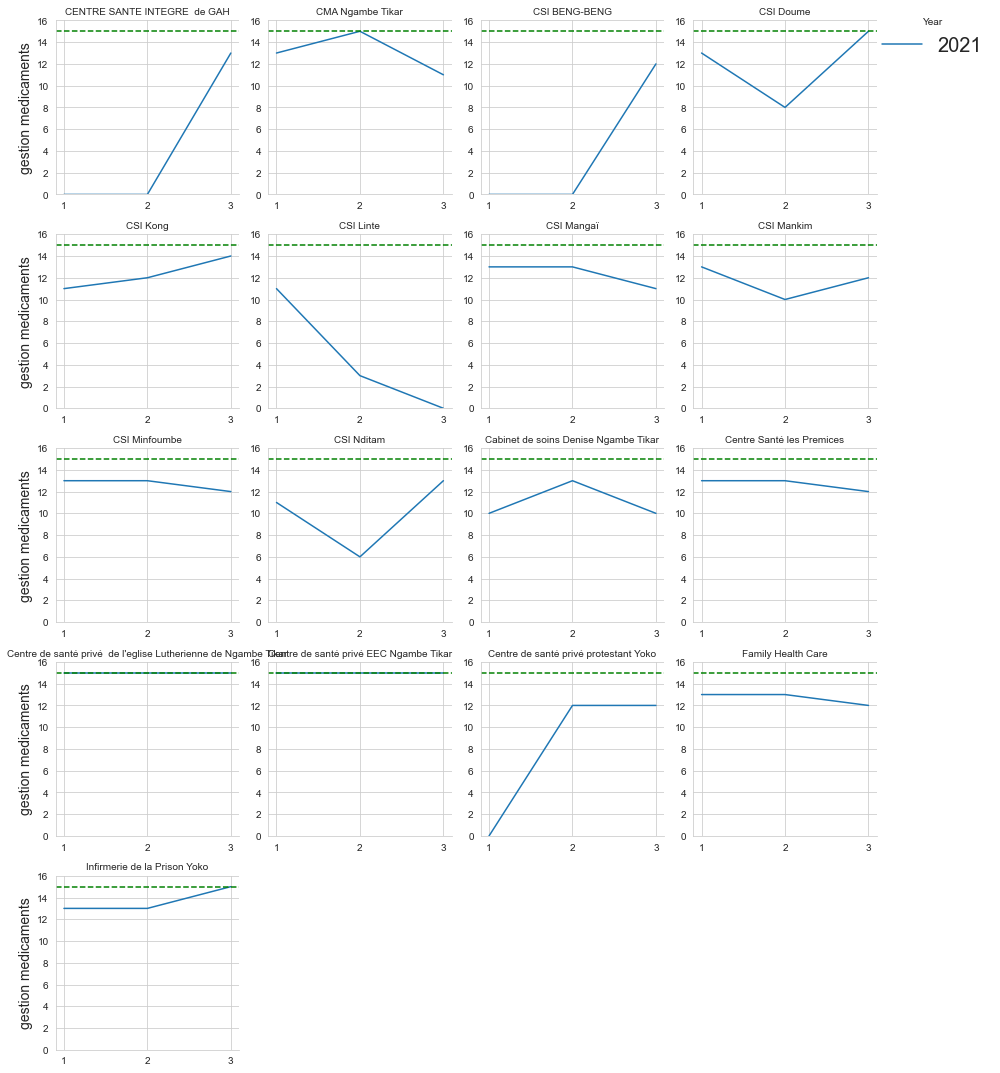

In [94]:
g = sns.FacetGrid(scores_gest_med_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,16], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=15)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'gestion medicaments', fontsize=14);
g.savefig("images/Performance_evolution/gest_med")

In [95]:
scores_med_traceurs = get_dataframe(scores, indicateurs_med_traceurs_list, indicateurs_FOSA_periode_list)
scores_med_traceurs_to_print = get_dataframe_to_plot(scores_med_traceurs)
scores_med_traceurs_to_print = get_df_with_trim_and_year(scores_med_traceurs_to_print )
scores_med_traceurs_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   14.0
12                                    CMA Ngambe Tikar    1  2021   14.0
13                                    CMA Ngambe Tikar    2  2021   14.0
14                                    CMA Ngambe Tikar    3  2021   14.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   14.0
36                                           CSI Doume    1  2021   15.0
37                                           CSI Doume    2  2021   15.0
38                                           CSI Doume    3  2021   14.0
48                                            CSI Kong    1  2021   15.0
49                                            CSI Kong    2  2021   15.0
50                                            CSI Kong    3  2021   14.0
60                                           CSI Linte    1  2021   15.0
61                                           CSI Linte    2  2021   11.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   15.0
73                                          CSI Mangaï    2  2021   15.0
74                                          CSI Mangaï    3  2021   14.0
84                                          CSI Mankim    1  2021   15.0
85                                          CSI Mankim    2  2021   15.0
86                                          CSI Mankim    3  2021   15.0
96                                       CSI Minfoumbe    1  2021   15.0
97                                       CSI Minfoumbe    2  2021   15.0
98                                       CSI Minfoumbe    3  2021   13.0
108                                         CSI Nditam    1  2021   15.0
109                                         CSI Nditam    2  2021   14.0
110                                         CSI Nditam    3  2021   14.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   15.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   15.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021   14.0
132                          Centre Santé les Premices    1  2021   15.0
133                          Centre Santé les Premices    2  2021   15.0
134                          Centre Santé les Premices    3  2021   13.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   15.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   15.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   15.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   15.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   15.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   15.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   15.0
170              Centre de santé privé protestant Yoko    3  2021   15.0
180                                 Family Health Care    1  2021   15.0
181                                 Family Health Care    2  2021   15.0
182                                 Family Health Care    3  2021   13.0
192                       Infirmerie de la Prison Yoko    1  2021   15.0
193                       Infirmerie de la Prison Yoko    2  2021   15.0
194                       Infirmerie de la Prison Yoko    3  2021   13.0

In [96]:
scores_med_traceurs_to_print_2 = scores_med_traceurs_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_med_traceurs_to_print_2 = scores_med_traceurs_to_print_2.reset_index()
scores_med_traceurs_to_print_2.columns.name = None
scores_med_traceurs_to_print_2['moyenne'] = round((scores_med_traceurs_to_print_2['1'] + scores_med_traceurs_to_print_2['2'] + scores_med_traceurs_to_print_2['3'])/3, 2)
scores_med_traceurs_to_print_2['evolution_2_to_3'] = scores_med_traceurs_to_print_2['3'] - scores_med_traceurs_to_print_2['2']
scores_med_traceurs_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  14.0   
1                                    CMA Ngambe Tikar  14.0  14.0  14.0   
2                                       CSI BENG-BENG   0.0   0.0  14.0   
3                                           CSI Doume  15.0  15.0  14.0   
4                                            CSI Kong  15.0  15.0  14.0   
5                                           CSI Linte  15.0  11.0   0.0   
6                                          CSI Mangaï  15.0  15.0  14.0   
7                                          CSI Mankim  15.0  15.0  15.0   
8                                       CSI Minfoumbe  15.0  15.0  13.0   
9                                          CSI Nditam  15.0  14.0  14.0   
10               Cabinet de soins Denise Ngambe Tikar  15.0  15.0  14.0   
11                          Centre Santé les Premices  15.0  15.0  13.0   
12  Centre de santé privé  de l'eglise Lutherienne...  15.0  15.0  15.0   
13             Centre de santé privé EEC Ngambe Tikar  15.0  15.0  15.0   
14              Centre de santé privé protestant Yoko   0.0  15.0  15.0   
15                                 Family Health Care  15.0  15.0  13.0   
16                       Infirmerie de la Prison Yoko  15.0  15.0  13.0   

    moyenne  evolution_2_to_3  
0      4.67              14.0  
1     14.00               0.0  
2      4.67              14.0  
3     14.67              -1.0  
4     14.67              -1.0  
5      8.67             -11.0  
6     14.67              -1.0  
7     15.00               0.0  
8     14.33              -2.0  
9     14.33               0.0  
10    14.67              -1.0  
11    14.33              -2.0  
12    15.00               0.0  
13    15.00               0.0  
14    10.00               0.0  
15    14.33              -2.0  
16    14.33              -2.0

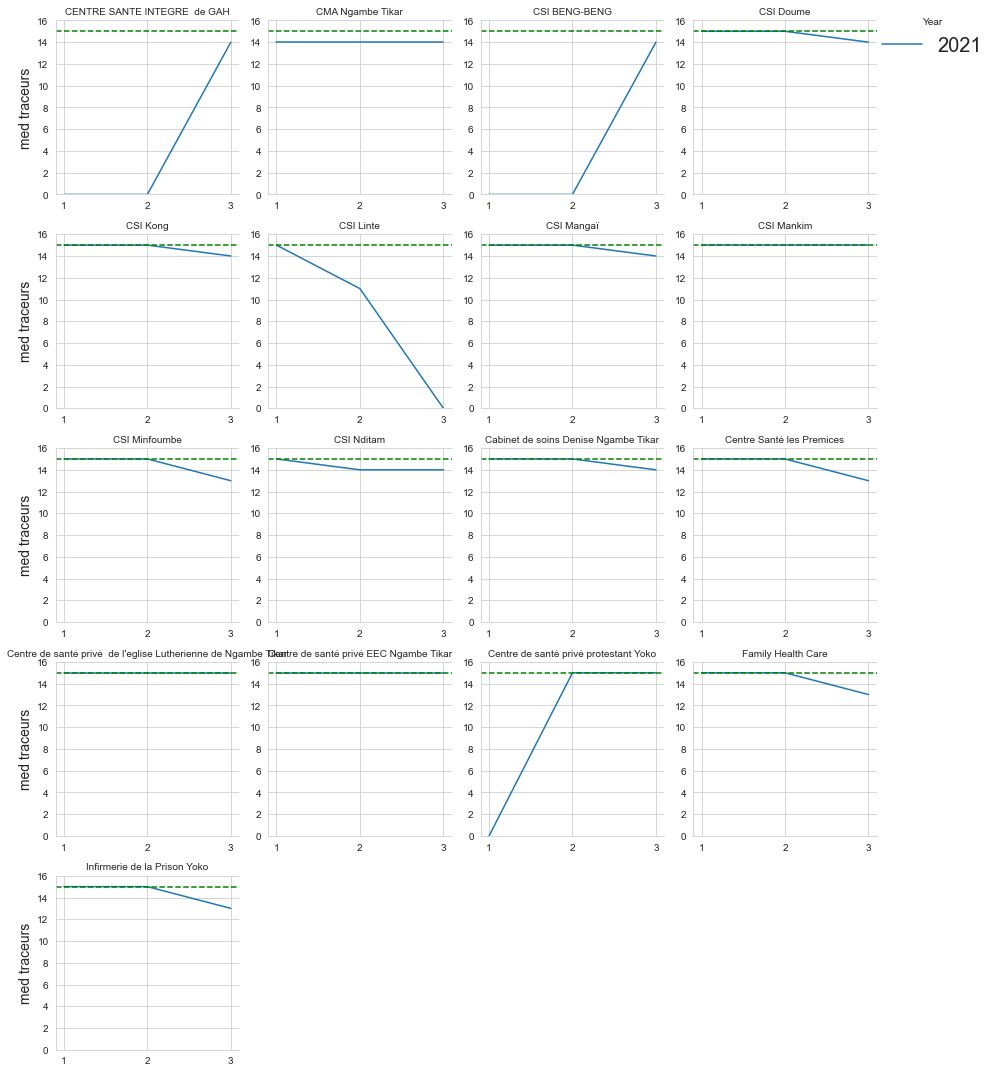

In [97]:
g = sns.FacetGrid(scores_med_traceurs_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,16], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=15)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'med traceurs', fontsize=14);
g.savefig("images/Performance_evolution/med_traceurs")

In [98]:
scores_maternite = get_dataframe(scores, indicateurs_maternite_list, indicateurs_FOSA_periode_list)
scores_maternite_to_print = get_dataframe_to_plot(scores_maternite)
scores_maternite_to_print = get_df_with_trim_and_year(scores_maternite_to_print )
scores_maternite_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   24.0
12                                    CMA Ngambe Tikar    1  2021   26.0
13                                    CMA Ngambe Tikar    2  2021   26.0
14                                    CMA Ngambe Tikar    3  2021   27.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   19.0
36                                           CSI Doume    1  2021   11.0
37                                           CSI Doume    2  2021   17.0
38                                           CSI Doume    3  2021   28.0
48                                            CSI Kong    1  2021   12.0
49                                            CSI Kong    2  2021   16.0
50                                            CSI Kong    3  2021   24.0
60                                           CSI Linte    1  2021   20.0
61                                           CSI Linte    2  2021   11.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   25.0
73                                          CSI Mangaï    2  2021   26.0
74                                          CSI Mangaï    3  2021   25.0
84                                          CSI Mankim    1  2021   18.0
85                                          CSI Mankim    2  2021   16.0
86                                          CSI Mankim    3  2021   21.0
96                                       CSI Minfoumbe    1  2021   23.0
97                                       CSI Minfoumbe    2  2021   24.0
98                                       CSI Minfoumbe    3  2021   23.0
108                                         CSI Nditam    1  2021   28.0
109                                         CSI Nditam    2  2021   20.0
110                                         CSI Nditam    3  2021   20.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   14.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   23.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021   17.0
132                          Centre Santé les Premices    1  2021   21.0
133                          Centre Santé les Premices    2  2021   25.0
134                          Centre Santé les Premices    3  2021   30.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   32.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   31.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   28.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   16.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   16.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   16.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   27.0
170              Centre de santé privé protestant Yoko    3  2021   27.0
180                                 Family Health Care    1  2021   28.0
181                                 Family Health Care    2  2021   29.0
182                                 Family Health Care    3  2021   21.0
192                       Infirmerie de la Prison Yoko    1  2021   21.0
193                       Infirmerie de la Prison Yoko    2  2021   23.0
194                       Infirmerie de la Prison Yoko    3  2021   31.0

In [99]:
scores_maternite_to_print_2 = scores_maternite_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_maternite_to_print_2 = scores_maternite_to_print_2.reset_index()
scores_maternite_to_print_2.columns.name = None
scores_maternite_to_print_2['moyenne'] = round((scores_maternite_to_print_2['1'] + scores_maternite_to_print_2['2'] + scores_maternite_to_print_2['3'])/3, 2)
scores_maternite_to_print_2['evolution_2_to_3'] = scores_maternite_to_print_2['3'] - scores_maternite_to_print_2['2']
scores_maternite_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  24.0   
1                                    CMA Ngambe Tikar  26.0  26.0  27.0   
2                                       CSI BENG-BENG   0.0   0.0  19.0   
3                                           CSI Doume  11.0  17.0  28.0   
4                                            CSI Kong  12.0  16.0  24.0   
5                                           CSI Linte  20.0  11.0   0.0   
6                                          CSI Mangaï  25.0  26.0  25.0   
7                                          CSI Mankim  18.0  16.0  21.0   
8                                       CSI Minfoumbe  23.0  24.0  23.0   
9                                          CSI Nditam  28.0  20.0  20.0   
10               Cabinet de soins Denise Ngambe Tikar  14.0  23.0  17.0   
11                          Centre Santé les Premices  21.0  25.0  30.0   
12  Centre de santé privé  de l'eglise Lutherienne...  32.0  31.0  28.0   
13             Centre de santé privé EEC Ngambe Tikar  16.0  16.0  16.0   
14              Centre de santé privé protestant Yoko   0.0  27.0  27.0   
15                                 Family Health Care  28.0  29.0  21.0   
16                       Infirmerie de la Prison Yoko  21.0  23.0  31.0   

    moyenne  evolution_2_to_3  
0      8.00              24.0  
1     26.33               1.0  
2      6.33              19.0  
3     18.67              11.0  
4     17.33               8.0  
5     10.33             -11.0  
6     25.33              -1.0  
7     18.33               5.0  
8     23.33              -1.0  
9     22.67               0.0  
10    18.00              -6.0  
11    25.33               5.0  
12    30.33              -3.0  
13    16.00               0.0  
14    18.00               0.0  
15    26.00              -8.0  
16    25.00               8.0

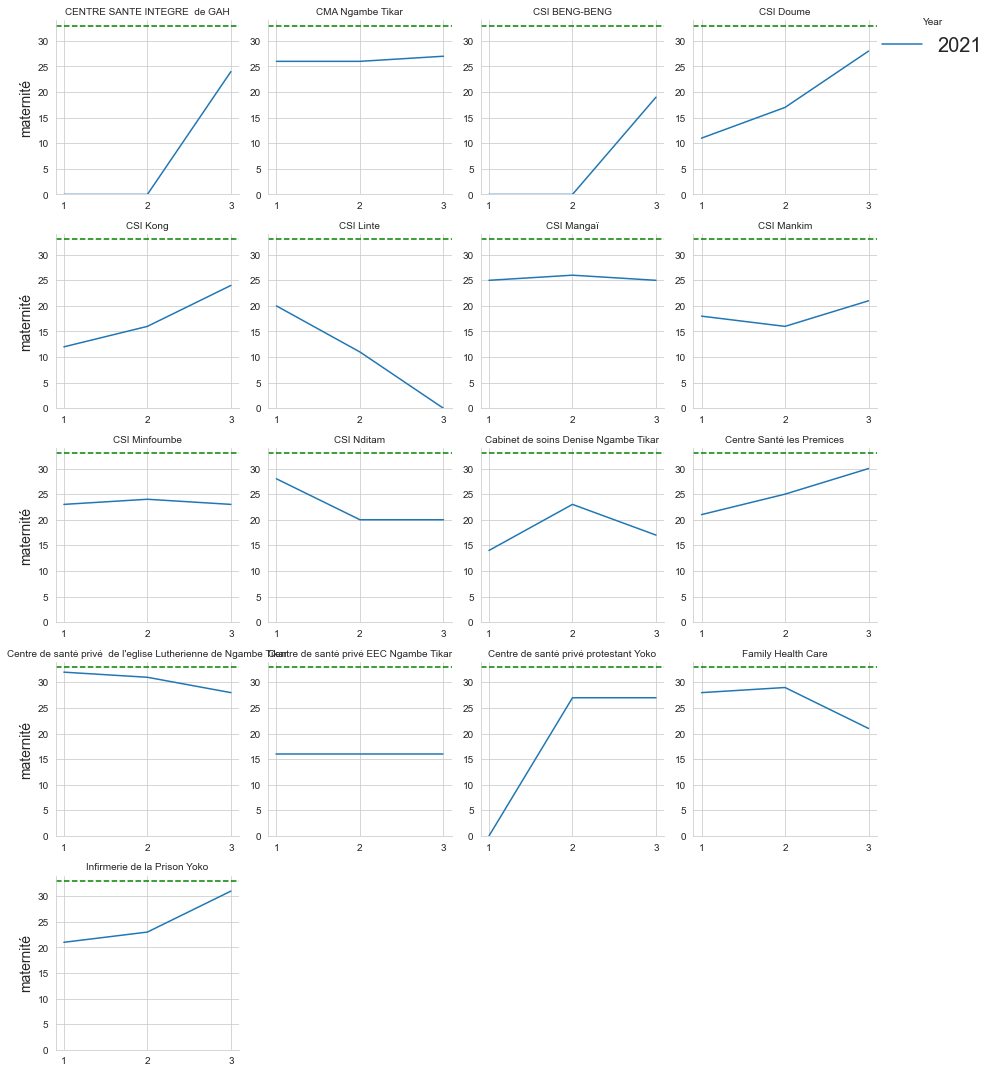

In [100]:
g = sns.FacetGrid(scores_maternite_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,34], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=33)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'maternité', fontsize=14);
g.savefig("images/Performance_evolution/maternite")

In [101]:
scores_cpn = get_dataframe(scores, indicateurs_cpn_list, indicateurs_FOSA_periode_list)
scores_cpn_to_print = get_dataframe_to_plot(scores_cpn)
scores_cpn_to_print = get_df_with_trim_and_year(scores_cpn_to_print )
scores_cpn_to_print  

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    9.0
12                                    CMA Ngambe Tikar    1  2021   12.0
13                                    CMA Ngambe Tikar    2  2021   10.0
14                                    CMA Ngambe Tikar    3  2021   12.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021   11.0
36                                           CSI Doume    1  2021   13.0
37                                           CSI Doume    2  2021   11.0
38                                           CSI Doume    3  2021   15.0
48                                            CSI Kong    1  2021   10.0
49                                            CSI Kong    2  2021    7.0
50                                            CSI Kong    3  2021    9.0
60                                           CSI Linte    1  2021   13.0
61                                           CSI Linte    2  2021    5.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   13.0
73                                          CSI Mangaï    2  2021   16.0
74                                          CSI Mangaï    3  2021   11.0
84                                          CSI Mankim    1  2021    6.0
85                                          CSI Mankim    2  2021    9.0
86                                          CSI Mankim    3  2021   10.0
96                                       CSI Minfoumbe    1  2021    6.0
97                                       CSI Minfoumbe    2  2021   10.0
98                                       CSI Minfoumbe    3  2021   10.0
108                                         CSI Nditam    1  2021    9.0
109                                         CSI Nditam    2  2021    9.0
110                                         CSI Nditam    3  2021   13.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021   10.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    7.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    8.0
132                          Centre Santé les Premices    1  2021   12.0
133                          Centre Santé les Premices    2  2021   12.0
134                          Centre Santé les Premices    3  2021   16.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   16.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   16.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   16.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   16.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021   14.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021   14.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    8.0
170              Centre de santé privé protestant Yoko    3  2021    8.0
180                                 Family Health Care    1  2021    7.0
181                                 Family Health Care    2  2021   12.0
182                                 Family Health Care    3  2021   11.0
192                       Infirmerie de la Prison Yoko    1  2021   14.0
193                       Infirmerie de la Prison Yoko    2  2021   16.0
194                       Infirmerie de la Prison Yoko    3  2021   13.0

In [102]:
scores_cpn_to_print_2 = scores_cpn_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_cpn_to_print_2 = scores_cpn_to_print_2.reset_index()
scores_cpn_to_print_2.columns.name = None
scores_cpn_to_print_2['moyenne'] = round((scores_cpn_to_print_2['1'] + scores_cpn_to_print_2['2'] + scores_cpn_to_print_2['3'])/3, 2)
scores_cpn_to_print_2['evolution_2_to_3'] = scores_cpn_to_print_2['3'] - scores_cpn_to_print_2['2']
scores_cpn_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0   9.0   
1                                    CMA Ngambe Tikar  12.0  10.0  12.0   
2                                       CSI BENG-BENG   0.0   0.0  11.0   
3                                           CSI Doume  13.0  11.0  15.0   
4                                            CSI Kong  10.0   7.0   9.0   
5                                           CSI Linte  13.0   5.0   0.0   
6                                          CSI Mangaï  13.0  16.0  11.0   
7                                          CSI Mankim   6.0   9.0  10.0   
8                                       CSI Minfoumbe   6.0  10.0  10.0   
9                                          CSI Nditam   9.0   9.0  13.0   
10               Cabinet de soins Denise Ngambe Tikar  10.0   7.0   8.0   
11                          Centre Santé les Premices  12.0  12.0  16.0   
12  Centre de santé privé  de l'eglise Lutherienne...  16.0  16.0  16.0   
13             Centre de santé privé EEC Ngambe Tikar  16.0  14.0  14.0   
14              Centre de santé privé protestant Yoko   0.0   8.0   8.0   
15                                 Family Health Care   7.0  12.0  11.0   
16                       Infirmerie de la Prison Yoko  14.0  16.0  13.0   

    moyenne  evolution_2_to_3  
0      3.00               9.0  
1     11.33               2.0  
2      3.67              11.0  
3     13.00               4.0  
4      8.67               2.0  
5      6.00              -5.0  
6     13.33              -5.0  
7      8.33               1.0  
8      8.67               0.0  
9     10.33               4.0  
10     8.33               1.0  
11    13.33               4.0  
12    16.00               0.0  
13    14.67               0.0  
14     5.33               0.0  
15    10.00              -1.0  
16    14.33              -3.0

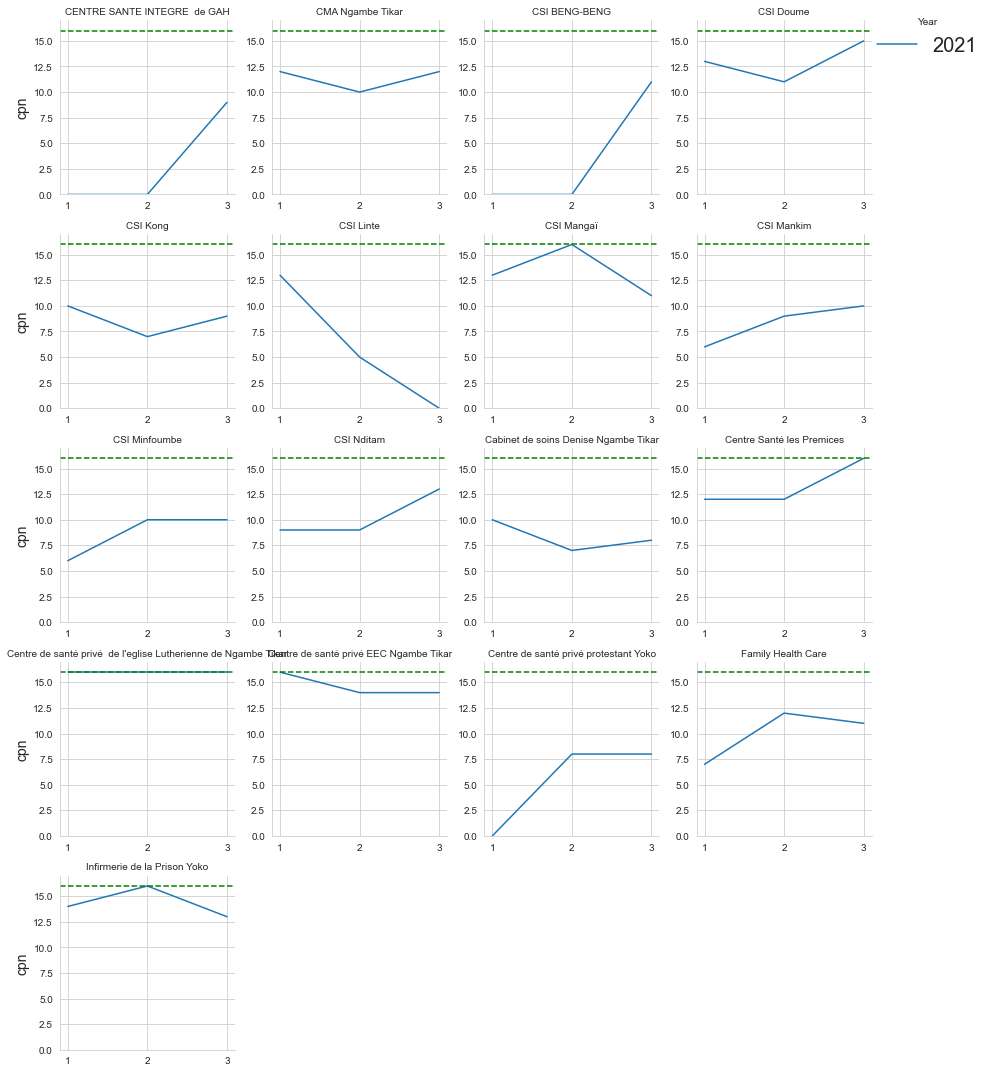

In [103]:
g = sns.FacetGrid(scores_cpn_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,17], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=16)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'cpn', fontsize=14);
g.savefig("images/Performance_evolution/cpn")

In [104]:
scores_vih  = get_dataframe(scores, indicateurs_vih_list, indicateurs_FOSA_periode_list)
scores_vih_to_print = get_dataframe_to_plot(scores_vih)
scores_vih_to_print = get_df_with_trim_and_year(scores_vih_to_print)
scores_vih_to_print 

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    0.0
12                                    CMA Ngambe Tikar    1  2021   13.0
13                                    CMA Ngambe Tikar    2  2021   20.0
14                                    CMA Ngambe Tikar    3  2021   20.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    0.0
36                                           CSI Doume    1  2021   12.0
37                                           CSI Doume    2  2021    6.0
38                                           CSI Doume    3  2021   15.0
48                                            CSI Kong    1  2021   10.0
49                                            CSI Kong    2  2021    5.0
50                                            CSI Kong    3  2021   12.0
60                                           CSI Linte    1  2021   12.0
61                                           CSI Linte    2  2021    0.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021   10.0
73                                          CSI Mangaï    2  2021   13.0
74                                          CSI Mangaï    3  2021   16.0
84                                          CSI Mankim    1  2021   15.0
85                                          CSI Mankim    2  2021   12.0
86                                          CSI Mankim    3  2021   20.0
96                                       CSI Minfoumbe    1  2021   18.0
97                                       CSI Minfoumbe    2  2021   20.0
98                                       CSI Minfoumbe    3  2021   15.0
108                                         CSI Nditam    1  2021   15.0
109                                         CSI Nditam    2  2021   18.0
110                                         CSI Nditam    3  2021   15.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    9.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   10.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    0.0
132                          Centre Santé les Premices    1  2021   15.0
133                          Centre Santé les Premices    2  2021   13.0
134                          Centre Santé les Premices    3  2021   20.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021   12.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021   12.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   12.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021   12.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021    7.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021    4.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021   12.0
170              Centre de santé privé protestant Yoko    3  2021   12.0
180                                 Family Health Care    1  2021    0.0
181                                 Family Health Care    2  2021   10.0
182                                 Family Health Care    3  2021    8.0
192                       Infirmerie de la Prison Yoko    1  2021   13.0
193                       Infirmerie de la Prison Yoko    2  2021   18.0
194                       Infirmerie de la Prison Yoko    3  2021   16.0

In [105]:
scores_vih_to_print_to_print_2 = scores_vih_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_vih_to_print_to_print_2 = scores_vih_to_print_to_print_2.reset_index()
scores_vih_to_print_to_print_2.columns.name = None
scores_vih_to_print_to_print_2['moyenne'] = round((scores_vih_to_print_to_print_2['1'] + scores_vih_to_print_to_print_2['2'] + scores_vih_to_print_to_print_2['3'])/3, 2)
scores_vih_to_print_to_print_2['evolution_2_to_3'] = scores_vih_to_print_to_print_2['3'] - scores_vih_to_print_to_print_2['2']
scores_vih_to_print_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0   0.0   
1                                    CMA Ngambe Tikar  13.0  20.0  20.0   
2                                       CSI BENG-BENG   0.0   0.0   0.0   
3                                           CSI Doume  12.0   6.0  15.0   
4                                            CSI Kong  10.0   5.0  12.0   
5                                           CSI Linte  12.0   0.0   0.0   
6                                          CSI Mangaï  10.0  13.0  16.0   
7                                          CSI Mankim  15.0  12.0  20.0   
8                                       CSI Minfoumbe  18.0  20.0  15.0   
9                                          CSI Nditam  15.0  18.0  15.0   
10               Cabinet de soins Denise Ngambe Tikar   9.0  10.0   0.0   
11                          Centre Santé les Premices  15.0  13.0  20.0   
12  Centre de santé privé  de l'eglise Lutherienne...  12.0  12.0  12.0   
13             Centre de santé privé EEC Ngambe Tikar  12.0   7.0   4.0   
14              Centre de santé privé protestant Yoko   0.0  12.0  12.0   
15                                 Family Health Care   0.0  10.0   8.0   
16                       Infirmerie de la Prison Yoko  13.0  18.0  16.0   

    moyenne  evolution_2_to_3  
0      0.00               0.0  
1     17.67               0.0  
2      0.00               0.0  
3     11.00               9.0  
4      9.00               7.0  
5      4.00               0.0  
6     13.00               3.0  
7     15.67               8.0  
8     17.67              -5.0  
9     16.00              -3.0  
10     6.33             -10.0  
11    16.00               7.0  
12    12.00               0.0  
13     7.67              -3.0  
14     8.00               0.0  
15     6.00              -2.0  
16    15.67              -2.0

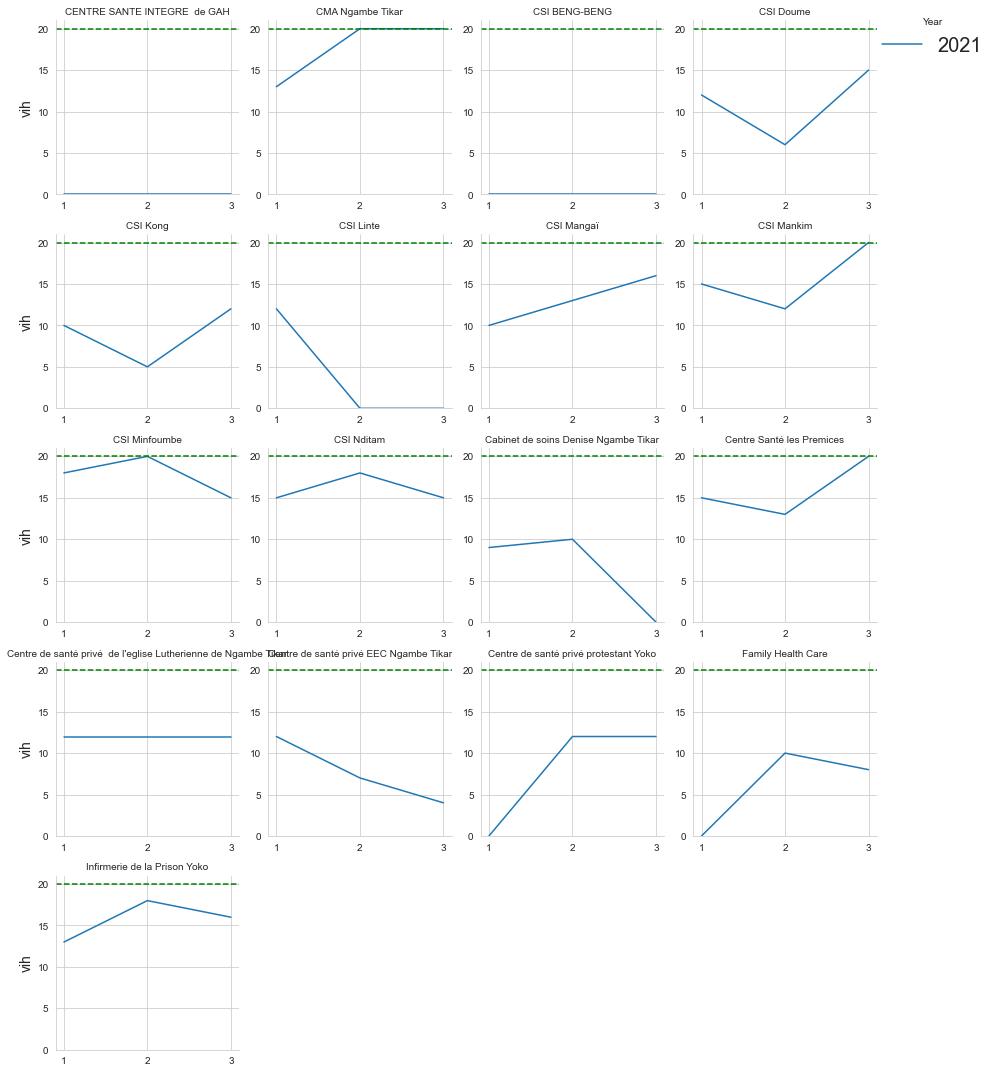

In [106]:
g = sns.FacetGrid(scores_vih_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,21], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=20)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'vih', fontsize=14);
g.savefig("images/Performance_evolution/vih")

In [107]:
scores_pbf_com = get_dataframe(scores, indicateurs_pbf_communautaire_list, indicateurs_FOSA_periode_list)
scores_pbf_com_to_print = get_dataframe_to_plot(scores_pbf_com)
scores_pbf_com_to_print = get_df_with_trim_and_year(scores_pbf_com_to_print)
scores_pbf_com_to_print 

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021    2.0
12                                    CMA Ngambe Tikar    1  2021    7.0
13                                    CMA Ngambe Tikar    2  2021   11.0
14                                    CMA Ngambe Tikar    3  2021    9.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    4.0
36                                           CSI Doume    1  2021   11.0
37                                           CSI Doume    2  2021    6.0
38                                           CSI Doume    3  2021    9.0
48                                            CSI Kong    1  2021    0.0
49                                            CSI Kong    2  2021    2.0
50                                            CSI Kong    3  2021    5.0
60                                           CSI Linte    1  2021   11.0
61                                           CSI Linte    2  2021    4.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    0.0
73                                          CSI Mangaï    2  2021    5.0
74                                          CSI Mangaï    3  2021    7.0
84                                          CSI Mankim    1  2021    5.0
85                                          CSI Mankim    2  2021    5.0
86                                          CSI Mankim    3  2021    5.0
96                                       CSI Minfoumbe    1  2021    6.0
97                                       CSI Minfoumbe    2  2021    9.0
98                                       CSI Minfoumbe    3  2021    9.0
108                                         CSI Nditam    1  2021    9.0
109                                         CSI Nditam    2  2021    5.0
110                                         CSI Nditam    3  2021    7.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    5.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021   13.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    5.0
132                          Centre Santé les Premices    1  2021    6.0
133                          Centre Santé les Premices    2  2021    6.0
134                          Centre Santé les Premices    3  2021   11.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021    5.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021    5.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   11.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021    5.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021    5.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021    5.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    3.0
170              Centre de santé privé protestant Yoko    3  2021    0.0
180                                 Family Health Care    1  2021    7.0
181                                 Family Health Care    2  2021    9.0
182                                 Family Health Care    3  2021    5.0
192                       Infirmerie de la Prison Yoko    1  2021    5.0
193                       Infirmerie de la Prison Yoko    2  2021    5.0
194                       Infirmerie de la Prison Yoko    3  2021   11.0

In [108]:
scores_pbf_com_to_print_2 = scores_pbf_com_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_pbf_com_to_print_2 = scores_pbf_com_to_print_2.reset_index()
scores_pbf_com_to_print_2.columns.name = None
scores_pbf_com_to_print_2['moyenne'] = round((scores_pbf_com_to_print_2['1'] + scores_pbf_com_to_print_2['2'] + scores_pbf_com_to_print_2['3'])/3, 2)
scores_pbf_com_to_print_2['evolution_2_to_3'] = scores_pbf_com_to_print_2['3'] - scores_pbf_com_to_print_2['2']
scores_pbf_com_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0   2.0   
1                                    CMA Ngambe Tikar   7.0  11.0   9.0   
2                                       CSI BENG-BENG   0.0   0.0   4.0   
3                                           CSI Doume  11.0   6.0   9.0   
4                                            CSI Kong   0.0   2.0   5.0   
5                                           CSI Linte  11.0   4.0   0.0   
6                                          CSI Mangaï   0.0   5.0   7.0   
7                                          CSI Mankim   5.0   5.0   5.0   
8                                       CSI Minfoumbe   6.0   9.0   9.0   
9                                          CSI Nditam   9.0   5.0   7.0   
10               Cabinet de soins Denise Ngambe Tikar   5.0  13.0   5.0   
11                          Centre Santé les Premices   6.0   6.0  11.0   
12  Centre de santé privé  de l'eglise Lutherienne...   5.0   5.0  11.0   
13             Centre de santé privé EEC Ngambe Tikar   5.0   5.0   5.0   
14              Centre de santé privé protestant Yoko   0.0   3.0   0.0   
15                                 Family Health Care   7.0   9.0   5.0   
16                       Infirmerie de la Prison Yoko   5.0   5.0  11.0   

    moyenne  evolution_2_to_3  
0      0.67               2.0  
1      9.00              -2.0  
2      1.33               4.0  
3      8.67               3.0  
4      2.33               3.0  
5      5.00              -4.0  
6      4.00               2.0  
7      5.00               0.0  
8      8.00               0.0  
9      7.00               2.0  
10     7.67              -8.0  
11     7.67               5.0  
12     7.00               6.0  
13     5.00               0.0  
14     1.00              -3.0  
15     7.00              -4.0  
16     7.00               6.0

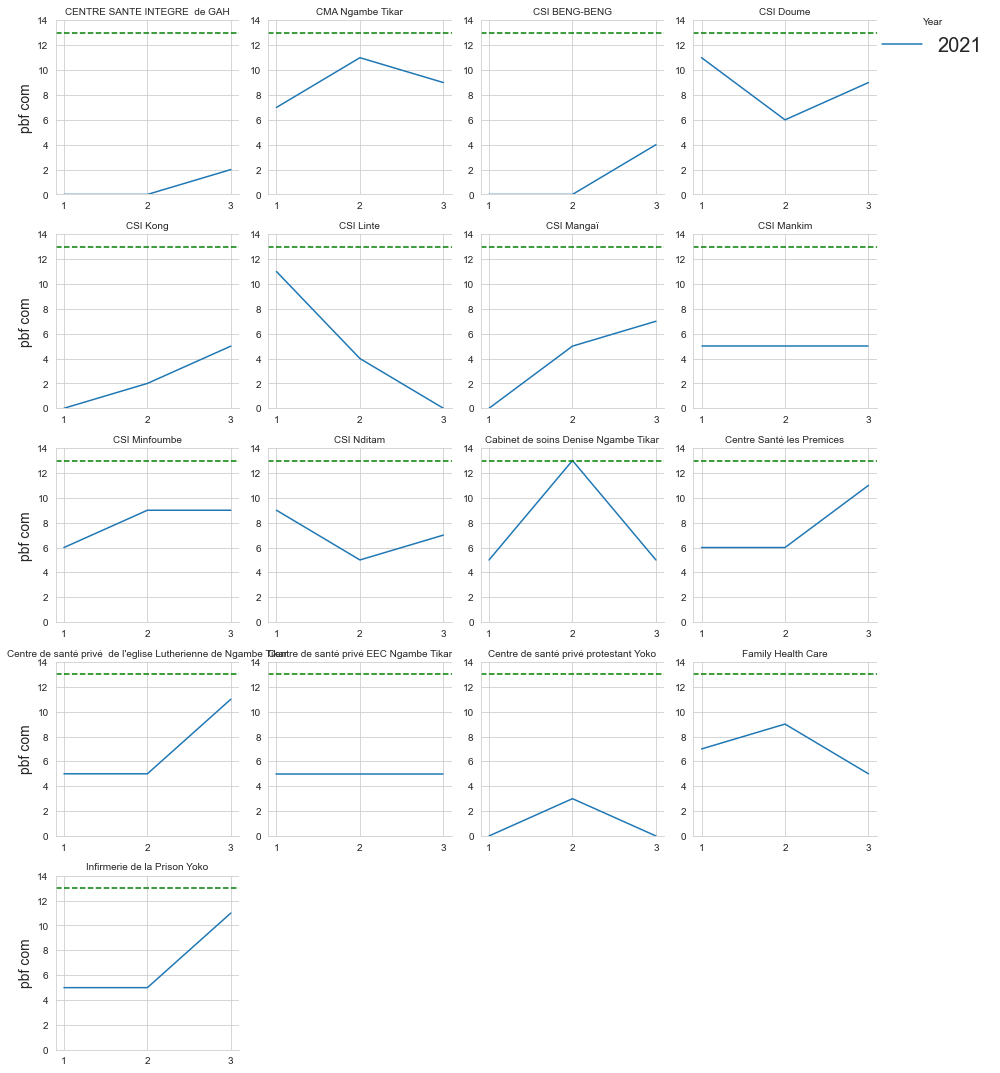

In [109]:
g = sns.FacetGrid(scores_pbf_com_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,14], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=13)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'pbf com', fontsize=14);
g.savefig("images/Performance_evolution/pbf_com")

In [110]:
scores_etat_civil = get_dataframe(scores, indicateurs_etat_civil_list, indicateurs_FOSA_periode_list)
scores_etat_civil_to_print = get_dataframe_to_plot(scores_etat_civil)
scores_etat_civil_to_print = get_df_with_trim_and_year(scores_etat_civil_to_print)
scores_etat_civil_to_print 

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021   10.0
12                                    CMA Ngambe Tikar    1  2021   10.0
13                                    CMA Ngambe Tikar    2  2021   10.0
14                                    CMA Ngambe Tikar    3  2021   15.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021    5.0
36                                           CSI Doume    1  2021    0.0
37                                           CSI Doume    2  2021    5.0
38                                           CSI Doume    3  2021    0.0
48                                            CSI Kong    1  2021    0.0
49                                            CSI Kong    2  2021    0.0
50                                            CSI Kong    3  2021    0.0
60                                           CSI Linte    1  2021    5.0
61                                           CSI Linte    2  2021    5.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021    0.0
73                                          CSI Mangaï    2  2021    5.0
74                                          CSI Mangaï    3  2021    0.0
84                                          CSI Mankim    1  2021    0.0
85                                          CSI Mankim    2  2021    5.0
86                                          CSI Mankim    3  2021    0.0
96                                       CSI Minfoumbe    1  2021    5.0
97                                       CSI Minfoumbe    2  2021    5.0
98                                       CSI Minfoumbe    3  2021    0.0
108                                         CSI Nditam    1  2021    5.0
109                                         CSI Nditam    2  2021    0.0
110                                         CSI Nditam    3  2021   10.0
120               Cabinet de soins Denise Ngambe Tikar    1  2021    0.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021    5.0
122               Cabinet de soins Denise Ngambe Tikar    3  2021    5.0
132                          Centre Santé les Premices    1  2021    0.0
133                          Centre Santé les Premices    2  2021    5.0
134                          Centre Santé les Premices    3  2021    0.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021    0.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021    0.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021   10.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021    5.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021    5.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021    5.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021    5.0
170              Centre de santé privé protestant Yoko    3  2021    5.0
180                                 Family Health Care    1  2021    0.0
181                                 Family Health Care    2  2021   10.0
182                                 Family Health Care    3  2021    5.0
192                       Infirmerie de la Prison Yoko    1  2021    0.0
193                       Infirmerie de la Prison Yoko    2  2021    5.0
194                       Infirmerie de la Prison Yoko    3  2021    0.0

In [111]:
scores_etat_civil_to_print_2 = scores_etat_civil_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_etat_civil_to_print_2 = scores_etat_civil_to_print_2.reset_index()
scores_etat_civil_to_print_2.columns.name = None
scores_etat_civil_to_print_2['moyenne'] = round((scores_etat_civil_to_print_2['1'] + scores_etat_civil_to_print_2['2'] + scores_etat_civil_to_print_2['3'])/3, 2)
scores_etat_civil_to_print_2['evolution_2_to_3'] = scores_etat_civil_to_print_2['3'] - scores_etat_civil_to_print_2['2']
scores_etat_civil_to_print_2

FOSA     1     2     3  \
0                        CENTRE SANTE INTEGRE  de GAH   0.0   0.0  10.0   
1                                    CMA Ngambe Tikar  10.0  10.0  15.0   
2                                       CSI BENG-BENG   0.0   0.0   5.0   
3                                           CSI Doume   0.0   5.0   0.0   
4                                            CSI Kong   0.0   0.0   0.0   
5                                           CSI Linte   5.0   5.0   0.0   
6                                          CSI Mangaï   0.0   5.0   0.0   
7                                          CSI Mankim   0.0   5.0   0.0   
8                                       CSI Minfoumbe   5.0   5.0   0.0   
9                                          CSI Nditam   5.0   0.0  10.0   
10               Cabinet de soins Denise Ngambe Tikar   0.0   5.0   5.0   
11                          Centre Santé les Premices   0.0   5.0   0.0   
12  Centre de santé privé  de l'eglise Lutherienne...   0.0   0.0  10.0   
13             Centre de santé privé EEC Ngambe Tikar   5.0   5.0   5.0   
14              Centre de santé privé protestant Yoko   0.0   5.0   5.0   
15                                 Family Health Care   0.0  10.0   5.0   
16                       Infirmerie de la Prison Yoko   0.0   5.0   0.0   

    moyenne  evolution_2_to_3  
0      3.33              10.0  
1     11.67               5.0  
2      1.67               5.0  
3      1.67              -5.0  
4      0.00               0.0  
5      3.33              -5.0  
6      1.67              -5.0  
7      1.67              -5.0  
8      3.33              -5.0  
9      5.00              10.0  
10     3.33               0.0  
11     1.67              -5.0  
12     3.33              10.0  
13     5.00               0.0  
14     3.33               0.0  
15     5.00              -5.0  
16     1.67              -5.0

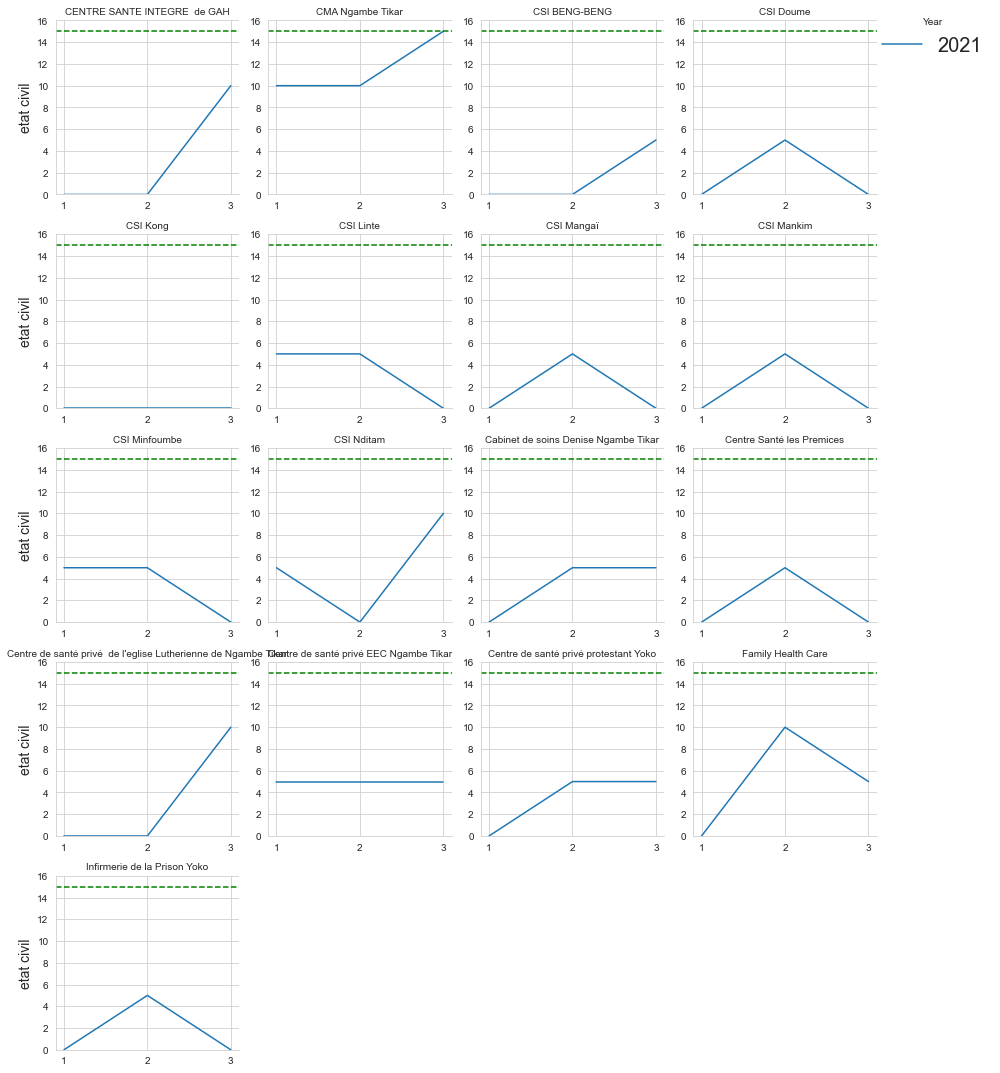

In [112]:
g = sns.FacetGrid(scores_etat_civil_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,16], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=15)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'etat civil', fontsize=14);
g.savefig("images/Performance_evolution/etat_civil")

In [113]:
scores_total = get_dataframe(scores, indicateurs_all_cat_list, indicateurs_FOSA_periode_list)
scores_total_to_print = get_dataframe_to_plot(scores_total)
scores_total_to_print = get_df_with_trim_and_year(scores_total_to_print)
scores_total_to_print 

FOSA Trim  Year  score
0                         CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1                         CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2                         CENTRE SANTE INTEGRE  de GAH    3  2021  188.0
12                                    CMA Ngambe Tikar    1  2021  230.0
13                                    CMA Ngambe Tikar    2  2021  252.0
14                                    CMA Ngambe Tikar    3  2021  244.0
24                                       CSI BENG-BENG    1  2021    0.0
25                                       CSI BENG-BENG    2  2021    0.0
26                                       CSI BENG-BENG    3  2021  167.0
36                                           CSI Doume    1  2021  165.0
37                                           CSI Doume    2  2021  167.0
38                                           CSI Doume    3  2021  216.5
48                                            CSI Kong    1  2021  133.5
49                                            CSI Kong    2  2021  167.5
50                                            CSI Kong    3  2021  201.5
60                                           CSI Linte    1  2021  214.0
61                                           CSI Linte    2  2021  108.0
62                                           CSI Linte    3  2021    0.0
72                                          CSI Mangaï    1  2021  188.5
73                                          CSI Mangaï    2  2021  217.0
74                                          CSI Mangaï    3  2021  203.0
84                                          CSI Mankim    1  2021  168.5
85                                          CSI Mankim    2  2021  177.0
86                                          CSI Mankim    3  2021  200.5
96                                       CSI Minfoumbe    1  2021  193.5
97                                       CSI Minfoumbe    2  2021  203.5
98                                       CSI Minfoumbe    3  2021  189.0
108                                         CSI Nditam    1  2021  229.5
109                                         CSI Nditam    2  2021  186.0
110                                         CSI Nditam    3  2021  212.5
120               Cabinet de soins Denise Ngambe Tikar    1  2021  167.0
121               Cabinet de soins Denise Ngambe Tikar    2  2021  185.5
122               Cabinet de soins Denise Ngambe Tikar    3  2021  154.5
132                          Centre Santé les Premices    1  2021  201.5
133                          Centre Santé les Premices    2  2021  217.0
134                          Centre Santé les Premices    3  2021  240.0
144  Centre de santé privé  de l'eglise Lutherienne...    1  2021  228.0
145  Centre de santé privé  de l'eglise Lutherienne...    2  2021  225.0
146  Centre de santé privé  de l'eglise Lutherienne...    3  2021  233.0
156             Centre de santé privé EEC Ngambe Tikar    1  2021  219.0
157             Centre de santé privé EEC Ngambe Tikar    2  2021  206.0
158             Centre de santé privé EEC Ngambe Tikar    3  2021  204.0
168              Centre de santé privé protestant Yoko    1  2021    0.0
169              Centre de santé privé protestant Yoko    2  2021  197.0
170              Centre de santé privé protestant Yoko    3  2021  194.0
180                                 Family Health Care    1  2021  188.0
181                                 Family Health Care    2  2021  227.0
182                                 Family Health Care    3  2021  176.0
192                       Infirmerie de la Prison Yoko    1  2021  186.0
193                       Infirmerie de la Prison Yoko    2  2021  185.0
194                       Infirmerie de la Prison Yoko    3  2021  185.0

In [114]:
scores_total_to_print_2 = scores_total_to_print.pivot(index="FOSA", columns="Trim", values="score")
scores_total_to_print_2 = scores_total_to_print_2.reset_index()
scores_total_to_print_2.columns.name = None
scores_total_to_print_2['moyenne'] = round((scores_total_to_print_2['1'] + scores_total_to_print_2['2'] + scores_total_to_print_2['3'])/3, 2)
scores_total_to_print_2['evolution_2_to_3'] = scores_total_to_print_2['3'] - scores_total_to_print_2['2']
scores_total_to_print_2

FOSA      1      2      3  \
0                        CENTRE SANTE INTEGRE  de GAH    0.0    0.0  188.0   
1                                    CMA Ngambe Tikar  230.0  252.0  244.0   
2                                       CSI BENG-BENG    0.0    0.0  167.0   
3                                           CSI Doume  165.0  167.0  216.5   
4                                            CSI Kong  133.5  167.5  201.5   
5                                           CSI Linte  214.0  108.0    0.0   
6                                          CSI Mangaï  188.5  217.0  203.0   
7                                          CSI Mankim  168.5  177.0  200.5   
8                                       CSI Minfoumbe  193.5  203.5  189.0   
9                                          CSI Nditam  229.5  186.0  212.5   
10               Cabinet de soins Denise Ngambe Tikar  167.0  185.5  154.5   
11                          Centre Santé les Premices  201.5  217.0  240.0   
12  Centre de santé privé  de l'eglise Lutherienne...  228.0  225.0  233.0   
13             Centre de santé privé EEC Ngambe Tikar  219.0  206.0  204.0   
14              Centre de santé privé protestant Yoko    0.0  197.0  194.0   
15                                 Family Health Care  188.0  227.0  176.0   
16                       Infirmerie de la Prison Yoko  186.0  185.0  185.0   

    moyenne  evolution_2_to_3  
0     62.67             188.0  
1    242.00              -8.0  
2     55.67             167.0  
3    182.83              49.5  
4    167.50              34.0  
5    107.33            -108.0  
6    202.83             -14.0  
7    182.00              23.5  
8    195.33             -14.5  
9    209.33              26.5  
10   169.00             -31.0  
11   219.50              23.0  
12   228.67               8.0  
13   209.67              -2.0  
14   130.33              -3.0  
15   197.00             -51.0  
16   185.33               0.0

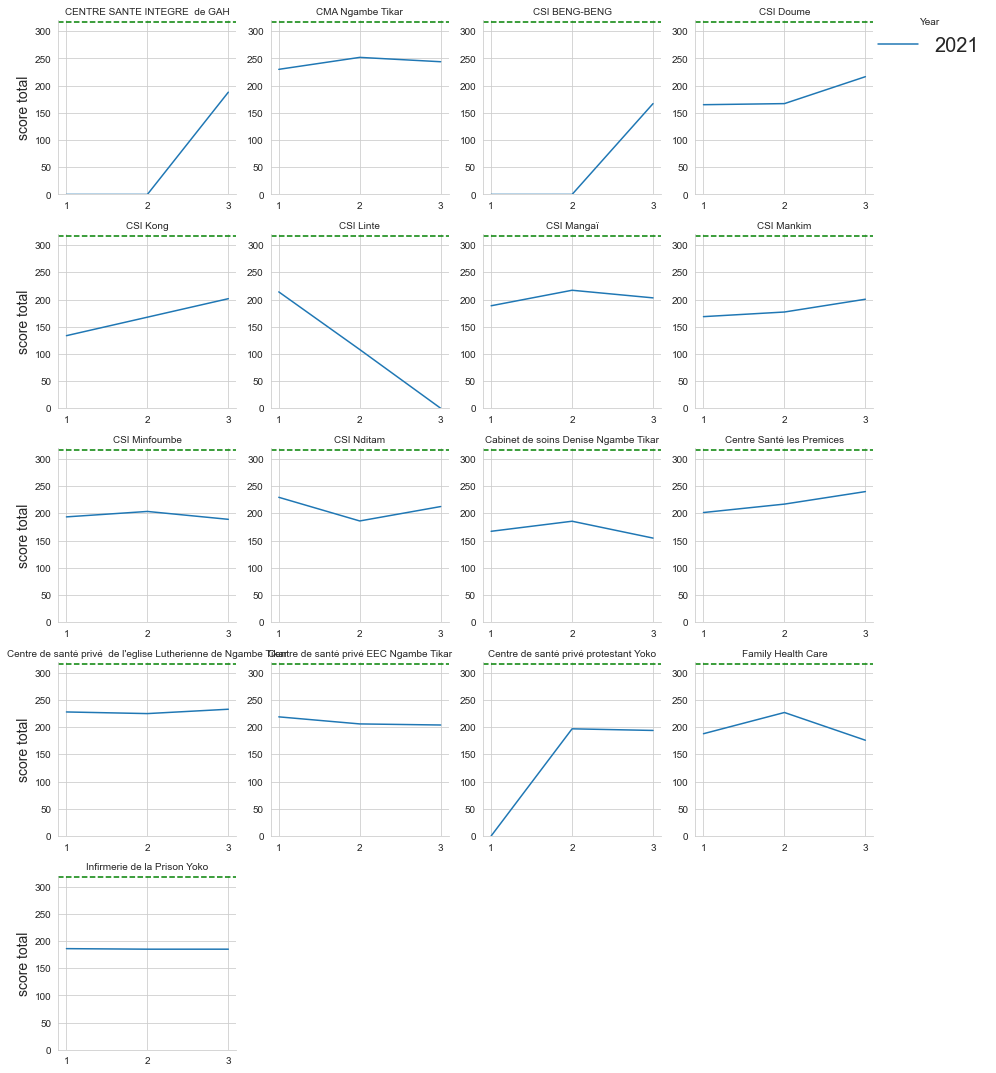

In [115]:
g = sns.FacetGrid(scores_total_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,320], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=317)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score total', fontsize=14);
g.savefig("images/Performance_evolution/total")

In [116]:
# list des scores des différentes catégories
scores_list = [scores_business_plan_to_print, scores_consultation_externe_to_print, scores_cpn_to_print, 
               scores_etat_civil_to_print, scores_finances_to_print, scores_gest_med_to_print, 
               scores_hospitalisation_to_print, scores_hygiene_to_print, scores_indicateurs_generaux_to_print, 
               scores_labo_to_print, scores_malnutrition_to_print, scores_maternite_to_print, scores_med_traceurs_to_print, 
               scores_pbf_com_to_print, scores_petite_chirurgie_to_print, scores_planning_familial_to_print, 
               scores_vaccination_to_print, scores_vih_to_print, scores_total_to_print]

In [117]:
scores_max_list = [10, 40, 16, 15, 8, 15, 10, 22, 20, 10, 16, 33,15,13, 5,25,24,20, 317]

In [118]:
indicateurs_list = ["business plan", "cs ext", "cpn", "etat civil", "finances", "gestion med", "hospitalisation",  
                    "hygiène", "indicateurs généraux",   "laboratoire", "malnutrition", "maternite", "med traceurs", 
                    "pbf communautaire", "petite chirurgie", "planning familial", "vaccination", "vih", "TOTAL"]

In [119]:
zipped = zip(scores_list, scores_max_list, indicateurs_list)
list_zipped = list(zipped)

In [120]:
dataframes = []
for i in list_zipped:
    df = i[0]
    score_max = i[1]
    name = i[2]
    bool = (df["Year"] == "2021") & (df["Trim"] == "3")
    df = df[bool]
    m = df["score"].mean(skipna=True)
    df = df.drop(["Trim", "Year"], axis = 1)
    dataframes.append((name, m, score_max, df))

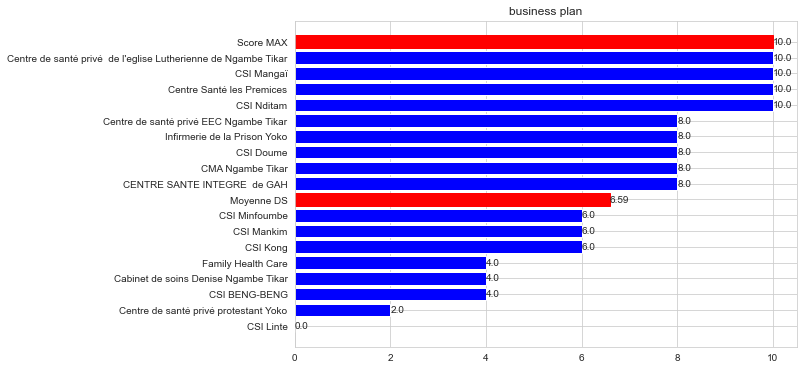

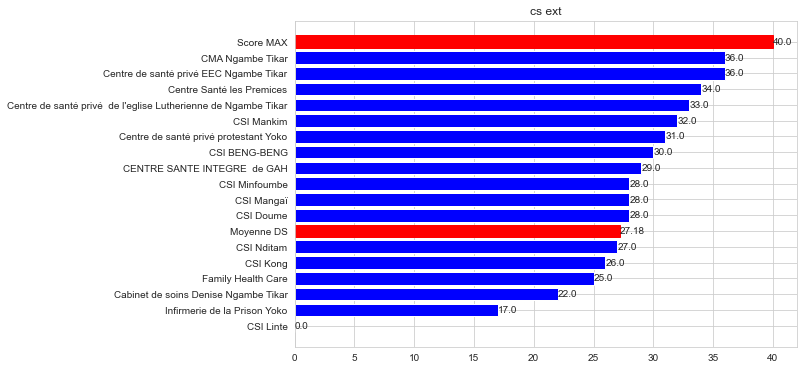

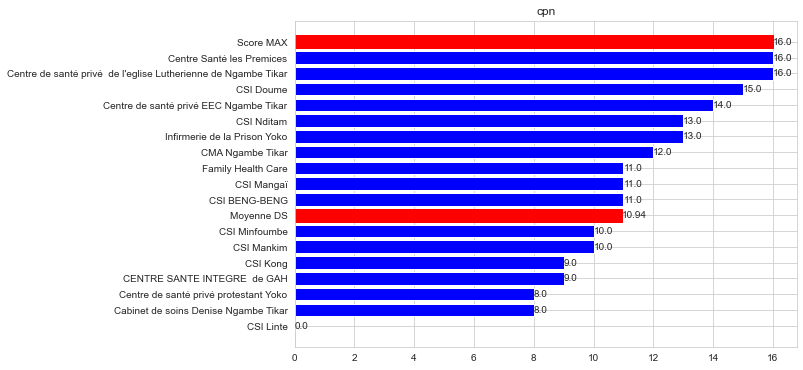

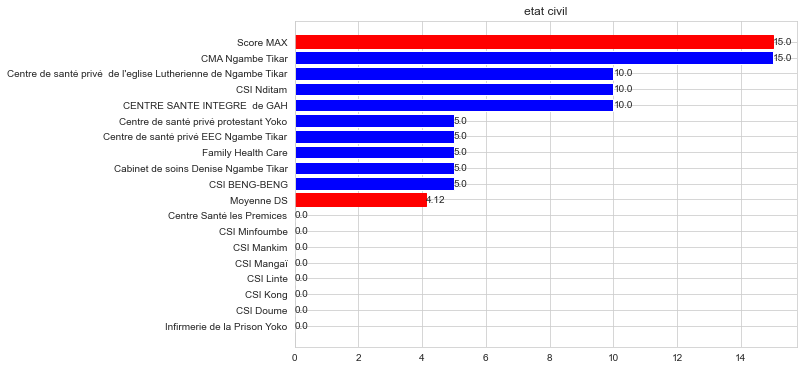

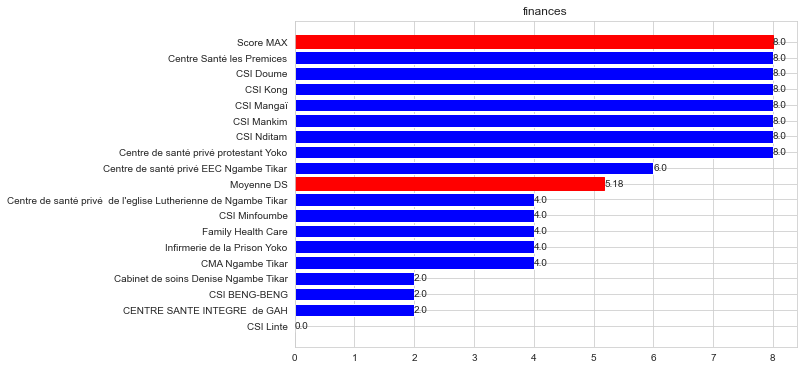

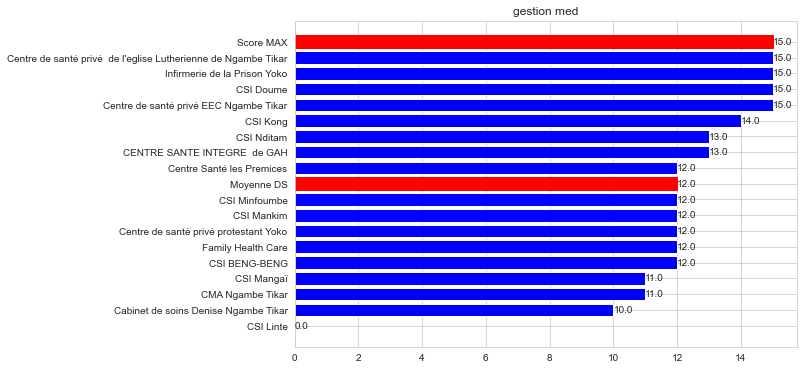

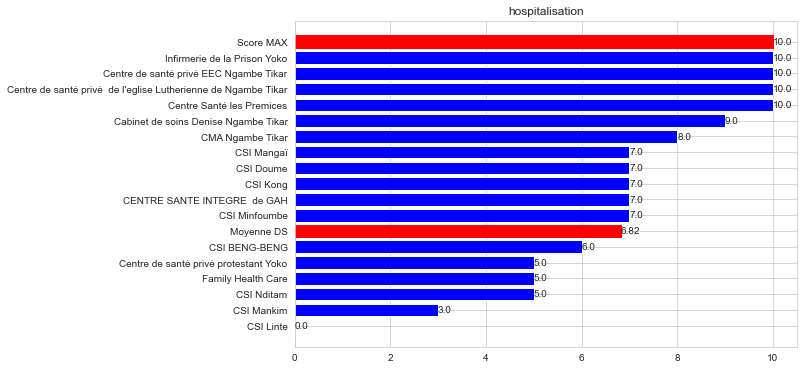

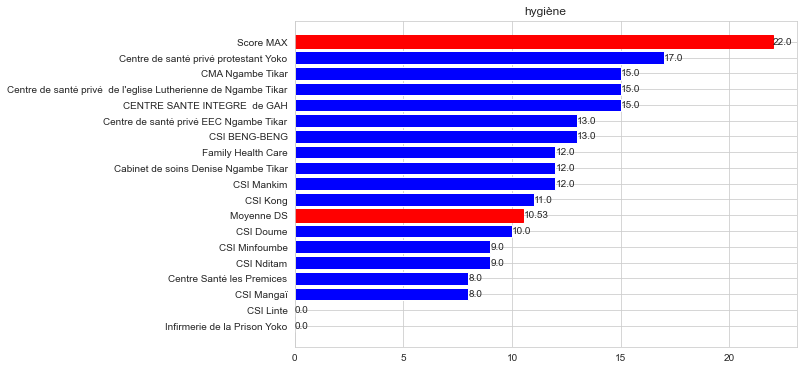

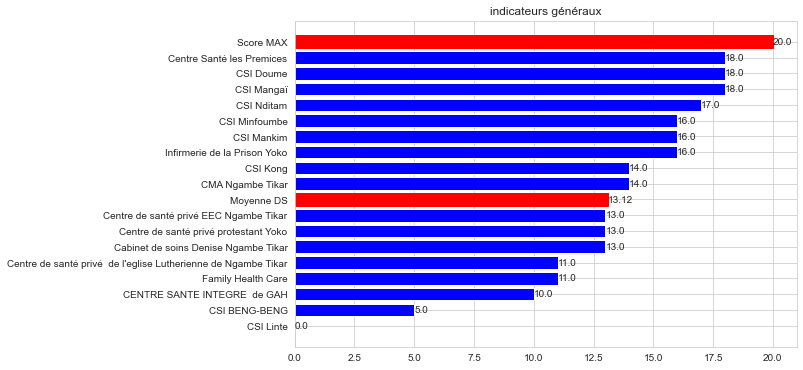

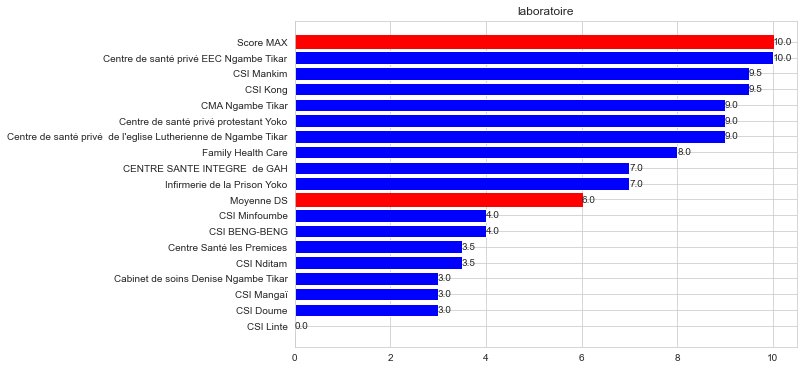

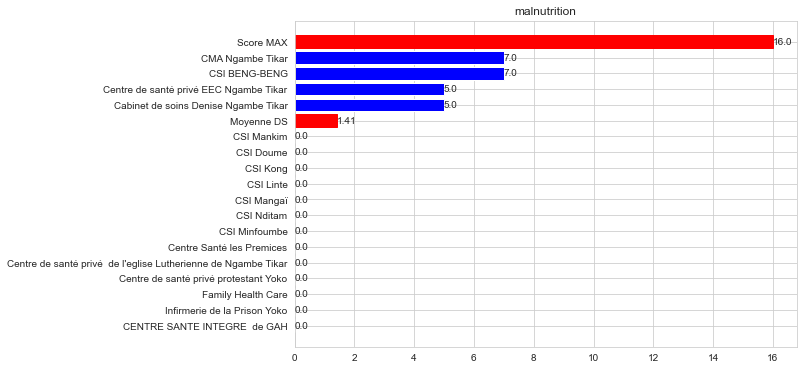

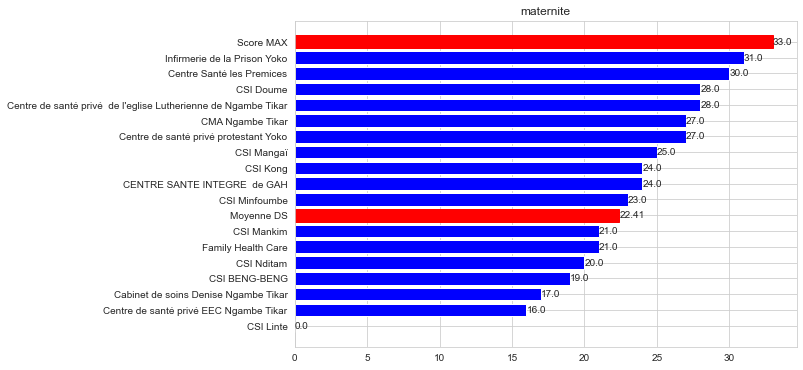

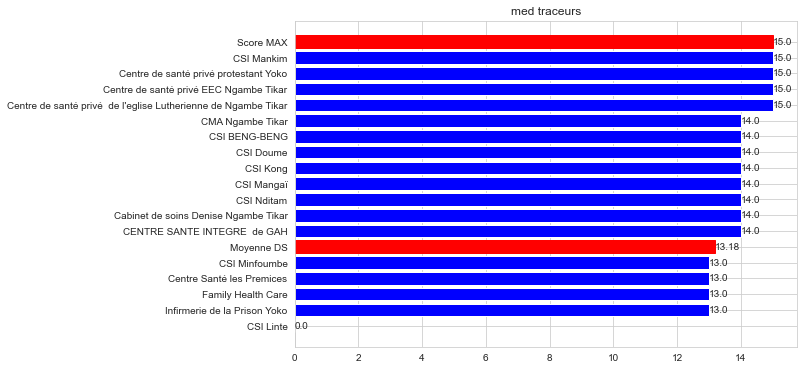

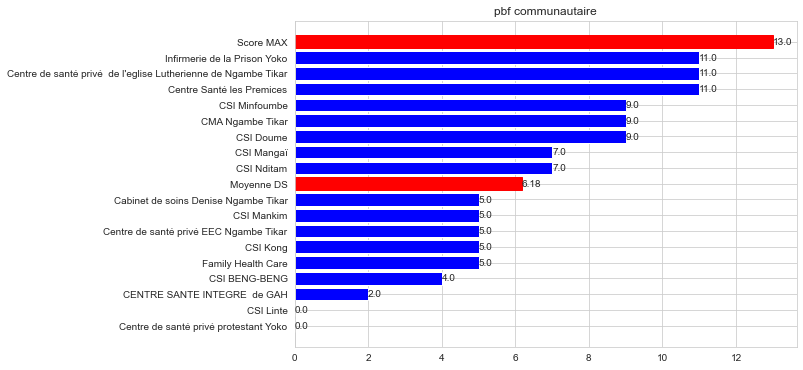

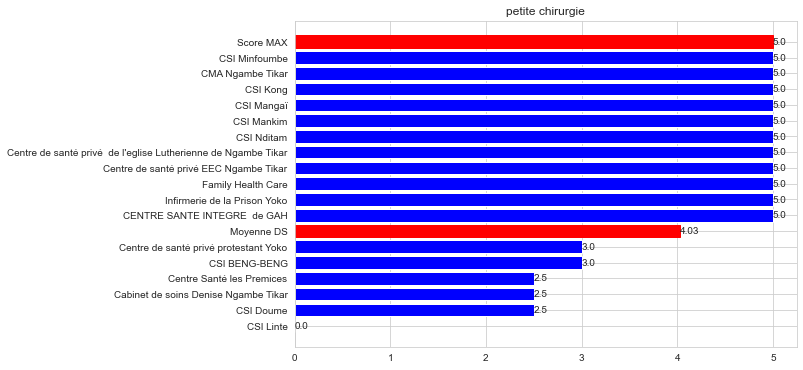

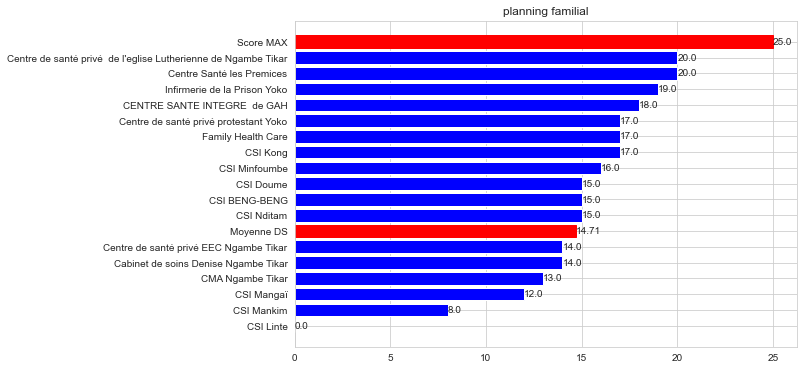

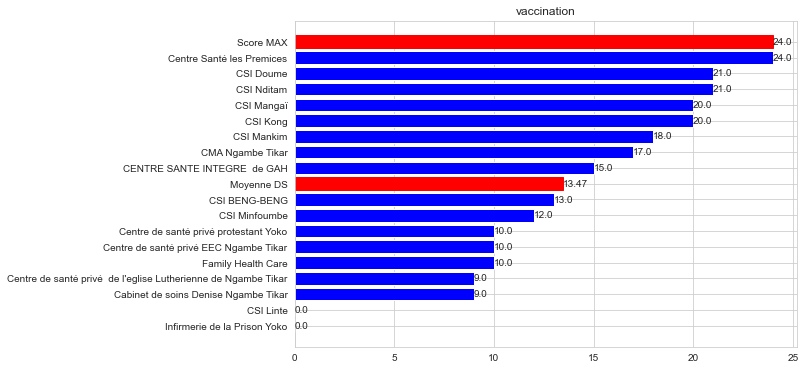

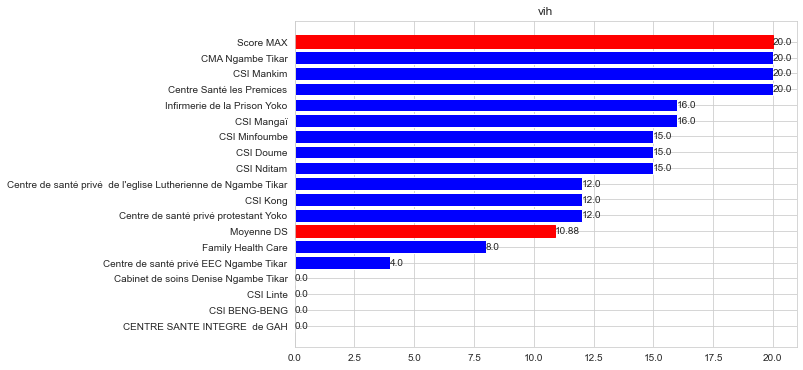

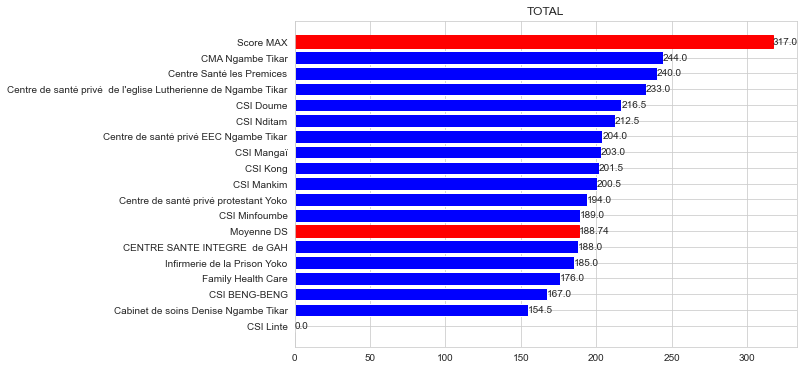

In [121]:
for row in dataframes:
    name = row[0]
    m = row[1]
    score_max = row[2]
    df = row[3]
        
    df = df.append([{"FOSA": "Moyenne DS", "score":np.round(m,2)}, {"FOSA": "Score MAX", "score":score_max}], ignore_index=True)
    df.sort_values("score", inplace=True)
    df.reset_index(drop=True, inplace=True)
        
    fig = plt.figure(figsize=(9,6))
    ax = plt.subplot(111)
    ret = ax.barh(df["FOSA"], df["score"], color="blue") 
        
    ind_moyen_score = df[df["FOSA"] == "Moyenne DS"].index[0].astype(np.int32)
    ind_max_score = df[df["FOSA"] == "Score MAX"].index[0].astype(np.int32)
        
    ret[ind_moyen_score].set_color("red")
    ret[ind_max_score].set_color("red")
        
    for pY, pX in enumerate(df["score"]):
        ax.annotate("{:,}".format(pX), xy=(pX,pY), va="center")
    plt.title(name)
    plt.savefig("images/Ranking/ranking_" + name)
    plt.savefig("images/Ranking/svg/ranking_" + name + ".svg")
    plt.show()

In [122]:
#for n in range(0, 7):
#    globals()['strg%s_2' % n] = 'Hello'

In [123]:
#for i in range(10):
#    globals()[f'x{i}'] = i

In [124]:
#print(x2)

In [125]:
#print(x9)

In [126]:
scores_pbf_com = get_dataframe(scores, indicateurs_pbf_communautaire_list, indicateurs_FOSA_periode_list)
scores_pbf_com_to_print = get_dataframe_to_plot(scores_pbf_com)
scores_pbf_com_to_print = get_df_with_trim_and_year(scores_pbf_com_to_print)
#scores_pbf_com_to_print 

In [127]:
scores_total = get_dataframe(scores, indicateurs_all_cat_list, indicateurs_FOSA_periode_list)
scores_total_to_print = get_dataframe_to_plot(scores_total)
scores_total_to_print = get_df_with_trim_and_year(scores_total_to_print)
#scores_total_to_print 

In [128]:
indicateurs_name_list = ["pbf_com",  "business plan", "cs ext", "cpn", "etat civil", "finances", "gestion med", 
                         "hospitalisation", "hygiène", "indicateurs généraux", "laboratoire", "malnutrition", 
                         "maternite", "med traceurs", "petite chirurgie", "planning familial", "vaccination",
                         "vih", "total"]

In [129]:
#indicateurs_name_list = ["business plan_", "cs ext", "cpn", "etat civil", "finances", "gestion med", "hospitalisation",  
#                    "hygiène", "indicateurs généraux",   "laboratoire", "malnutrition", "maternite", "med traceurs", 
#                    "pbf communautaire", "petite chirurgie", "planning familial", "vaccination", "vih", "TOTAL"]

In [130]:
categories_list = [indicateurs_pbf_communautaire_list,  indicateurs_business_plan_trimestriel_list, 
                   indicateurs_cs_externe_list, indicateurs_cpn_list, indicateurs_etat_civil_list, 
                   indicateurs_partie_financière_list, indicateurs_gest_med_list, indicateurs_hospi_list, 
                   indicateurs_hygiene_sterilisation_list, indicateurs_generaux_list, indicateurs_labo_list,
                   indicateurs_malnutrition_list, indicateurs_maternite_list, indicateurs_med_traceurs_list,
                   indicateurs_petite_chirurgie_list, indicateurs_pf_list, indicateurs_vaccinations_list,
                   indicateurs_vih_list, indicateurs_all_cat_list,]

In [131]:
#categories_list = [indicateurs_business_plan_trimestriel_list_ , indicateurs_cs_externe_list_, indicateurs_cpn_list , indicateurs_etat_civil_list , indicateurs_partie_financière_list, indicateurs_gest_med_list, indicateurs_hospi_list, indicateurs_hygiene_sterilisation_list, indicateurs_generaux_list  , indicateurs_labo_list , indicateurs_malnutrition_list , indicateurs_maternite_list , indicateurs_med_traceurs_list , indicateurs_pbf_communautaire_list , indicateurs_petite_chirurgie_list , indicateurs_pf_list , indicateurs_vaccinations_list , indicateurs_vih_list, indicateurs_all_cat_list]

In [132]:
score_max_list = [13, 10, 40, 16, 15, 8, 15, 10, 22, 20, 10, 16, 33, 15, 5, 25, 24, 20, 317]

In [133]:
#score_max_list = [10_, 40_, 16_, 15_, 8_, 15_, 10_, 22_, 20_, 10_, 16_, 33_,15_,13_, 5_,25_,24,20, 317]

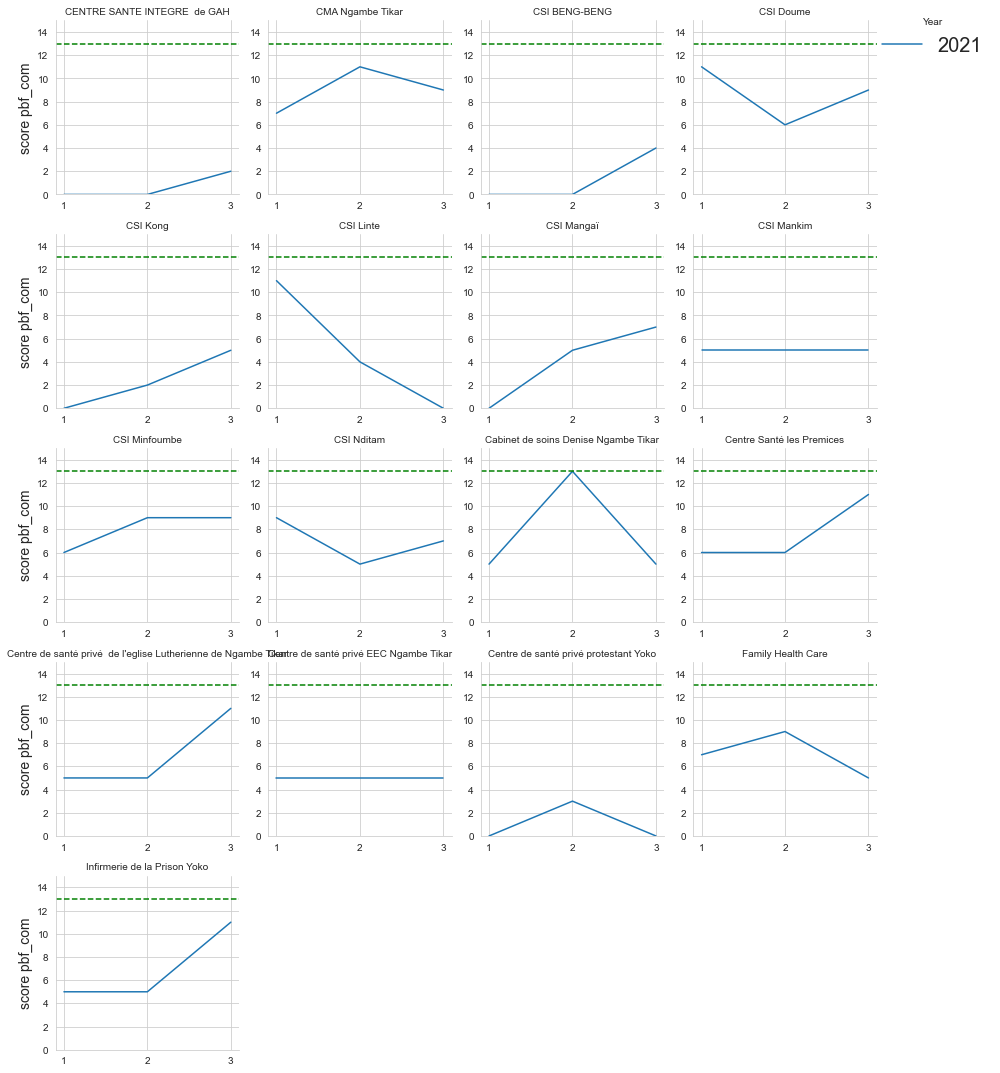

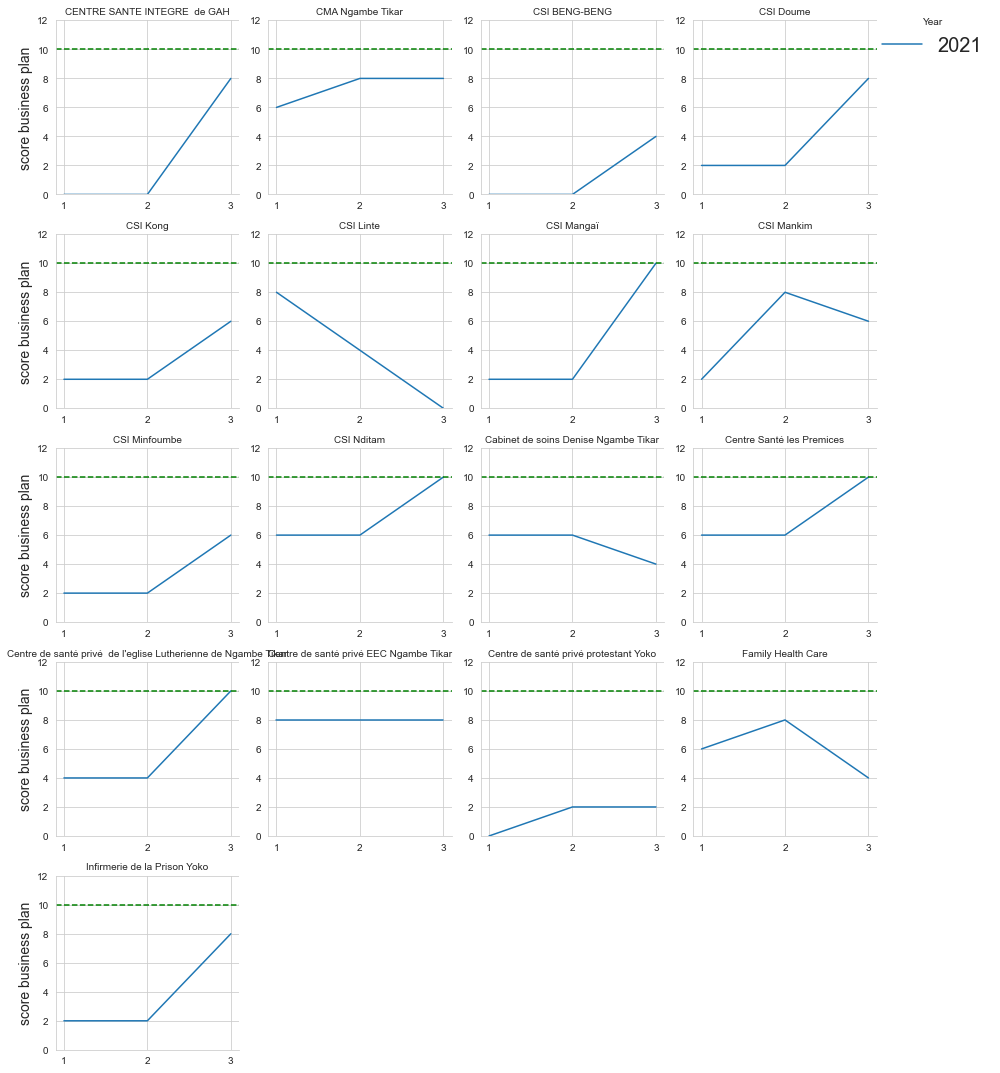

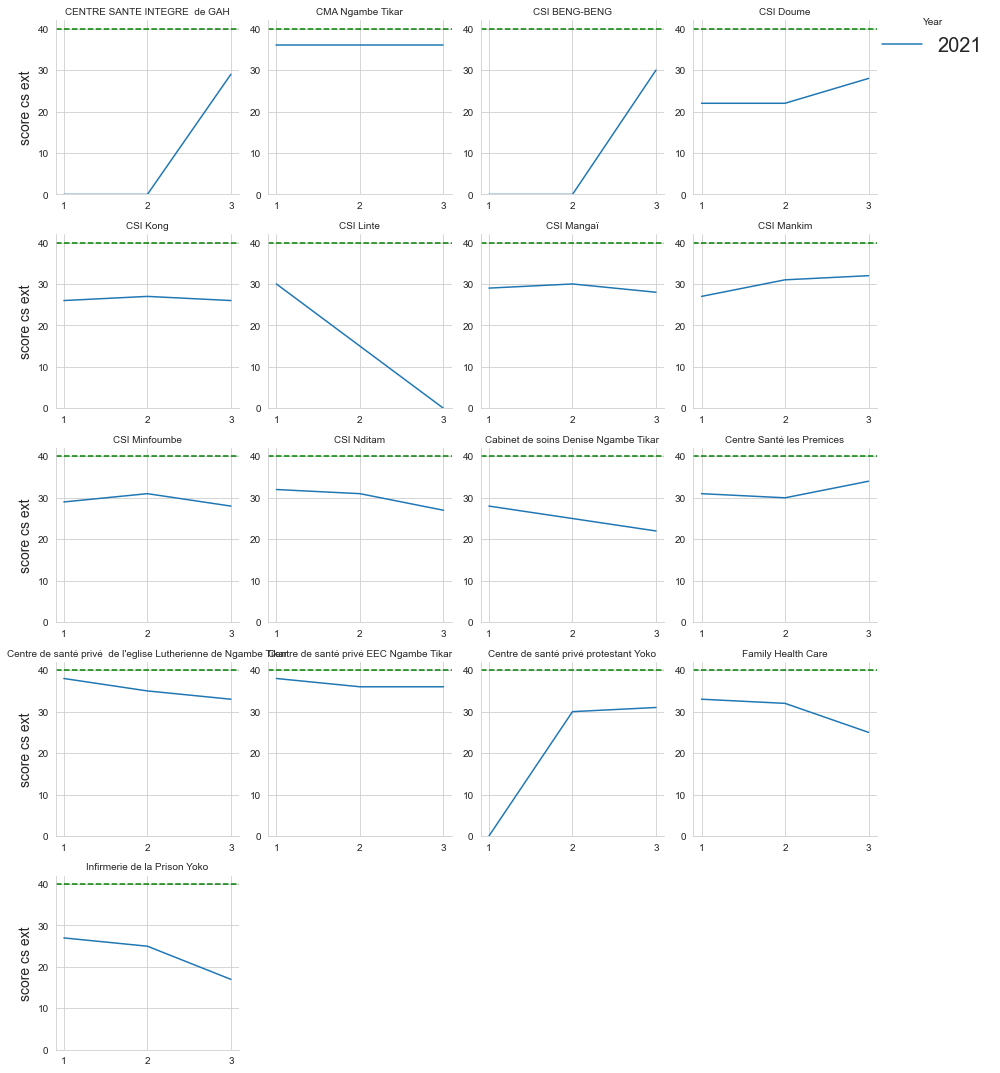

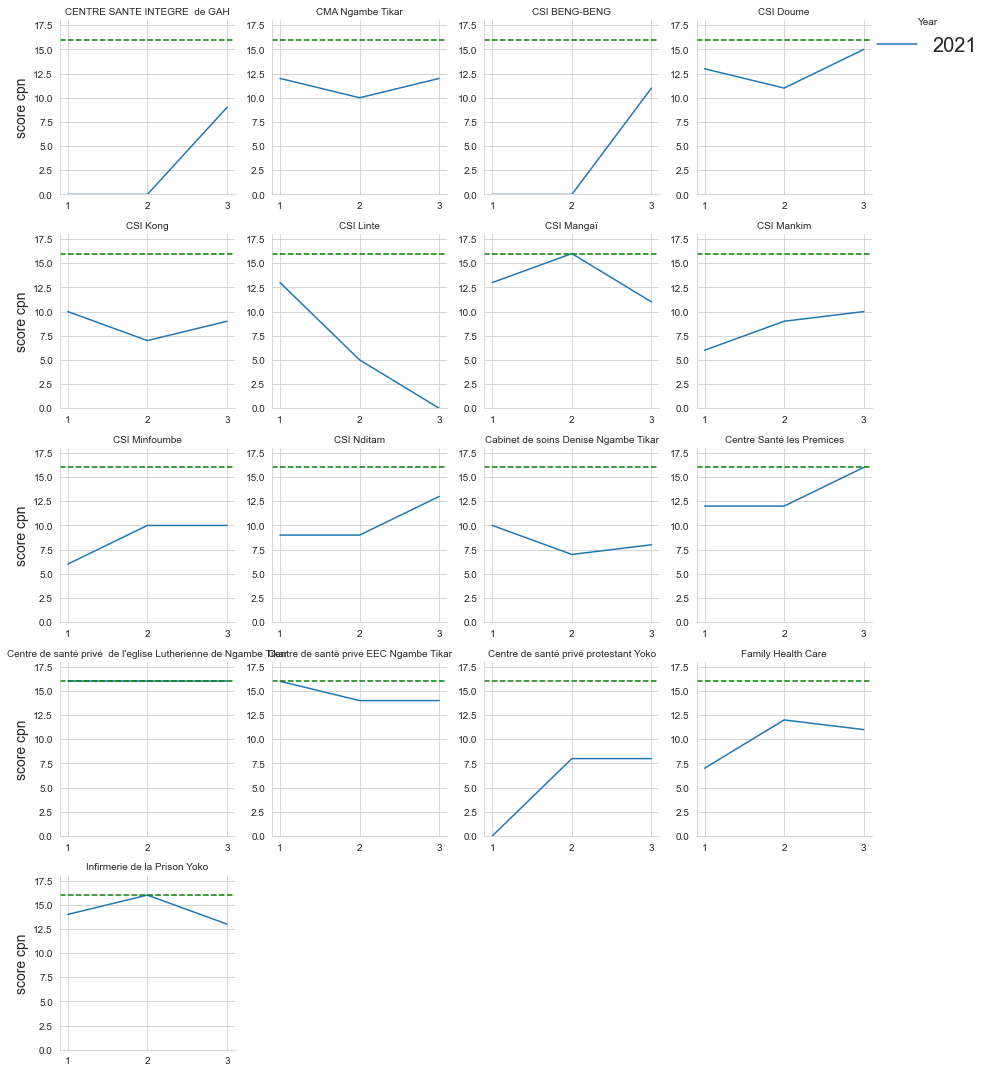

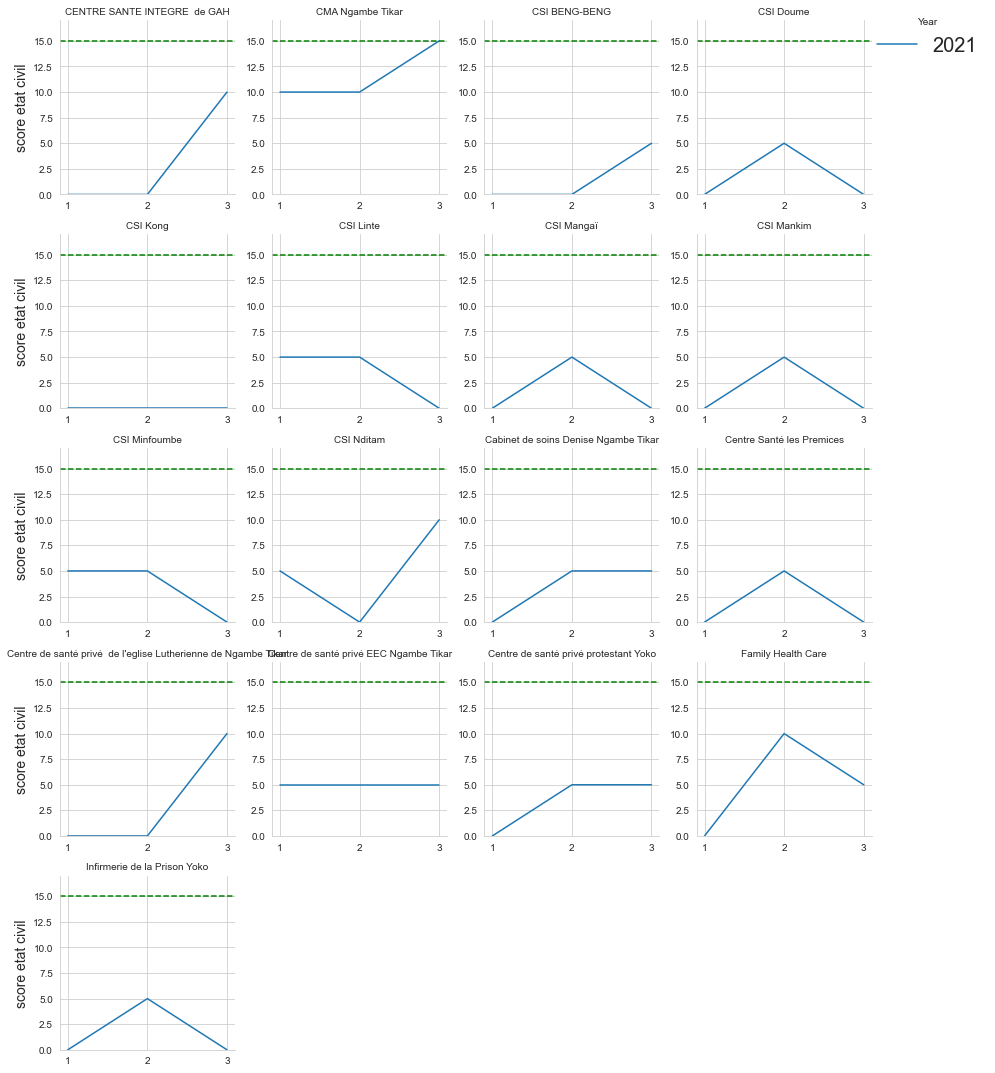

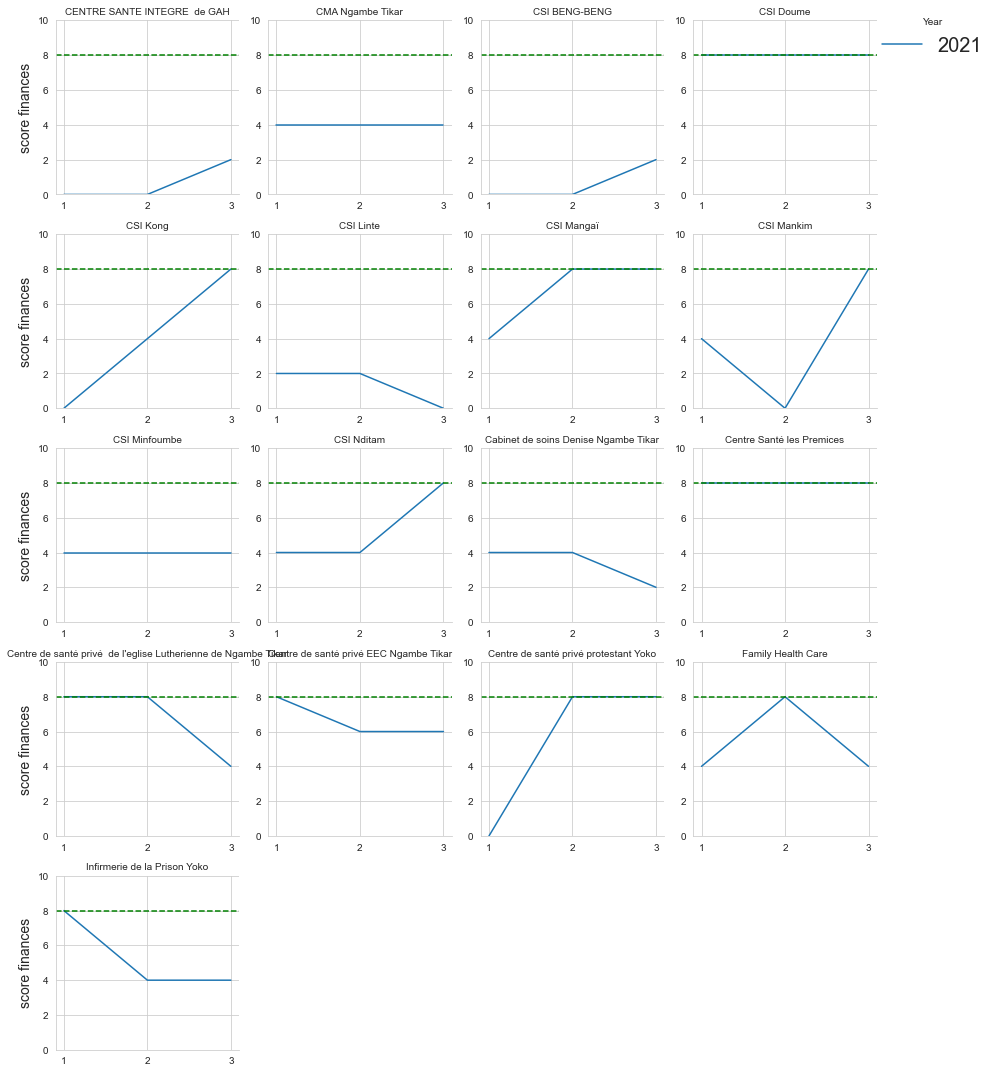

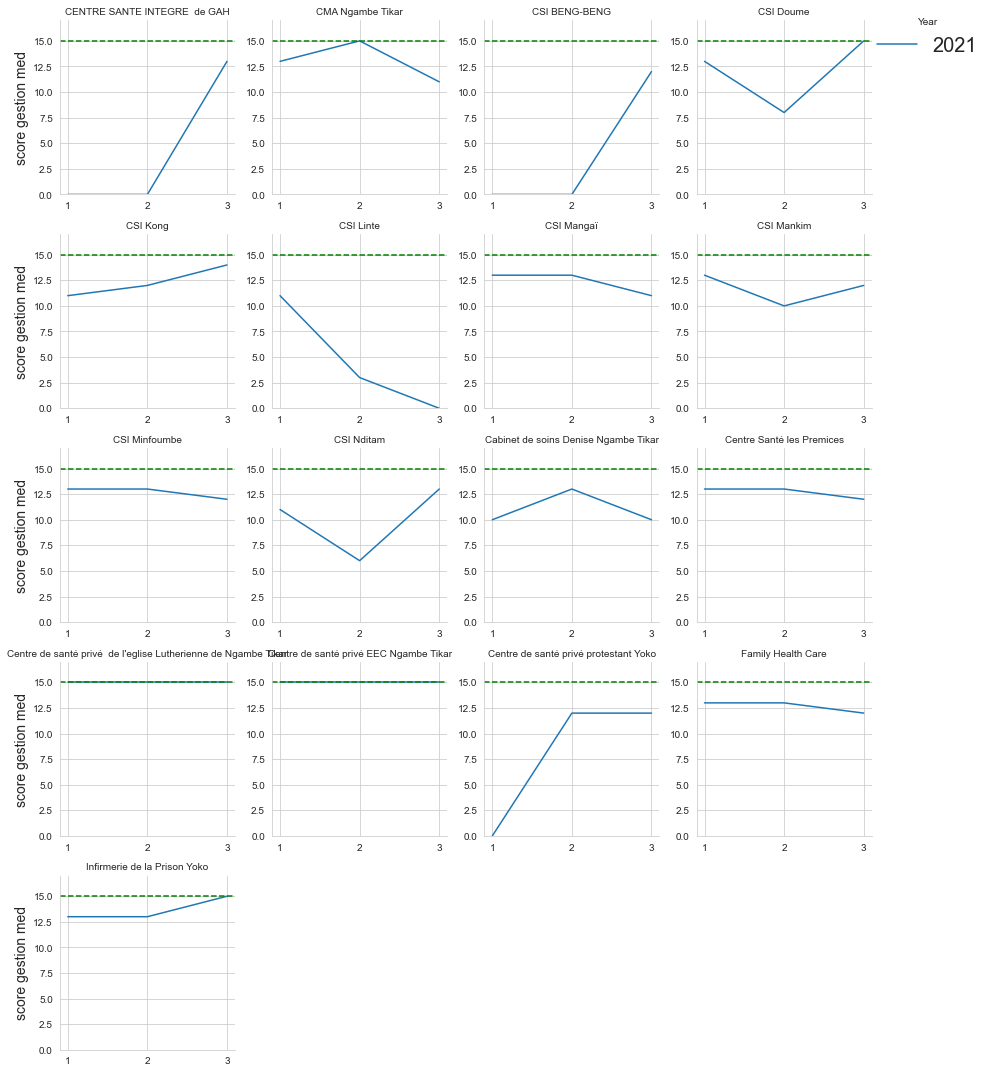

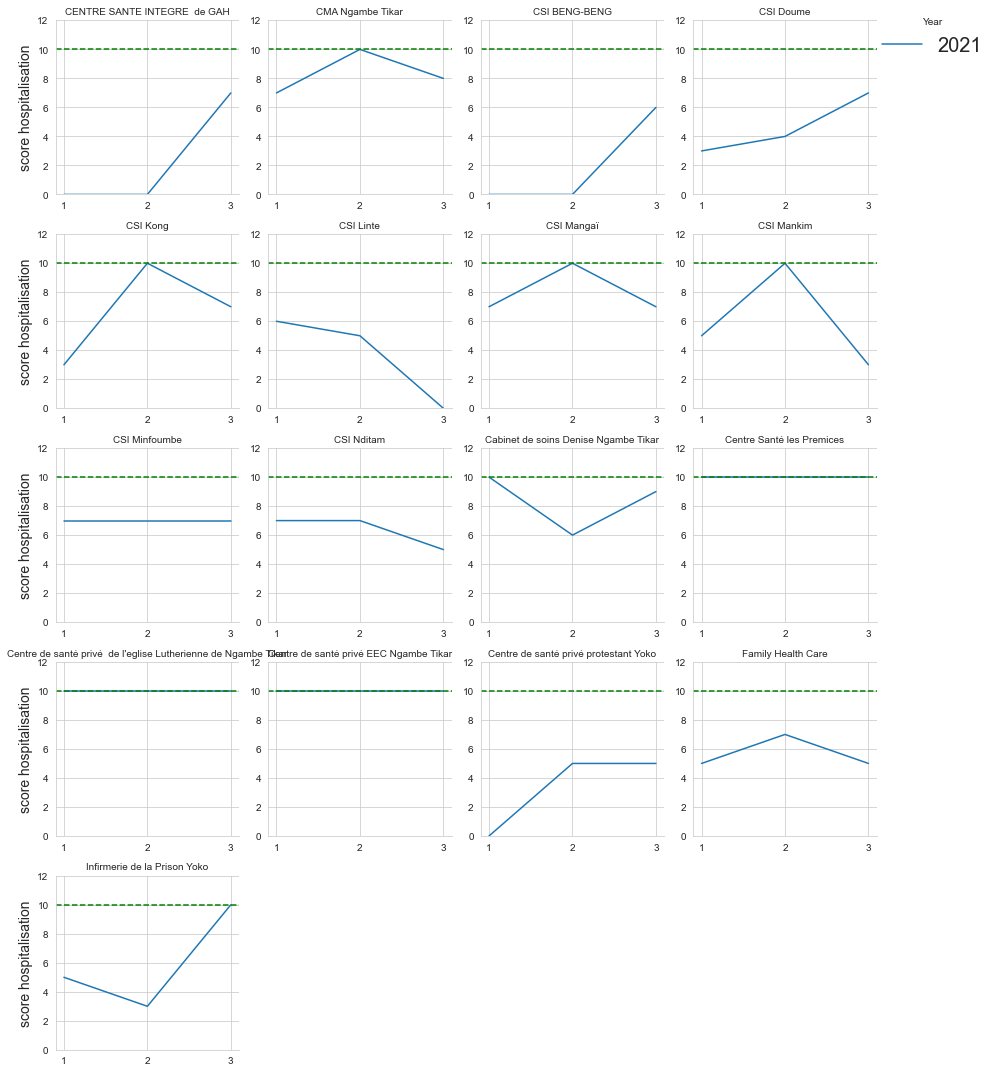

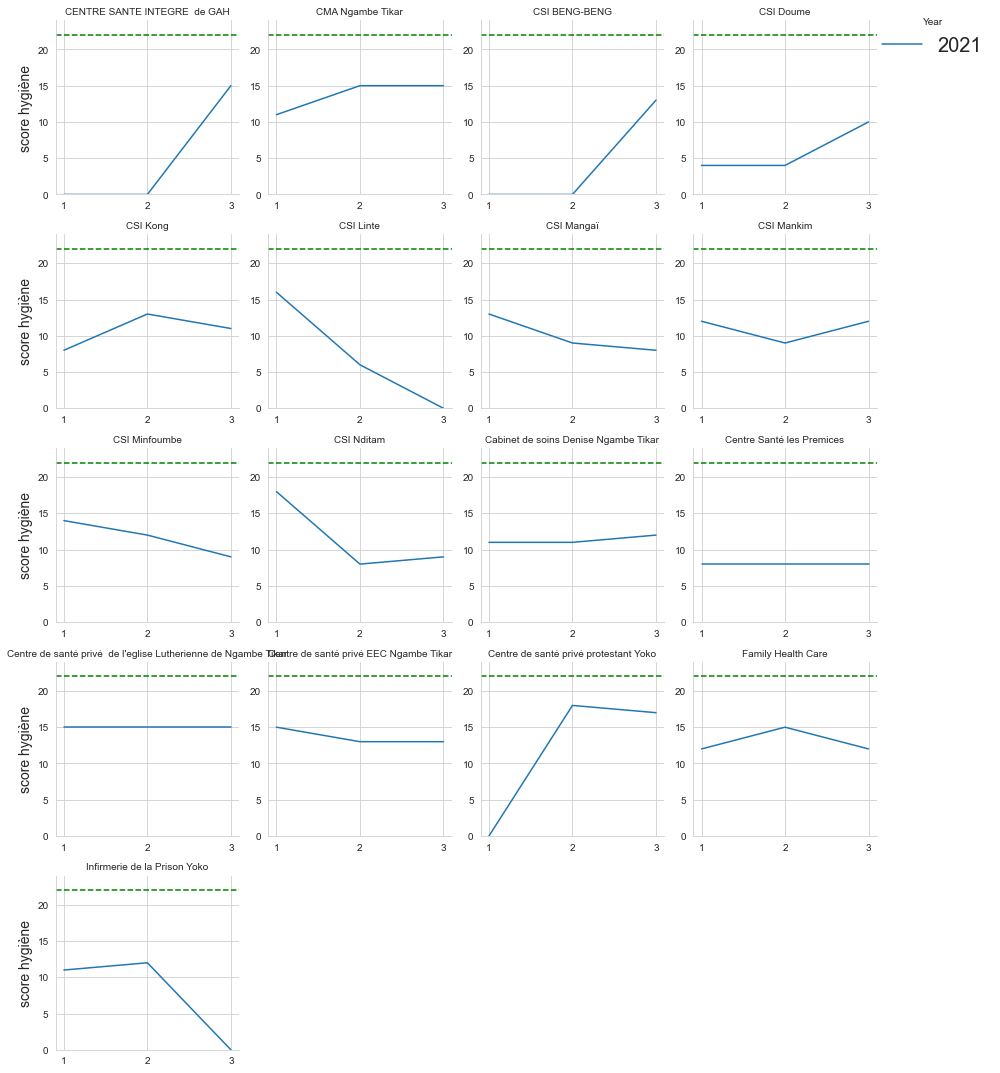

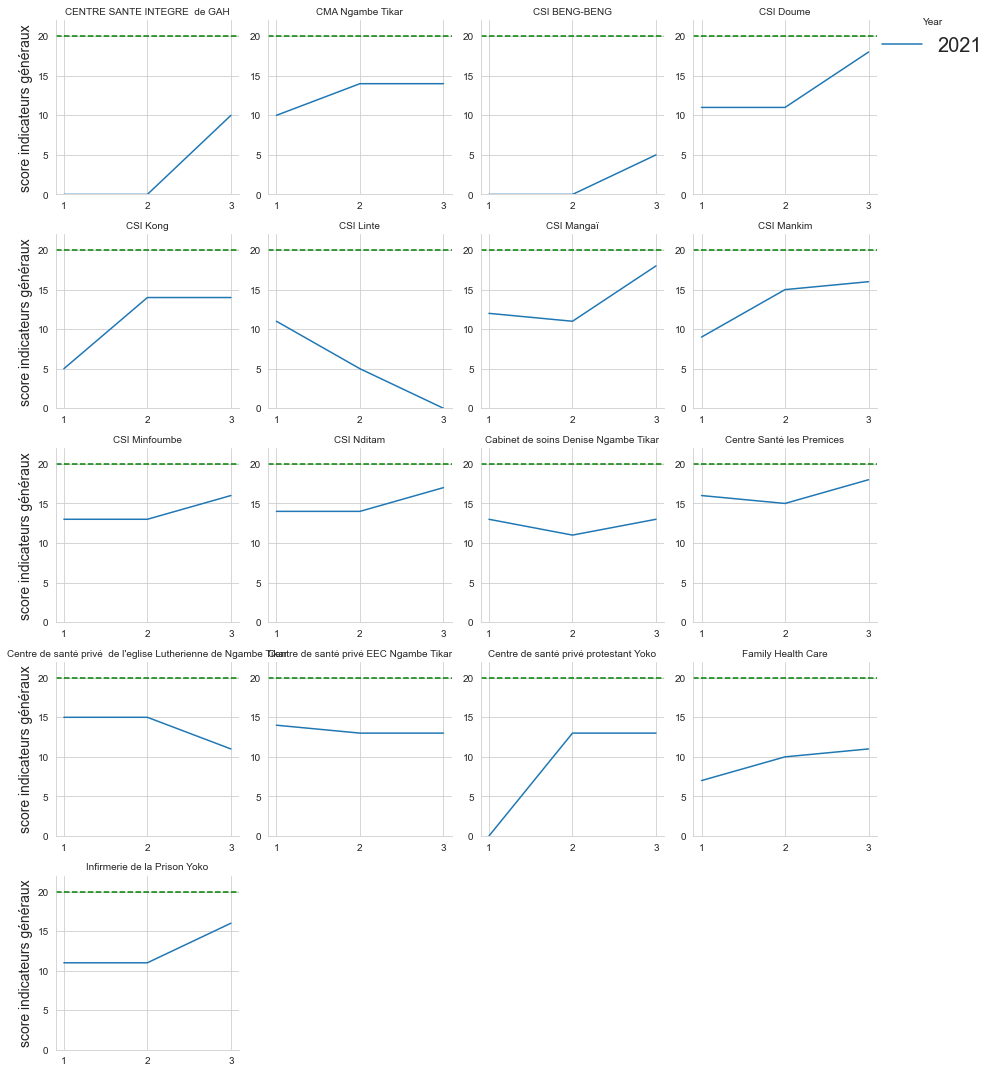

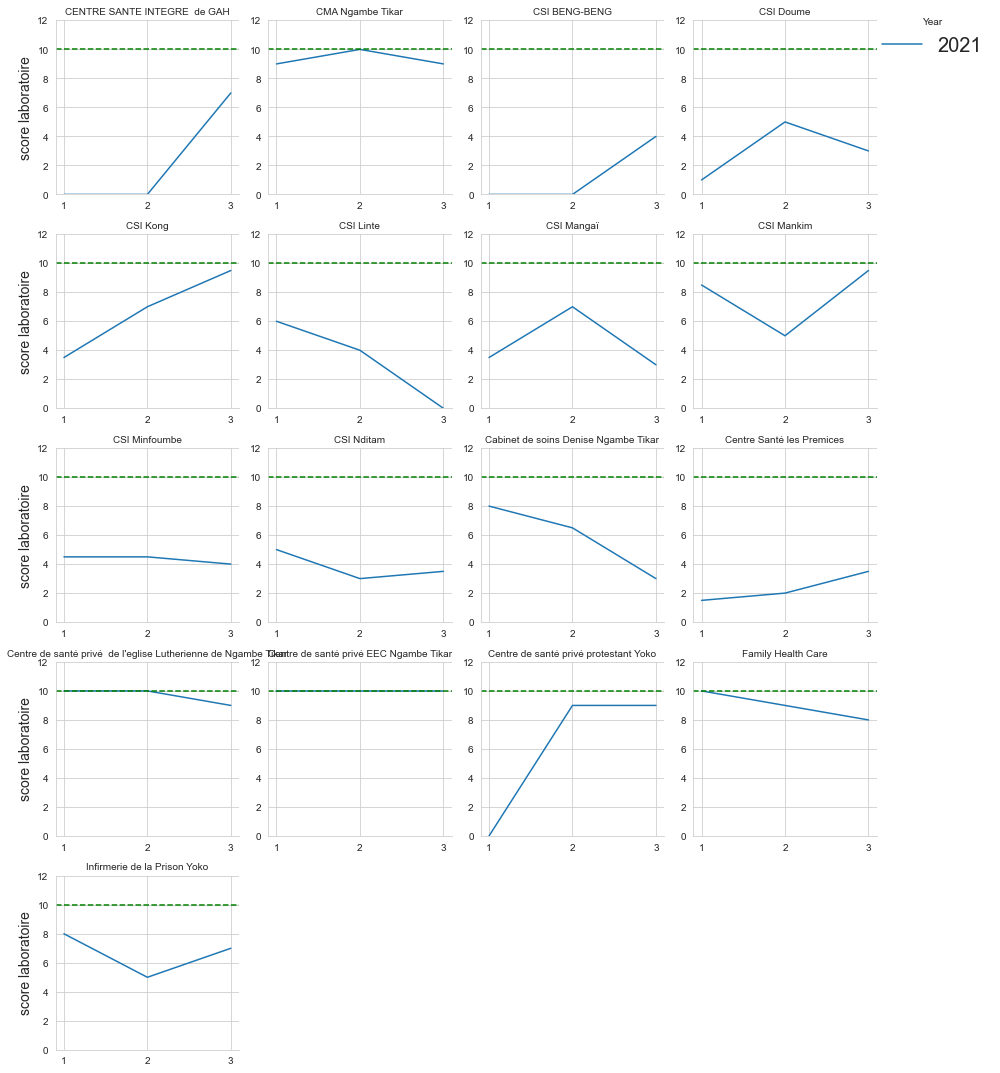

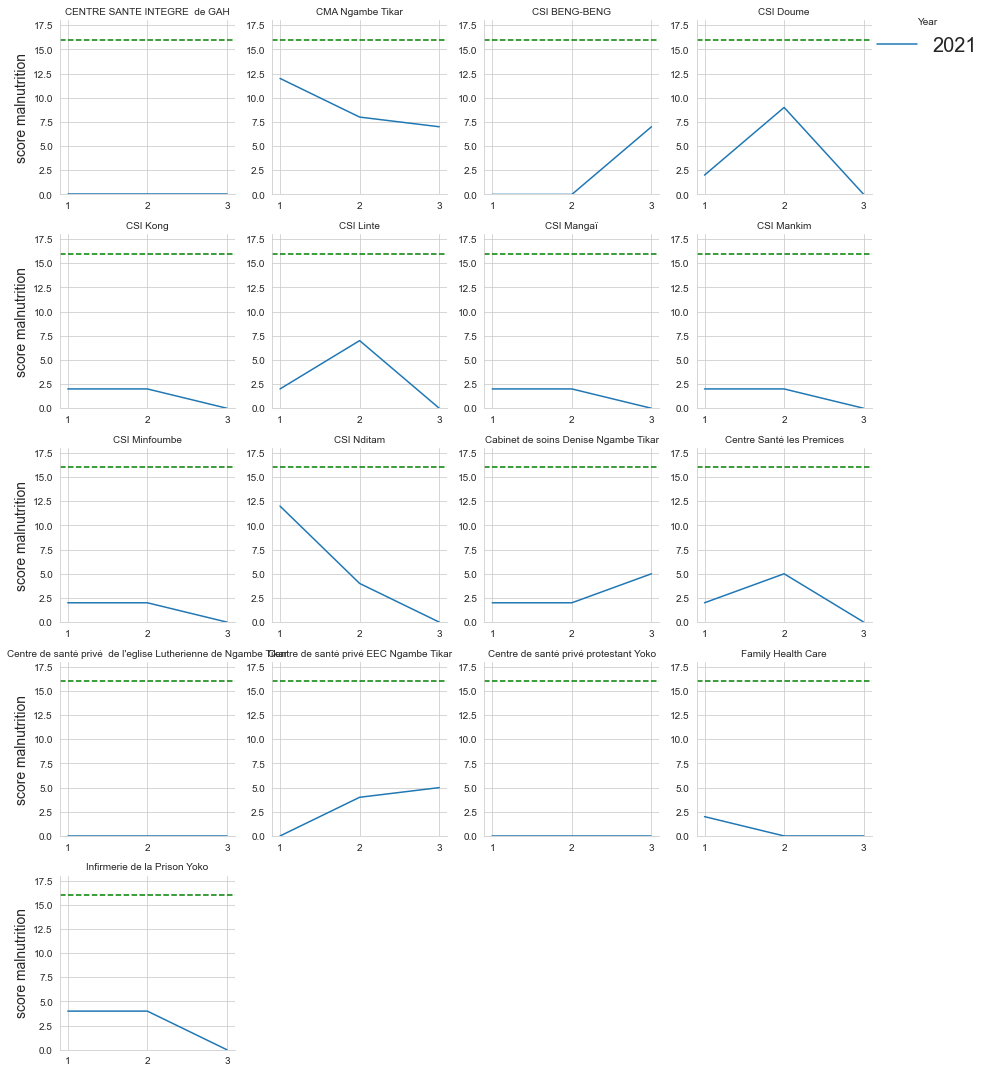

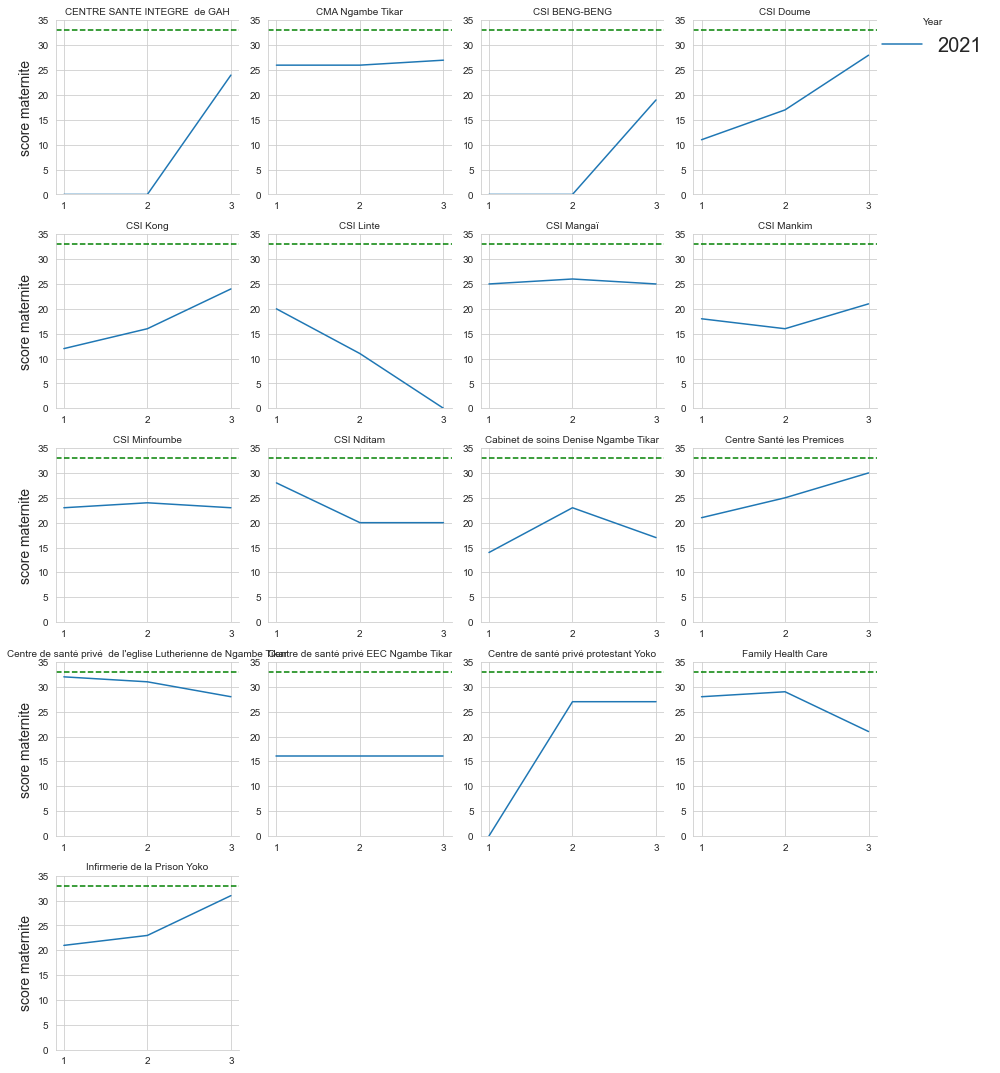

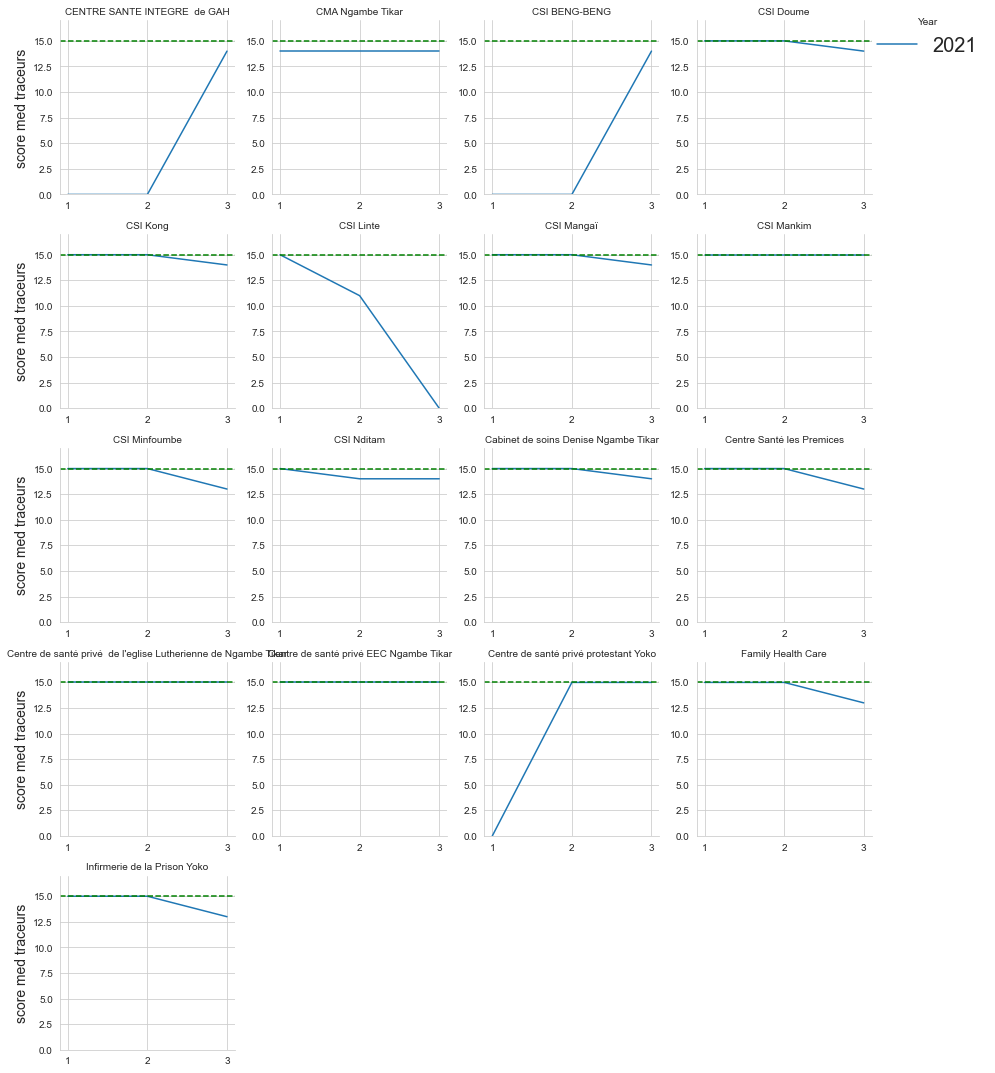

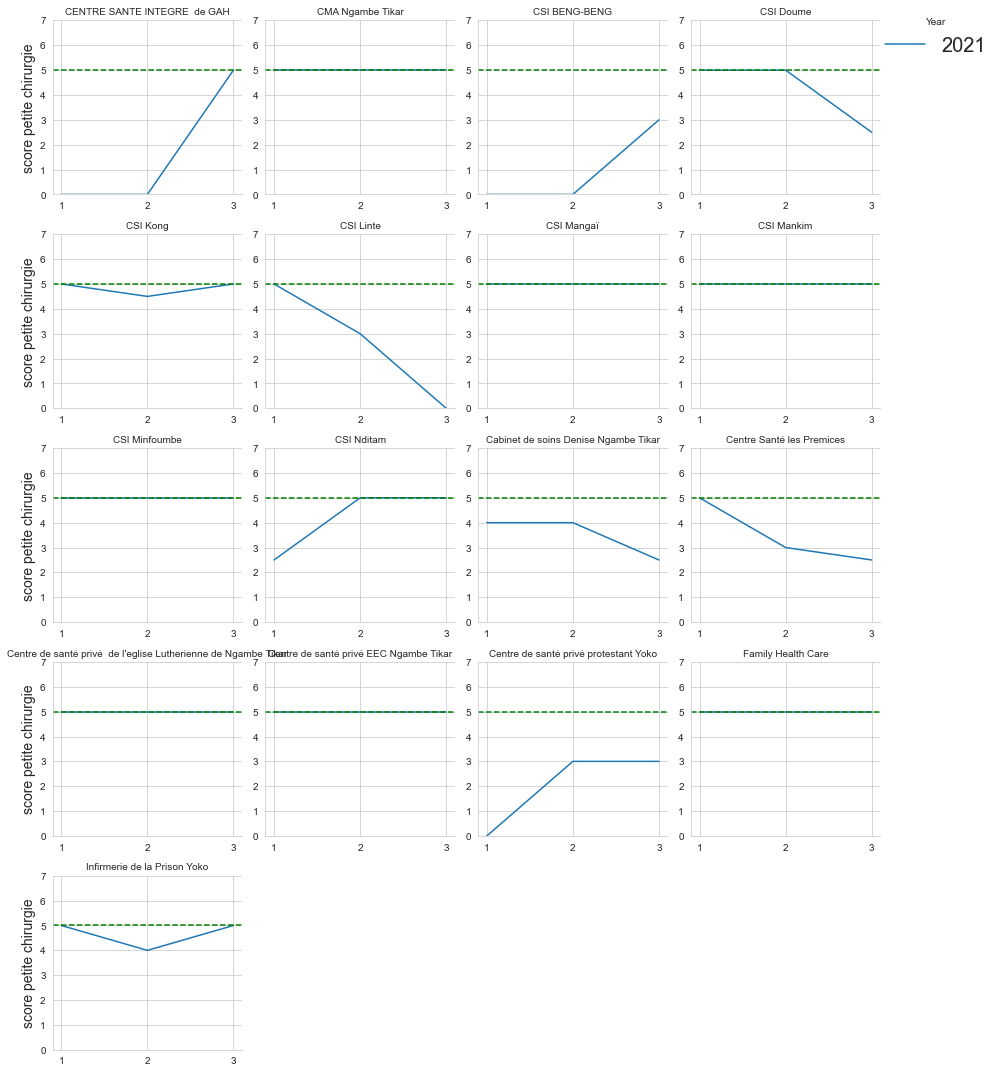

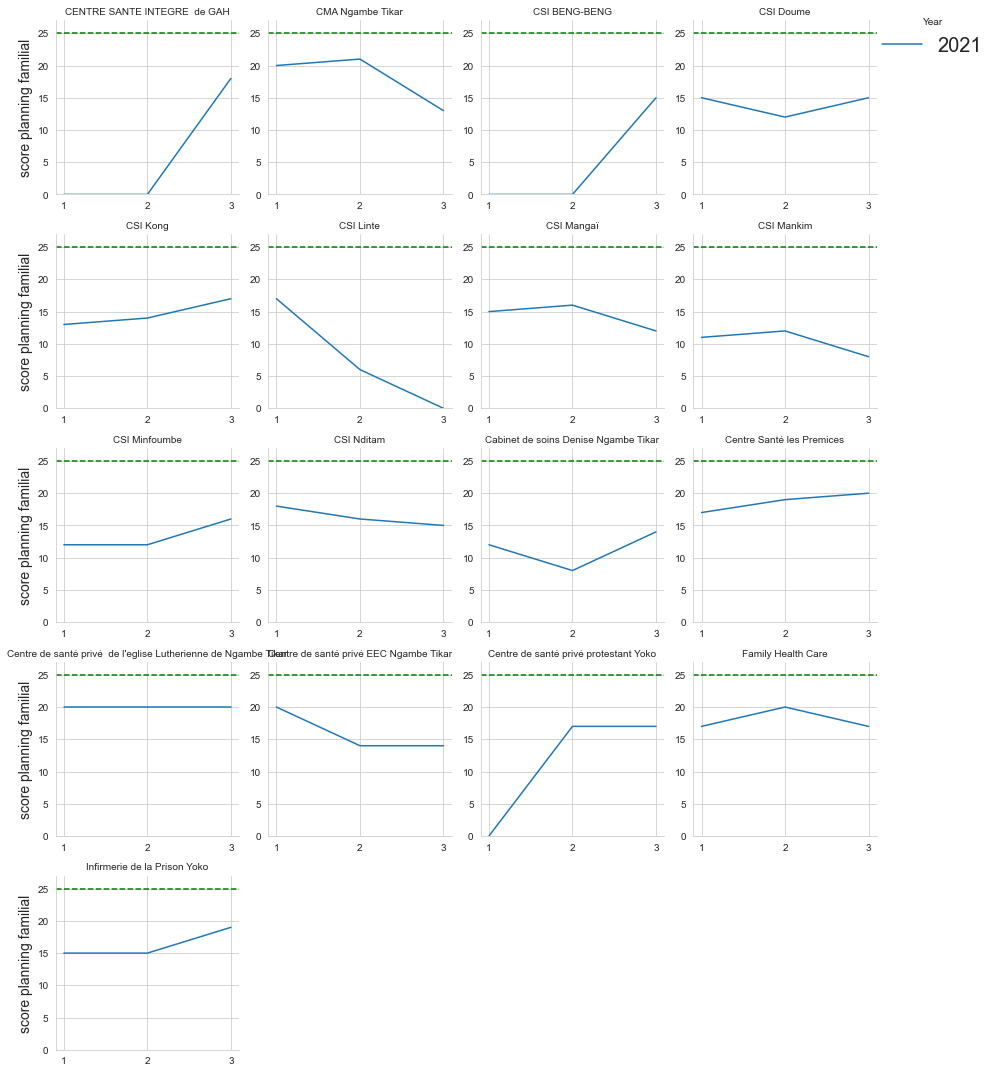

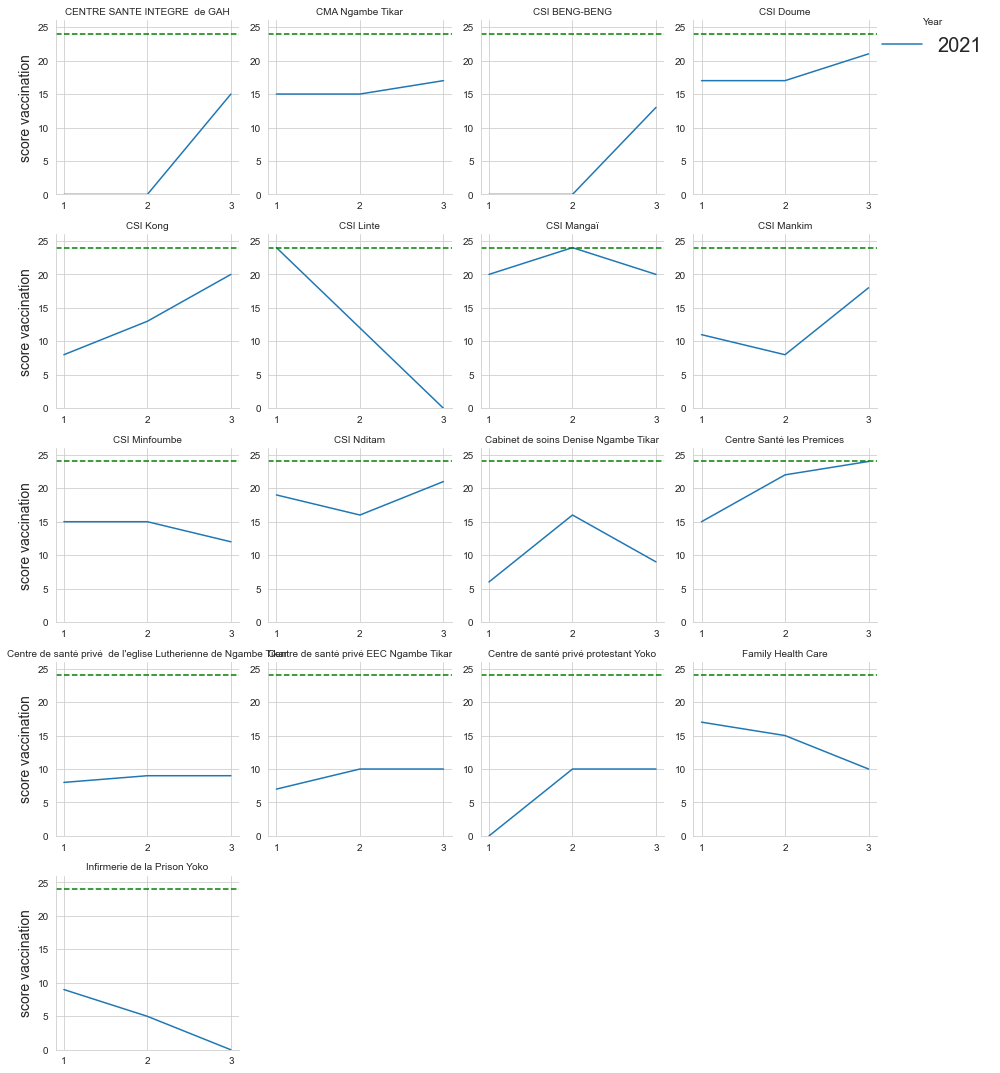

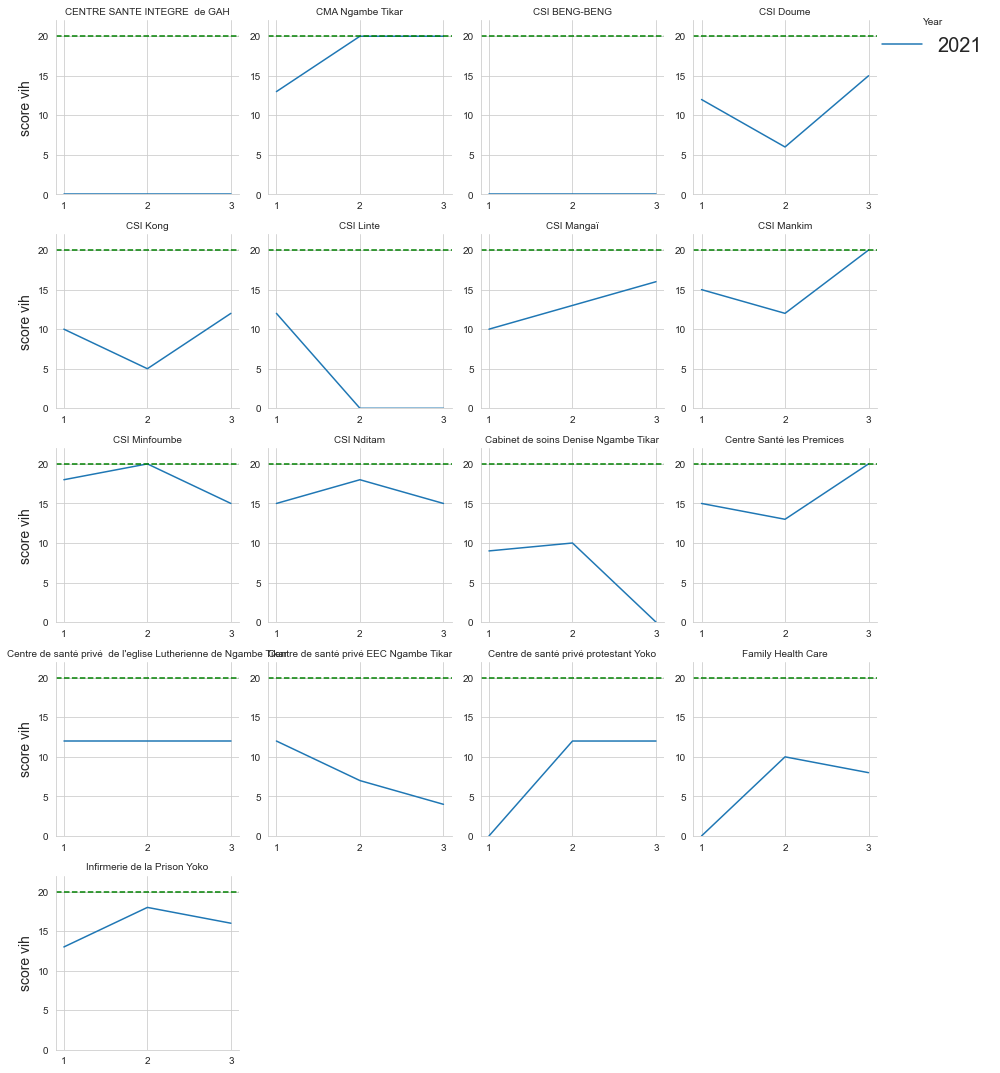

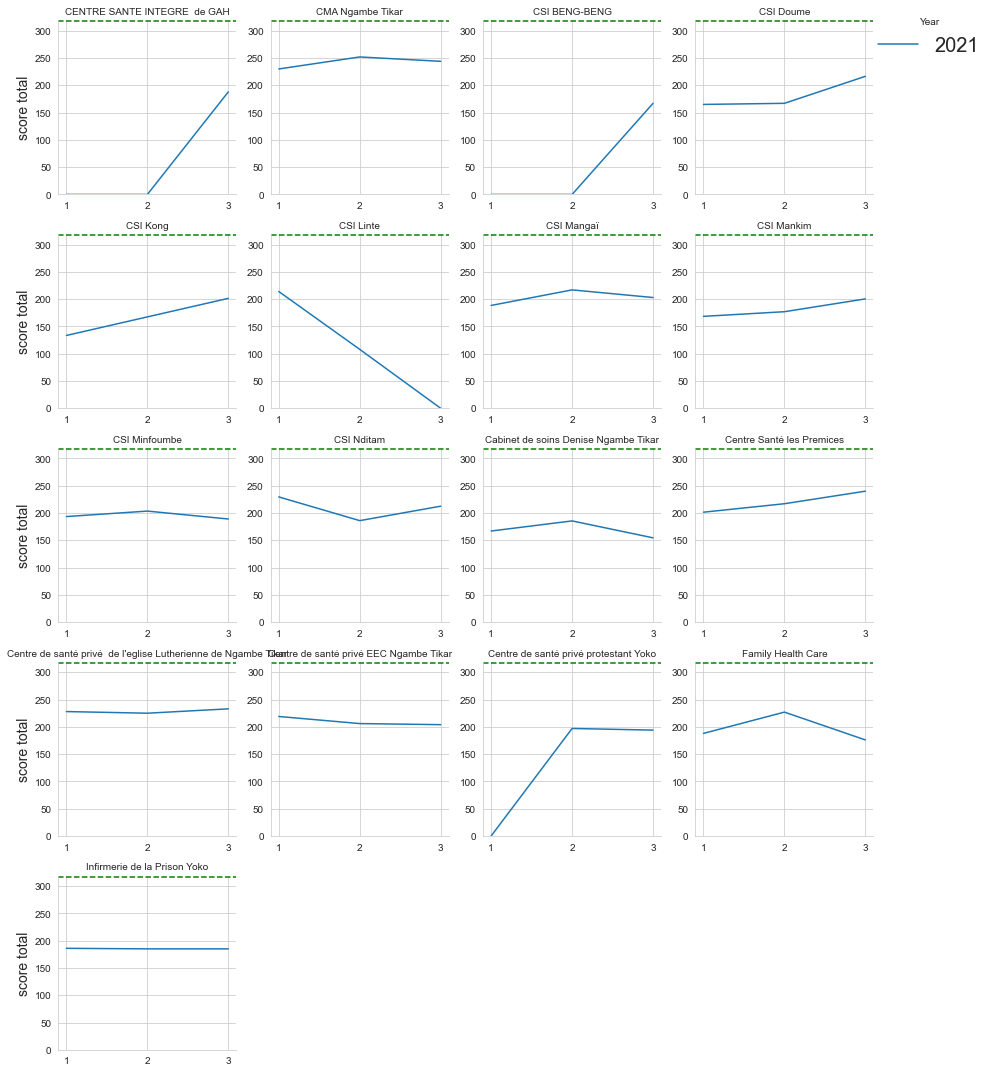

In [134]:
for name, list_cat, score_max in zip(indicateurs_name_list, categories_list, score_max_list):
    globals()[f'scores_{name}'] = get_dataframe(scores, list_cat, indicateurs_FOSA_periode_list)
    globals()[f'scores_{name}_to_print'] = get_dataframe_to_plot(globals()[f'scores_{name}'])
    globals()[f'scores_{name}_to_print'] = get_df_with_trim_and_year(globals()[f'scores_{name}_to_print'])
    globals()[f'scores_{name}_to_print'].to_excel("data_output/" + name + ".xlsx") 
    
    globals()[f'scores_{name}_to_print_2'] = globals()[f'scores_{name}_to_print'].pivot(index="FOSA", columns="Trim", values="score")
    globals()[f'scores_{name}_to_print_2'] = globals()[f'scores_{name}_to_print_2'].reset_index()
    globals()[f'scores_{name}_to_print_2'].columns.name = None
    globals()[f'scores_{name}_to_print_2']['moyenne'] = round((globals()[f'scores_{name}_to_print_2']['1'] + globals()[f'scores_{name}_to_print_2']['2'] + globals()[f'scores_{name}_to_print_2']['3'])/3, 2)
    globals()[f'scores_{name}_to_print_2']['evolution_2_to_3'] = globals()[f'scores_{name}_to_print_2']['3'] - globals()[f'scores_{name}_to_print_2']['2']
    globals()[f'scores_{name}_to_print_2'].to_excel("data_output/" + name + "_2.xlsx")
        
    g = sns.FacetGrid(globals()[f'scores_{name}_to_print'], col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,score_max + 2], hue="Year")
    g.map_dataframe(sns.lineplot, x="Trim", y="score")
    g.map_dataframe(add_max_score, score_max=score_max)
    g.add_legend(loc='upper right', fontsize=20);
    g.set_titles(col_template='{col_name}')
    g.set_axis_labels(None, 'score ' + name, fontsize=14);
    g.savefig("images/Performance_evolution/" + name + "_2")

In [135]:
for i in range(10):
    globals()[f'x{i}'] = i

In [136]:
x1

1

In [137]:
x2

2

# Catégories du groupe mère-enfants

## Vaccination

In [138]:
def get_dataframe(df, list_cat_ind, indicateurs_FOSA_periode_list):
    # Slicing dataframe with the desired column
    df_new = df[list_cat_ind + indicateurs_FOSA_periode_list]
    # Create 2 new columns from 1 other column by slicing the value differently 
    df_new['Trim'] = df_new['periodcode'].str[-1]
    df_new['Year'] = df_new['periodcode'].str[:4]
    # Change the column name and return a new dataframe
    df_new = df_new.rename(columns=dict_cols)
    return df_new

In [139]:
vaccination_df = get_dataframe(scores, indicateurs_vaccinations_list, indicateurs_FOSA_periode_list)

In [140]:
vaccination_df

chaîne du froid ace thermomètre  registre PEV  \
0                                NaN           NaN   
1                                NaN           NaN   
2                                3.0           1.0   
3                                NaN           NaN   
4                                NaN           NaN   
..                               ...           ...   
223                              NaN           0.0   
224                              3.0           1.0   
225                              NaN           NaN   
226                              NaN           NaN   
227                              NaN           NaN   

     conditions d'attente adéquates pour PEV  jetons au PEV  pèse bébé au PEV  \
0                                        NaN            NaN               NaN   
1                                        NaN            NaN               NaN   
2                                        1.0            1.0               1.0   
3                                        NaN            NaN               NaN   
4                                        NaN            NaN               NaN   
..                                       ...            ...               ...   
223                                      1.0            1.0               1.0   
224                                      1.0            NaN               NaN   
225                                      NaN            NaN               NaN   
226                                      NaN            NaN               NaN   
227                                      NaN            NaN               NaN   

     planning PEV  90 % de séance PEV réalisées  liste de PDV PEV  \
0             NaN                           NaN               NaN   
1             NaN                           NaN               NaN   
2             0.0                           0.0               0.0   
3             NaN                           NaN               NaN   
4             NaN                           NaN               NaN   
..            ...                           ...               ...   
223           0.0                           0.0               0.0   
224           1.0                           NaN               NaN   
225           NaN                           NaN               NaN   
226           NaN                           NaN               NaN   
227           NaN                           NaN               NaN   

     besoins en vaccins connus  vaccins disponibles  ...  \
0                          NaN                  NaN  ...   
1                          NaN                  NaN  ...   
2                          2.0                  0.0  ...   
3                          NaN                  NaN  ...   
4                          NaN                  NaN  ...   
..                         ...                  ...  ...   
223                        NaN                  NaN  ...   
224                        NaN                  NaN  ...   
225                        NaN                  NaN  ...   
226                        NaN                  NaN  ...   
227                        NaN                  NaN  ...   

     chaîne du froid avec energie  accumulateurs congélés  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             1.0                     1.0   
3                             NaN                     NaN   
4                             NaN                     NaN   
..                            ...                     ...   
223                           NaN                     NaN   
224                           1.0                     1.0   
225                           NaN                     NaN   
226                           NaN                     NaN   
227                           NaN                     NaN   

     seringues disponibles au PEV  déchets dans sacs poubelles au PEV  \
0                          

In [141]:
vaccination_df = vaccination_df.drop(columns=["Trimestre", "période"], axis=1)

In [142]:
vaccination_df

chaîne du froid ace thermomètre  registre PEV  \
0                                NaN           NaN   
1                                NaN           NaN   
2                                3.0           1.0   
3                                NaN           NaN   
4                                NaN           NaN   
..                               ...           ...   
223                              NaN           0.0   
224                              3.0           1.0   
225                              NaN           NaN   
226                              NaN           NaN   
227                              NaN           NaN   

     conditions d'attente adéquates pour PEV  jetons au PEV  pèse bébé au PEV  \
0                                        NaN            NaN               NaN   
1                                        NaN            NaN               NaN   
2                                        1.0            1.0               1.0   
3                                        NaN            NaN               NaN   
4                                        NaN            NaN               NaN   
..                                       ...            ...               ...   
223                                      1.0            1.0               1.0   
224                                      1.0            NaN               NaN   
225                                      NaN            NaN               NaN   
226                                      NaN            NaN               NaN   
227                                      NaN            NaN               NaN   

     planning PEV  90 % de séance PEV réalisées  liste de PDV PEV  \
0             NaN                           NaN               NaN   
1             NaN                           NaN               NaN   
2             0.0                           0.0               0.0   
3             NaN                           NaN               NaN   
4             NaN                           NaN               NaN   
..            ...                           ...               ...   
223           0.0                           0.0               0.0   
224           1.0                           NaN               NaN   
225           NaN                           NaN               NaN   
226           NaN                           NaN               NaN   
227           NaN                           NaN               NaN   

     besoins en vaccins connus  vaccins disponibles  vaccins rangés  \
0                          NaN                  NaN             NaN   
1                          NaN                  NaN             NaN   
2                          2.0                  0.0             1.0   
3                          NaN                  NaN             NaN   
4                          NaN                  NaN             NaN   
..                         ...                  ...             ...   
223                        NaN                  NaN             NaN   
224                        NaN                  NaN             NaN   
225                        NaN                  NaN             NaN   
226                        NaN                  NaN             NaN   
227                        NaN                  NaN             NaN   

     chaîne du froid avec energie  accumulateurs congélés  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             1.0                     1.0   
3                             NaN                     NaN   
4                             NaN                     NaN   
..                            ...                     ...   
223                           NaN                     NaN   
224                           1.0                     1.0   
225                           NaN                     NaN   
226                           NaN                     NaN   
227                           

In [143]:
vaccination_df.shape

(204, 19)

In [144]:
vaccination_df_melt = vaccination_df.melt(id_vars=["FOSA", "Year", "Trim"])

In [145]:
vaccination_df_melt

FOSA  Year Trim  \
0     CENTRE SANTE INTEGRE  de GAH  2021    1   
1     CENTRE SANTE INTEGRE  de GAH  2021    2   
2     CENTRE SANTE INTEGRE  de GAH  2021    3   
3     CENTRE SANTE INTEGRE  de GAH  2021    4   
4     CENTRE SANTE INTEGRE  de GAH  2020    1   
...                            ...   ...  ...   
3259  Infirmerie de la Prison Yoko  2020    4   
3260  Infirmerie de la Prison Yoko  2019    1   
3261  Infirmerie de la Prison Yoko  2019    2   
3262  Infirmerie de la Prison Yoko  2019    3   
3263  Infirmerie de la Prison Yoko  2019    4   

                              variable  value  
0      chaîne du froid ace thermomètre    NaN  
1      chaîne du froid ace thermomètre    NaN  
2      chaîne du froid ace thermomètre    3.0  
3      chaîne du froid ace thermomètre    NaN  
4      chaîne du froid ace thermomètre    NaN  
...                                ...    ...  
3259  carnet de vaccination disponible    0.0  
3260  carnet de vaccination disponible    NaN  
3261  carnet de vaccination disponible    NaN  
3262  carnet de vaccination disponible    NaN  
3263  carnet de vaccination disponible    NaN  

[3264 rows x 5 columns]

In [146]:
vaccination_df_melt.shape

(3264, 5)

In [147]:
vaccination_df_melt = vaccination_df_melt[(vaccination_df_melt["Year"] == "2021") & (vaccination_df_melt["Trim"] == "3")]

In [148]:
vaccination_df_melt

FOSA  Year Trim  \
2                          CENTRE SANTE INTEGRE  de GAH  2021    3   
14                                     CMA Ngambe Tikar  2021    3   
26                                        CSI BENG-BENG  2021    3   
38                                            CSI Doume  2021    3   
50                                             CSI Kong  2021    3   
...                                                 ...   ...  ...   
3206  Centre de santé privé  de l'eglise Lutherienne...  2021    3   
3218             Centre de santé privé EEC Ngambe Tikar  2021    3   
3230              Centre de santé privé protestant Yoko  2021    3   
3242                                 Family Health Care  2021    3   
3254                       Infirmerie de la Prison Yoko  2021    3   

                              variable  value  
2      chaîne du froid ace thermomètre    3.0  
14     chaîne du froid ace thermomètre    0.0  
26     chaîne du froid ace thermomètre    0.0  
38     chaîne du froid ace thermomètre    3.0  
50     chaîne du froid ace thermomètre    3.0  
...                                ...    ...  
3206  carnet de vaccination disponible    1.0  
3218  carnet de vaccination disponible    1.0  
3230  carnet de vaccination disponible    1.0  
3242  carnet de vaccination disponible    1.0  
3254  carnet de vaccination disponible    NaN  

[272 rows x 5 columns]

In [149]:
vaccination_df_melt = vaccination_df_melt.fillna(0)

In [150]:
vaccination_df_melt

FOSA  Year Trim  \
2                          CENTRE SANTE INTEGRE  de GAH  2021    3   
14                                     CMA Ngambe Tikar  2021    3   
26                                        CSI BENG-BENG  2021    3   
38                                            CSI Doume  2021    3   
50                                             CSI Kong  2021    3   
...                                                 ...   ...  ...   
3206  Centre de santé privé  de l'eglise Lutherienne...  2021    3   
3218             Centre de santé privé EEC Ngambe Tikar  2021    3   
3230              Centre de santé privé protestant Yoko  2021    3   
3242                                 Family Health Care  2021    3   
3254                       Infirmerie de la Prison Yoko  2021    3   

                              variable  value  
2      chaîne du froid ace thermomètre    3.0  
14     chaîne du froid ace thermomètre    0.0  
26     chaîne du froid ace thermomètre    0.0  
38     chaîne du froid ace thermomètre    3.0  
50     chaîne du froid ace thermomètre    3.0  
...                                ...    ...  
3206  carnet de vaccination disponible    1.0  
3218  carnet de vaccination disponible    1.0  
3230  carnet de vaccination disponible    1.0  
3242  carnet de vaccination disponible    1.0  
3254  carnet de vaccination disponible    0.0  

[272 rows x 5 columns]

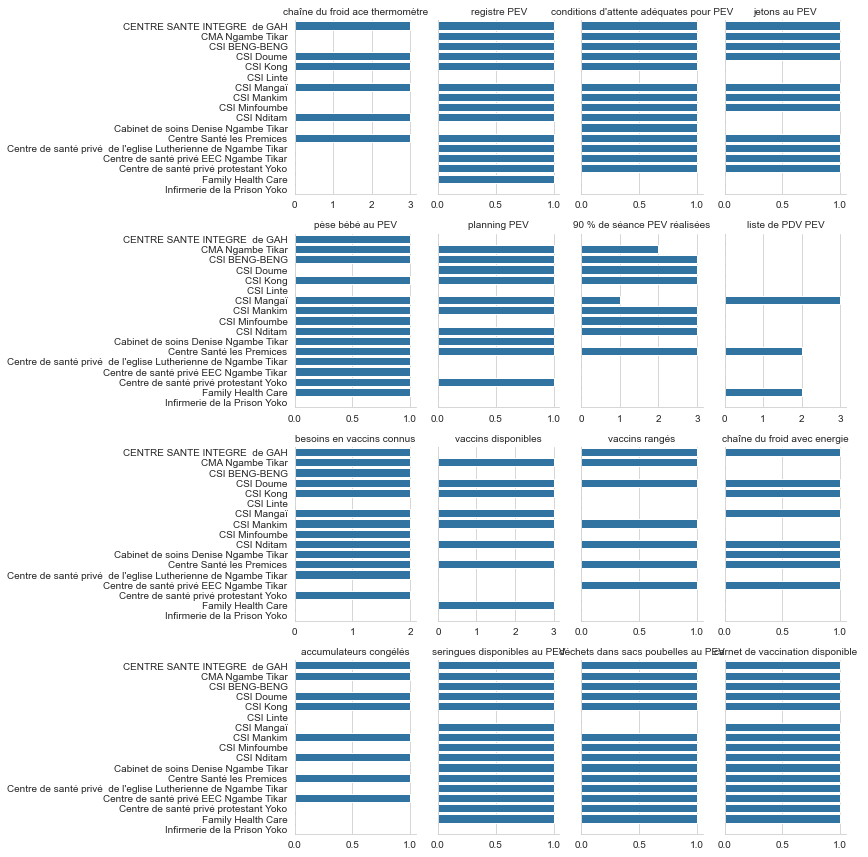

In [171]:
g = sns.FacetGrid(vaccination_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
#g.set_axis_labels(None, 'score ', fontsize=14);
g.savefig("images/Performance_evolution/" + "vaccination_details_2")

In [152]:
vaccination_df_melt.variable.unique()

array(['chaîne du froid ace thermomètre', 'registre PEV',
       "conditions d'attente adéquates pour PEV", 'jetons au PEV',
       'pèse bébé au PEV', 'planning PEV', '90 % de séance PEV réalisées',
       'liste de PDV PEV', 'besoins en vaccins connus',
       'vaccins disponibles', 'vaccins rangés',
       'chaîne du froid avec energie', 'accumulateurs congélés',
       'seringues disponibles au PEV',
       'déchets dans sacs poubelles au PEV',
       'carnet de vaccination disponible'], dtype=object)

In [153]:
len(vaccination_df_melt.variable.unique())

16

In [154]:
#g.map_dataframe(sns.barplot, y="FOSA", x="value")

## Consultation prénatale

In [155]:
cpn_df = get_dataframe(scores, indicateurs_cpn_list, indicateurs_FOSA_periode_list)

In [156]:
cpn_df = cpn_df.drop(columns=["Trimestre", "période"], axis=1)

In [157]:
cpn_df_melt = cpn_df.melt(id_vars=["FOSA", "Year", "Trim"])

In [158]:
cpn_df_melt = cpn_df_melt[(cpn_df_melt["Year"] == "2021") & (cpn_df_melt["Trim"] == "3")]

In [159]:
cpn_df_melt = cpn_df_melt.fillna(0)

''

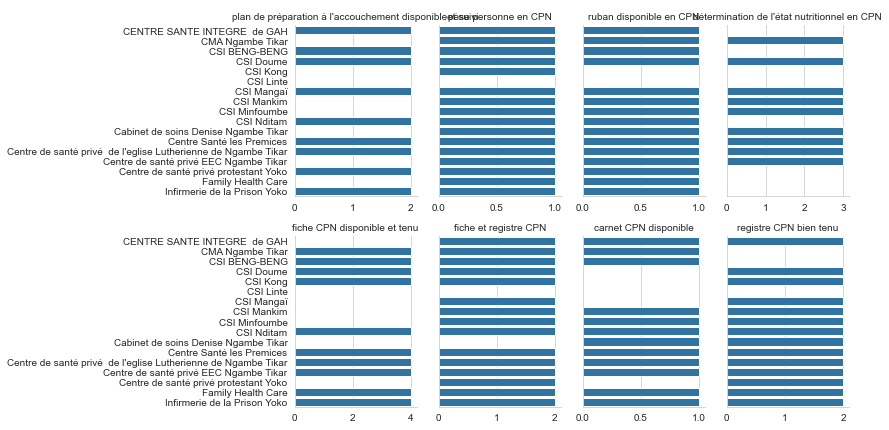

In [172]:
g = sns.FacetGrid(cpn_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right');
g.set_titles(col_template='{col_name}')
#g.set_axis_labels(None, 'score ', fontsize=14);
g.savefig("images/Performance_evolution/" + "cpn_detail_2")
;

## Maternité

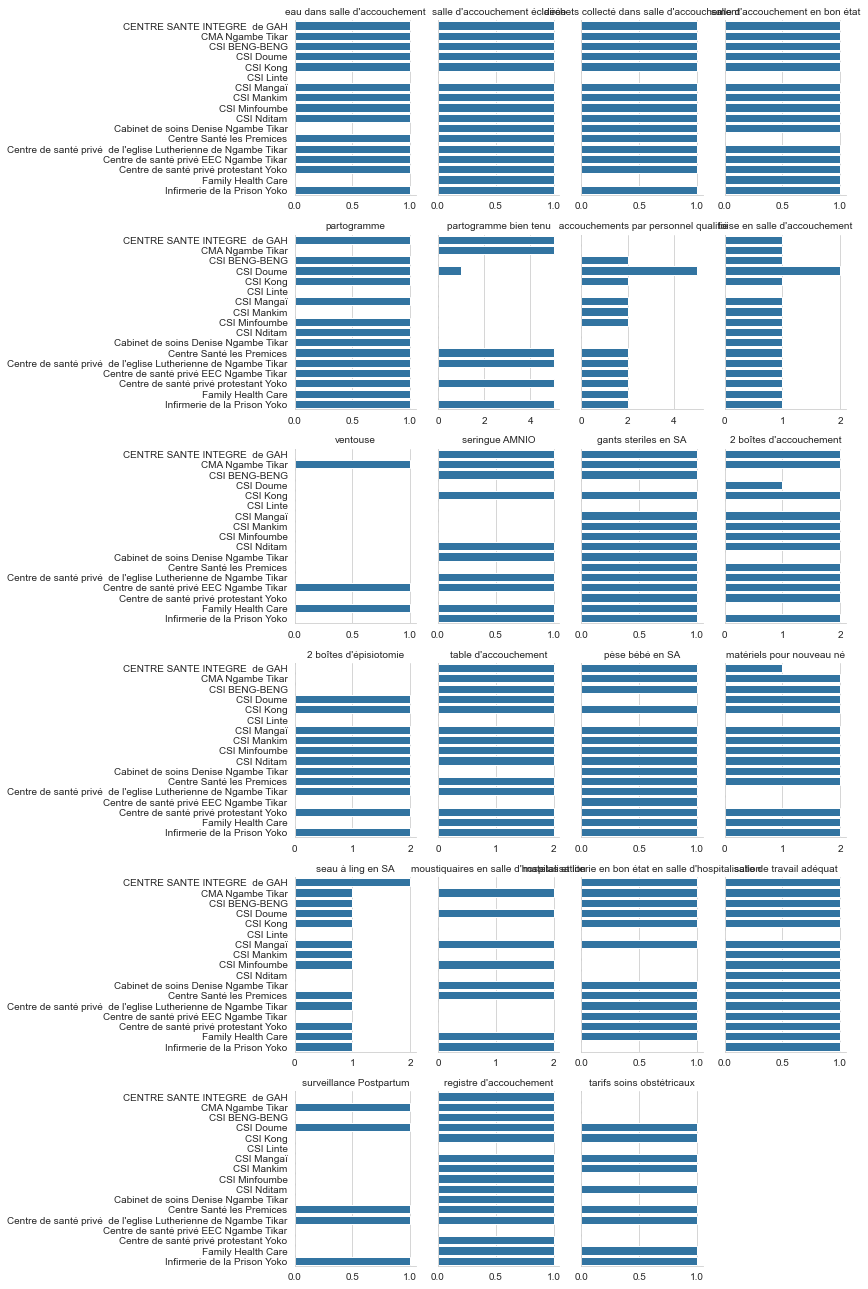

In [173]:
maternite_df = get_dataframe(scores, indicateurs_maternite_list, indicateurs_FOSA_periode_list)
maternite_df = maternite_df.drop(columns=["Trimestre", "période"], axis=1)
maternite_df_melt = maternite_df.melt(id_vars=["FOSA", "Year", "Trim"])
maternite_df_melt = maternite_df_melt[(maternite_df_melt["Year"] == "2021") & (maternite_df_melt["Trim"] == "3")]
maternite_df_melt = maternite_df_melt.fillna(0)
g = sns.FacetGrid(maternite_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.savefig("images/Performance_evolution/" + "maternite_detail_2")

## Planning familial

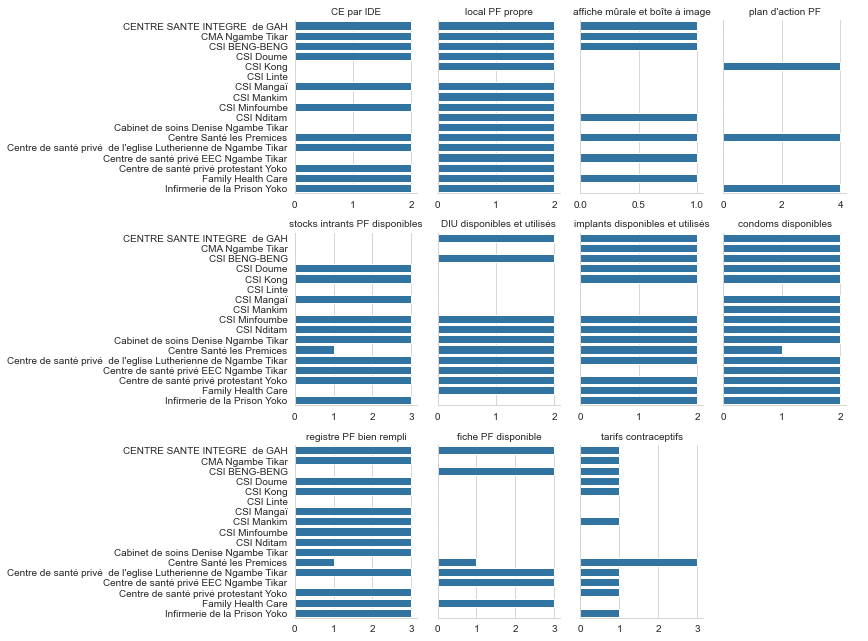

In [174]:
planning_df = get_dataframe(scores, indicateurs_pf_list, indicateurs_FOSA_periode_list)
planning_df = planning_df.drop(columns=["Trimestre", "période"], axis=1)
planning_df_melt = planning_df.melt(id_vars=["FOSA", "Year", "Trim"])
planning_df_melt = planning_df_melt[(planning_df_melt["Year"] == "2021") & (planning_df_melt["Trim"] == "3")]
planning_df_melt = planning_df_melt.fillna(0)
g = sns.FacetGrid(planning_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.savefig("images/Performance_evolution/" + "planning_detail_2")

## Hygiène

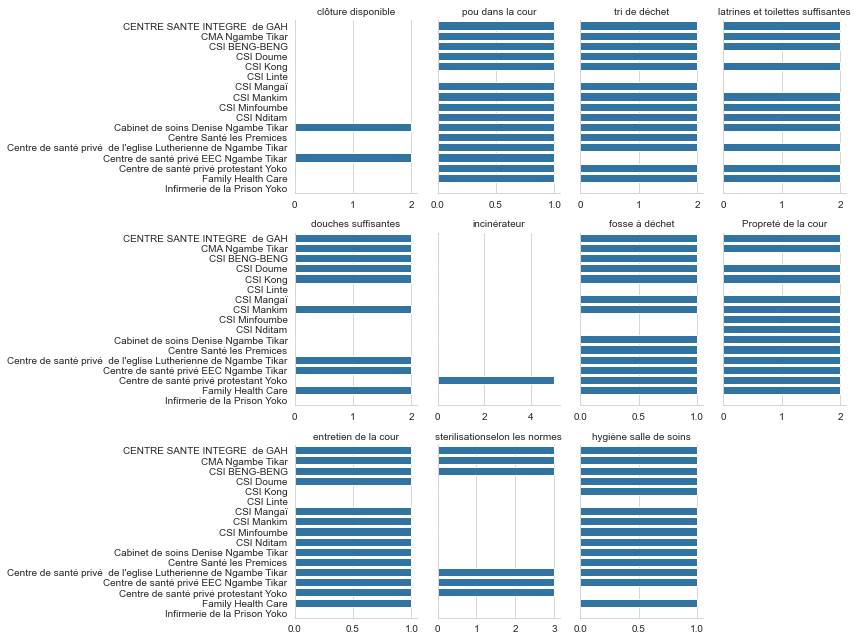

In [175]:
hygiene_df = get_dataframe(scores, indicateurs_hygiene_sterilisation_list, indicateurs_FOSA_periode_list)
hygiene_df = hygiene_df.drop(columns=["Trimestre", "période"], axis=1)
hygiene_df_melt = hygiene_df.melt(id_vars=["FOSA", "Year", "Trim"])
hygiene_df_melt = hygiene_df_melt[(hygiene_df_melt["Year"] == "2021") & (hygiene_df_melt["Trim"] == "3")]
hygiene_df_melt = hygiene_df_melt.fillna(0)
g = sns.FacetGrid(hygiene_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.savefig("images/Performance_evolution/" + "hygiene_detail_2")